In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException #exceptÎ¨∏ Ï≤òÎ¶¨
import requests
import re
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
import datetime
from openpyxl import Workbook
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter
import os

Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ïä§ÌÜ†Î¶¨ÌÖîÎßÅ: "Ï†ÄÎäî Îç∞Ïù¥ÌÑ∞ Îí§Ïóê Ïà®ÏùÄ ÏÇ¨ÎûåÏùÑ Î¥ÖÎãàÎã§."
Ïù¥ Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú, ÏÑúÏòÅÎãòÏùÄ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïóê Ïù¥Îü∞ Í∞ïÎ†•Ìïú Ïä§ÌÜ†Î¶¨Î•º Îã¥ÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
Î¨∏Ï†ú Ï†úÍ∏∞: "Îã®ÏàúÌûà Í∏çÏ†ï/Î∂ÄÏ†ï Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º ÏÑ∏Îäî Í≤ÉÎßåÏúºÎ°úÎäî Í≥†Í∞ùÏùò ÏßÑÏßú ÎßåÏ°±ÎèÑÎ•º Ïïå Ïàò ÏóÜÏäµÎãàÎã§. ÌäπÌûà, 'Î≥¥ÌÜµÏù¥ÏóêÏöî' ÏôÄ Í∞ôÏùÄ Ï§ëÎ¶ΩÏ†ÅÏù∏ Îã®Ïñ¥Ïóê Ïà®Í≤®ÏßÑ ÏßÑÏßú Î∂àÎßåÏùÑ Ïñ¥ÎñªÍ≤å Ï∞æÏïÑÎÇº Ïàò ÏûàÏùÑÍπåÏöî?"
Ìï¥Í≤∞ Í≥ºÏ†ï: "Ïù¥ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥, Ï†ÄÎäî 13,000Í∞úÍ∞Ä ÎÑòÎäî Î¶¨Î∑∞ ÌÖçÏä§Ìä∏Ïùò Î¨∏Îß•ÏùÑ ÌïôÏäµÌïú KoELECTRA Î™®Îç∏ÏùÑ ÌååÏù∏ÌäúÎãùÌñàÏäµÎãàÎã§. Í∑∏ Í≤∞Í≥º, Ï†ú Î™®Îç∏ÏùÄ 'Î≥¥ÌÜµ', 'Í∑∏ÎÉ•Ï†ÄÎÉ•'Í≥º Í∞ôÏùÄ Îã®ÎãµÌòï Î¶¨Î∑∞Í∞Ä Ïã§Ï†úÎ°úÎäî Í∞ÄÏû• Í∞ïÌïú Î∂ÄÏ†ï Ïã†Ìò∏ÏûÑÏùÑ ÌïôÏäµÌïòÍ≥† ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î∂ÑÎ•òÌï¥ÎÉàÏäµÎãàÎã§."
ÌïµÏã¨ Ïù∏ÏÇ¨Ïù¥Ìä∏: "ÎòêÌïú, Î∂ÄÏ†ï Î¶¨Î∑∞Í∞Ä Í∞ÄÏû• ÎßéÏù¥ Î∞úÏÉùÌïú Í≥≥ÏùÄ ÏùòÏô∏Î°ú ÎßõÏù¥ Î≥¥Ïû•Îêú ÎåÄÌòï ÌîÑÎûúÏ∞®Ïù¥Ï¶àÎì§Ïù¥ÏóàÏäµÎãàÎã§. Ïù¥Îì§Ïùò Î∂ÄÏ†ï Î¶¨Î∑∞Î•º Ïã¨Ï∏µ Î∂ÑÏÑùÌïú Í≤∞Í≥º, Í≥†Í∞ùÎì§Ïùò Î∂àÎßåÏùÄ 'Îßõ'Ïù¥ ÏïÑÎãå **'ÏÑúÎπÑÏä§', 'Ïö¥ÏòÅ', 'ÌôòÍ≤Ω'**Í≥º Í∞ôÏùÄ ÎπÑÏùåÏãùÏ†Å ÏöîÏù∏Ïóê ÏßëÏ§ëÎêòÏñ¥ ÏûàÏùåÏùÑ Î∞úÍ≤¨ÌñàÏäµÎãàÎã§. Ïù¥Îäî ÌîÑÎûúÏ∞®Ïù¥Ï¶à Îß§Ïû• Í¥ÄÎ¶¨Ïùò Ï§ëÏöîÏÑ±ÏùÑ ÏãúÏÇ¨ÌïòÎäî Ï§ëÏöîÌïú Ìè¨Ïù∏Ìä∏ÏûÖÎãàÎã§."
Í∏∞ÎåÄ Ìö®Í≥º: "Îî∞ÎùºÏÑú Ï†úÍ∞Ä Í∞úÎ∞úÌïú Ïù¥ Î∂ÑÏÑù ÏãúÏä§ÌÖúÏùÑ ÌôúÏö©ÌïòÎ©¥, ÏãùÎãπ Ï£ºÏù∏Îì§ÏùÄ Ïù¥Ï†ÑÏóêÎäî ÎÜìÏπòÍ≥† ÏûàÎçò 'Ïπ®Î¨µÏùò Î∂àÎßå' Í≥†Í∞ùÏùÑ Ï∞æÏïÑÎÇ¥Í≥†, Îßõ Ïô∏Ïóê Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏùÑ Í∞úÏÑ†Ìï¥Ïïº Ìï†ÏßÄÏóê ÎåÄÌïú Íµ¨Ï≤¥Ï†ÅÏù¥Í≥† Ïã§Ìñâ Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§."

### Í∞ÄÏ≤úÎåÄ ÎßõÏßë ÎßÅÌÅ¨ ÌÅ¨Î°§ÎßÅ

In [9]:

# 2. Ïõπ ÎìúÎùºÏù¥Î≤Ñ ÏÑ§Ï†ï Î∞è Î™©Ìëú ÌéòÏù¥ÏßÄ Ïù¥Îèô
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
url = "https://map.naver.com/p/search/Í∞ÄÏ≤úÎåÄ ÎßõÏßë"
driver.get(url)

print("ÌéòÏù¥ÏßÄ Î°úÎî© Ï§ë... 5Ï¥à ÎåÄÍ∏∞")
time.sleep(5)

try:
    # --- STEP 1: 'Î™©Î°ù' ÌîÑÎ†àÏûÑÏúºÎ°ú ÏßÑÏûÖ ---
    driver.switch_to.frame("searchIframe")
    print("1. 'searchIframe'ÏúºÎ°ú ÏßÑÏûÖ ÏÑ±Í≥µ!")
    time.sleep(1)

    # --- STEP 2: Ï≤´ Î≤àÏß∏ ÏãùÎãπ ÌÅ¥Î¶≠ (ÏÉÅÏÑ∏ Ï†ïÎ≥¥ Î°úÎìúÎ•º ÏúÑÌï¥) ---
    # Î®ºÏ†Ä ÏãùÎãπ Î™©Î°ù Ï§ë Ï≤´ Î≤àÏß∏Î•º ÌÅ¥Î¶≠Ìï¥ÏÑú ÏÉÅÏÑ∏ Ï†ïÎ≥¥ Ï∞ΩÏùÑ ÌôúÏÑ±ÌôîÌï¥Ïïº 'Í≥µÏú†' Î≤ÑÌäºÏù¥ ÎÇòÌÉÄÎÇ©ÎãàÎã§.
    first_restaurant_in_list = driver.find_elements(By.CSS_SELECTOR, "li.UEzoS")[0]
    restaurant_name = first_restaurant_in_list.find_element(By.CSS_SELECTOR, "span.TYaxT").text
    first_restaurant_in_list.find_element(By.CSS_SELECTOR, "a.place_bluelink").click()
    print(f"2. '{restaurant_name}'ÏùÑ ÌÅ¥Î¶≠ÌïòÏó¨ ÏÉÅÏÑ∏ Ï†ïÎ≥¥ Ï∞Ω ÌôúÏÑ±Ìôî.")
    time.sleep(3) # ÏÉÅÏÑ∏ Ï†ïÎ≥¥ Î°úÎî© ÎåÄÍ∏∞

    # --- STEP 3: 'ÏÉÅÏÑ∏ Ï†ïÎ≥¥' ÌîÑÎ†àÏûÑÏúºÎ°ú ÏßÑÏûÖ ---
    driver.switch_to.default_content() # Î∞îÍπ• ÏÑ∏ÏÉÅÏúºÎ°ú ÎÇòÏôîÎã§Í∞Ä
    driver.switch_to.frame("entryIframe") # ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ÌîÑÎ†àÏûÑÏúºÎ°ú Îì§Ïñ¥Í∞ê
    print("3. 'entryIframe'ÏúºÎ°ú ÏßÑÏûÖ ÏÑ±Í≥µ!")

    # --- STEP 4: ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ÌîÑÎ†àÏûÑ ÏïàÏùò 'Í≥µÏú†' Î≤ÑÌäº ÌÅ¥Î¶≠ ---
    # ÏÑúÏòÅÎãòÏù¥ Ï∞æÏïÑÏ£ºÏã† IDÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú Í≥µÏú† Î≤ÑÌäºÏùÑ Ï†ïÌôïÌûà Ï∞æÏäµÎãàÎã§.
    share_button = driver.find_element(By.ID, "_btp.share")
    share_button.click()
    print("4. Í≥µÏú† Î≤ÑÌäº ÌÅ¥Î¶≠ ÏÑ±Í≥µ!")
    
    # --- STEP 5: Í≥µÏú† ÌåùÏóÖÏ∞ΩÏóêÏÑú 'ÎßÅÌÅ¨' Í∞ÄÏ†∏Ïò§Í∏∞ ---
    # ÌåùÏóÖÏ∞ΩÏùÄ Î≥ÑÎèÑÏùò iframeÏù¥ ÏïÑÎãê ÌôïÎ•†Ïù¥ ÎÜíÏäµÎãàÎã§. Î∞îÎ°ú ÏöîÏÜåÎ•º Ï∞æÏäµÎãàÎã§.
    # WebDriverWaitÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú ÏöîÏÜåÍ∞Ä ÎÇòÌÉÄÎÇ† ÎïåÍπåÏßÄ Í∏∞Îã§Î¶¨Îäî Í≤ÉÏù¥ ÏïàÏ†ïÏ†ÅÏûÖÎãàÎã§.
    wait = WebDriverWait(driver, 10)
    link_element = wait.until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "a._spi_input_copyurl"))
    )
    shared_link = link_element.get_attribute('href')
    
    print(f"\nüéâ ÏÑ±Í≥µ! '{restaurant_name}'Ïùò Í≥µÏú† ÎßÅÌÅ¨Î•º ÏàòÏßëÌñàÏäµÎãàÎã§.")
    print(f"ÎßÅÌÅ¨: {shared_link}")

except Exception as e:
    print(f"\nüò• Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")
    # ... (Ïò§Î•ò Î©îÏãúÏßÄ) ...

finally:
    time.sleep(10)
    driver.quit()

ÌéòÏù¥ÏßÄ Î°úÎî© Ï§ë... 5Ï¥à ÎåÄÍ∏∞
1. 'searchIframe'ÏúºÎ°ú ÏßÑÏûÖ ÏÑ±Í≥µ!
2. 'ÌÜµÌÅ∞Í≥±Ï∞Ω ÏÑ±ÎÇ®Î≥∏Ï†ê'ÏùÑ ÌÅ¥Î¶≠ÌïòÏó¨ ÏÉÅÏÑ∏ Ï†ïÎ≥¥ Ï∞Ω ÌôúÏÑ±Ìôî.
3. 'entryIframe'ÏúºÎ°ú ÏßÑÏûÖ ÏÑ±Í≥µ!
4. Í≥µÏú† Î≤ÑÌäº ÌÅ¥Î¶≠ ÏÑ±Í≥µ!

üéâ ÏÑ±Í≥µ! 'ÌÜµÌÅ∞Í≥±Ï∞Ω ÏÑ±ÎÇ®Î≥∏Ï†ê'Ïùò Í≥µÏú† ÎßÅÌÅ¨Î•º ÏàòÏßëÌñàÏäµÎãàÎã§.
ÎßÅÌÅ¨: https://naver.me/FxFtIa62


In [15]:
# Ïä§ÌÅ¨Î°§ ÎÇ¥Î†§ÏÑú ÏãùÎãπ ÎßÅÌÅ¨ Í∞ÄÏ†∏Ïò§Í∏∞ ÏΩîÎìú !!


# -----------------------------------------------------------------
# PART 1: ÌÅ¨Î°§Îü¨ Ï¥àÍ∏∞ ÏÑ§Ï†ï (Î∏åÎùºÏö∞Ï†Ä ÏºúÍ∏∞, ÌéòÏù¥ÏßÄ Ïù¥Îèô)
# -----------------------------------------------------------------
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
driver.maximize_window()
url = "https://map.naver.com/p/search/Í∞ÄÏ≤úÎåÄ ÎßõÏßë"
driver.get(url)
print("ÌéòÏù¥ÏßÄ Î°úÎî© Ï§ë... 5Ï¥à ÎåÄÍ∏∞")
time.sleep(5)

collected_links = []

try:
    driver.switch_to.frame("searchIframe")
    
    # -----------------------------------------------------------------
    # PART 2: Î™®Îì† ÌéòÏù¥ÏßÄÎ•º ÏàúÌöåÌïòÎäî Î£®ÌîÑ ÏãúÏûë
    # -----------------------------------------------------------------
    page_count = 1
    while True: 
        print(f"\n--- {page_count} ÌéòÏù¥ÏßÄ ÌÅ¨Î°§ÎßÅ ÏãúÏûë ---")
        
        # --- ‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï: Ï†ïÌôïÌïú Ïä§ÌÅ¨Î°§ ÏòÅÏó≠ ÏßÄÏ†ï ‚ú®‚ú®‚ú® ---
        try:
            # 1. idÎ•º ÏÇ¨Ïö©Ìï¥ Ï†ïÌôïÌïú Ïä§ÌÅ¨Î°§ ÏòÅÏó≠ÏùÑ Ï∞æÏäµÎãàÎã§.
            scroll_area = driver.find_element(By.ID, "_pcmap_list_scroll_container")
            
            last_count = 0
            print("ÏßÄÎä•Ìòï Ïä§ÌÅ¨Î°§ ÏãúÏûë...")
            while True:
                # 2. JavaScriptÎ•º ÏÇ¨Ïö©Ìï¥ 'scroll_area'Ïùò Ïä§ÌÅ¨Î°§ÏùÑ Îß® ÏïÑÎûòÎ°ú ÎÇ¥Î¶ΩÎãàÎã§.
                driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scroll_area)
                time.sleep(1.5) # Îç∞Ïù¥ÌÑ∞ Î°úÎî©ÏùÑ ÏúÑÌïú Ï∂©Î∂ÑÌïú ÎåÄÍ∏∞ ÏãúÍ∞Ñ
                
                new_count = len(driver.find_elements(By.CSS_SELECTOR, "li.UEzoS"))
                
                if new_count == last_count:
                    print(f"Î™®Îì† ÏãùÎãπ({new_count}Í∞ú)ÏùÑ Î°úÎî©ÌñàÏäµÎãàÎã§.")
                    break
                last_count = new_count
        except Exception as e:
            print(f"Ïä§ÌÅ¨Î°§ ÏòÅÏó≠ÏùÑ Ï∞æÎäî Îç∞ Ïã§Ìå®ÌñàÏäµÎãàÎã§: {e}")

        # -----------------------------------------------------------

        restaurants_list = driver.find_elements(By.CSS_SELECTOR, "li.UEzoS")
        num_restaurants = len(restaurants_list)
        print(f"ÌòÑÏû¨ ÌéòÏù¥ÏßÄÏóêÏÑú {num_restaurants}Í∞úÏùò ÏãùÎãπÏùÑ Ï∞æÏïòÏäµÎãàÎã§. ÎßÅÌÅ¨ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§.")

        # -----------------------------------------------------------------
        # PART 3: Ìïú ÌéòÏù¥ÏßÄ ÎÇ¥Ïùò Î™®Îì† ÏãùÎãπÏùÑ ÏàúÌöåÌïòÎäî Î£®ÌîÑ
        # -----------------------------------------------------------------
        for i in range(num_restaurants):
            current_restaurant = driver.find_elements(By.CSS_SELECTOR, "li.UEzoS")[i]
            restaurant_name = "Ïù¥Î¶Ñ Î™®Î•º ÏãùÎãπ"
            
            try:
                restaurant_name = current_restaurant.find_element(By.CSS_SELECTOR, "span.TYaxT").text
                current_restaurant.find_element(By.CSS_SELECTOR, "a.place_bluelink").click()
                time.sleep(2)

                driver.switch_to.default_content()
                driver.switch_to.frame("entryIframe")

                wait = WebDriverWait(driver, 10)
                share_button = wait.until(EC.element_to_be_clickable((By.ID, "_btp.share")))
                share_button.click()
                
                link_element = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "a._spi_input_copyurl")))
                shared_link = link_element.get_attribute('href')
                
                print(f"  - {restaurant_name}: {shared_link}")
                collected_links.append({'name': restaurant_name, 'url': shared_link})
                
                # ÌåùÏóÖ Îã´Í∏∞Îäî ÏûêÎèôÏúºÎ°ú ÎêúÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥† ÏΩîÎìúÎ•º Ï†úÍ±∞
                
            except Exception as e:
                print(f"  - '{restaurant_name}' Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù!")
                # traceback.print_exc() # ÌïÑÏöî Ïãú Ï£ºÏÑù Ìï¥Ï†ú

            finally:
                # Îã§Ïùå ÏãùÎãπÏùÑ ÏúÑÌï¥ Î™©Î°ù ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥µÍ∑Ä
                driver.switch_to.default_content()
                driver.switch_to.frame("searchIframe")
                time.sleep(1)
        
        # -----------------------------------------------------------------
        # PART 4: Îã§Ïùå ÌéòÏù¥ÏßÄÎ°ú Ïù¥Îèô
        # -----------------------------------------------------------------
        try:
            next_button = driver.find_element(By.CSS_SELECTOR, "a.eUTV2:not([aria-disabled='true'])")
            next_button.click()
            page_count += 1
            time.sleep(3)
        except Exception:
            print("\nÎßàÏßÄÎßâ ÌéòÏù¥ÏßÄÏûÖÎãàÎã§. ÎßÅÌÅ¨ ÏàòÏßëÏùÑ Ï¢ÖÎ£åÌï©ÎãàÎã§.")
            break

except Exception as e:
    print(f"ÌÅ¨Î°§ÎßÅ Ï†ÑÏ≤¥ Í≥ºÏ†ïÏóêÏÑú ÏòàÍ∏∞Ïπò Î™ªÌïú Ïã¨Í∞ÅÌïú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§.")
    traceback.print_exc()

finally:
    # -----------------------------------------------------------------
    # PART 5: Î™®Îì† ÏûëÏóÖ ÏôÑÎ£å ÌõÑ Ï†ïÎ¶¨
    # -----------------------------------------------------------------
    driver.quit()
    df = pd.DataFrame(collected_links)
    now = time.strftime('%Y%m%d_%H%M%S')
    filename = f"gachon_restaurant_links_{now}.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"\n====== ÏµúÏ¢Ö ÏôÑÎ£å: Ï¥ù {len(collected_links)}Í∞úÏùò ÎßÅÌÅ¨Î•º ÏàòÏßëÌïòÏó¨ '{filename}'Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§. ======")

ÌéòÏù¥ÏßÄ Î°úÎî© Ï§ë... 5Ï¥à ÎåÄÍ∏∞

--- 1 ÌéòÏù¥ÏßÄ ÌÅ¨Î°§ÎßÅ ÏãúÏûë ---
ÏßÄÎä•Ìòï Ïä§ÌÅ¨Î°§ ÏãúÏûë...
Î™®Îì† ÏãùÎãπ(49Í∞ú)ÏùÑ Î°úÎî©ÌñàÏäµÎãàÎã§.
ÌòÑÏû¨ ÌéòÏù¥ÏßÄÏóêÏÑú 49Í∞úÏùò ÏãùÎãπÏùÑ Ï∞æÏïòÏäµÎãàÎã§. ÎßÅÌÅ¨ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§.
  - ÌöåÏä§Ïãú: https://naver.me/5sseMIa6
  - Ïù∏ÏÉùÍ∑πÏû•Ï™ΩÍ∞àÎπÑ ÏÑ±ÎÇ®Ï†ê: https://naver.me/xtgpbuVd
  - ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê: https://naver.me/xq3a3F04
  - ÌôîÎ°úÏÉÅÌöå ÏÑ±ÎÇ®Î≥µÏ†ïÏ†ê: https://naver.me/GPdoVFlD
  - ÌïòÎÖ∏Ïù¥ÏåÄÍµ≠Ïàò: https://naver.me/GSDAjujH
  - ÏõêÏ°∞ ÌÉúÌèâÎèô Í≥±Ï∞Ω: https://naver.me/5Q375D6c
  - ÎèÑÎØ∏ÎÖ∏ÌîºÏûê ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê: https://naver.me/GtU3Z3KU
  - Î¨¥ÌôîÍ≥ºÎÇòÎ¨¥ÏïÑÎûò: https://naver.me/Gj6V6y0d
  - Ïú°Ïó∞Ï∞®: https://naver.me/GsjpVpWP
  - Ïä§ÌÉÄÎ≤ÖÏä§ Í∞ÄÏ≤úÎåÄÌïôÍµêÏ†ê: https://naver.me/GFBhFS95
  - 'Î≥µÏ†ïÎ°ú10Ïà†Ïßë' Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù!
  - Ïπ¥Ìéò 1988: https://naver.me/GyYbAMB5
  - Í≥†Í∏∞ÌïòÎÇò Ïã†Ìù•Ï†ê: https://naver.me/GBFzl2ap
  - Î∞îÎã§ÏôïÍµ≠ÏïÑÍµ¨Ï∞ú&Ìï¥Î¨ºÏ∞ú ÏÑ±ÎÇ®Ï†ê: https://naver

Traceback (most recent call last):
  File "/var/folders/f4/1y5qvmvd5v514kbpgr0p58440000gn/T/ipykernel_6140/1281276211.py", line 76, in <module>
    time.sleep(2)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/urllib3/connection.py", line 507, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/http/client.py", line 1428, in getresponse
    response.begin()
  File "/opt/anaconda3/lib/python3.12/http/client.py", line 331, in begin
  

In [21]:

    
    print(f"\n====== Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ, Ï¥ù {len(collected_links)}Í∞úÏùò ÎßÅÌÅ¨Î•º ÏàòÏßëÌñàÏäµÎãàÎã§. ======")
    
    # 1. ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Î•º pandas DataFrameÏúºÎ°ú Î≥ÄÌôò
    df = pd.DataFrame(collected_links)
    
    # 2. 'url' Ïª¨ÎüºÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï§ëÎ≥µÎêú ÌñâÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
    #    keep='first'Îäî Ï§ëÎ≥µÎêú Í≤ÉÎì§ Ï§ë Ï≤´ Î≤àÏß∏ Í≤ÉÎßå ÎÇ®Í∏∞ÎùºÎäî ÏùòÎØ∏ÏûÖÎãàÎã§.
    df_no_duplicates = df.drop_duplicates(subset=['url'], keep='first')
    
    print(f"====== Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ, Ï¥ù {len(df_no_duplicates)}Í∞úÏùò Í≥†Ïú†Ìïú ÎßÅÌÅ¨Î•º ÎÇ®Í≤ºÏäµÎãàÎã§. ======")
    
    # 3. Ï§ëÎ≥µÏù¥ Ï†úÍ±∞Îêú Íπ®ÎÅóÌïú Îç∞Ïù¥ÌÑ∞Î•º CSV ÌååÏùºÎ°ú Ï†ÄÏû•
    now = time.strftime('%Y%m%d_%H%M%S')
    filename = f"gachon_restaurant_links_unique_{now}.csv"
    df_no_duplicates.to_csv(filename, index=False, encoding='utf-8-sig')
    
    print(f"\n====== ÏµúÏ¢Ö ÏôÑÎ£å: Í≥†Ïú† ÎßÅÌÅ¨Î•º '{filename}'Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§. ======")


====== Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ, Ï¥ù 164Í∞úÏùò ÎßÅÌÅ¨Î•º ÏàòÏßëÌñàÏäµÎãàÎã§. ======
====== Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ, Ï¥ù 117Í∞úÏùò Í≥†Ïú†Ìïú ÎßÅÌÅ¨Î•º ÎÇ®Í≤ºÏäµÎãàÎã§. ======

====== ÏµúÏ¢Ö ÏôÑÎ£å: Í≥†Ïú† ÎßÅÌÅ¨Î•º 'gachon_restaurant_links_unique_20250908_213318.csv'Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§. ======


### ÏãùÎãπ Í≥†Ïú† Î≤àÌò∏ Í∞ÄÏ†∏ÏôÄÏÑú Îã§Ïãú ÎßÅÌÅ¨Ïóê Î∂ôÏù¥Í∏∞....

In [11]:
### Ï∞êÏ∞êÏ∞êÏ∞ê ÏΩîÎìú !!!!
# -----------------------------------------------------------------
# PART 0: ÌïÑÏöîÌïú Î™®Îì† ÎèÑÍµ¨(ÎùºÏù¥Î∏åÎü¨Î¶¨)Î•º Îß® ÏúÑÏóê Î∂àÎü¨ÏòµÎãàÎã§.
# -----------------------------------------------------------------
import time
import pandas as pd
import traceback
import re # Ïà´ÏûêÎßå Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌï¥ re ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï∂îÍ∞Ä

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# -----------------------------------------------------------------
# PART 1: Î™®Îì† ÏÉÅÏÑ∏ Ï†ïÎ≥¥Î•º ÏàòÏßëÌïòÎäî Î°úÎ¥á(Ìï®Ïàò) Ï†ïÏùò
# -----------------------------------------------------------------
def scrape_reviews_from_id(restaurant_name, restaurant_id, driver):
    reviews_data = []
    review_url = f"https://m.place.naver.com/restaurant/{restaurant_id}/review/visitor"
    
    try:
        driver.get(review_url)
        print(f"  - Î¶¨Î∑∞ ÌéòÏù¥ÏßÄÎ°ú ÏßÅÏ†ë Ïù¥Îèô: {review_url}")
        time.sleep(3)

        print("  - 'ÌéºÏ≥êÏÑú ÎçîÎ≥¥Í∏∞'Î•º Î∞òÎ≥µ ÌÅ¥Î¶≠ÌïòÎ©∞ Î™®Îì† Î¶¨Î∑∞Î•º Î°úÎìúÌï©ÎãàÎã§...")
        while True:
            try:
                driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
                time.sleep(1.5)
                more_reviews_button = driver.find_element(By.XPATH, "//span[contains(text(), 'ÌéºÏ≥êÏÑú ÎçîÎ≥¥Í∏∞')]")
                more_reviews_button.click()
                time.sleep(1.5)
            except Exception:
                print("  - Î™®Îì† Î¶¨Î∑∞Î•º ÌéºÏ≥§ÏäµÎãàÎã§.")
                break
        
        print("  - ÏµúÏ¢Ö Î¶¨Î∑∞ Î∞è ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
        try:
            review_elements = WebDriverWait(driver, 10).until(
                EC.presence_of_all_elements_located((By.CSS_SELECTOR, "li.EjjAW"))
            )
        except:
            print("  - Í∏∞Î≥∏ ÏÖÄÎ†âÌÑ∞(li.EjjAW)Î°ú Î¶¨Î∑∞Î•º Î™ª Ï∞æÏùå ‚Üí fallback ÏãúÎèÑ")
            try:
                review_elements = WebDriverWait(driver, 10).until(
                    EC.presence_of_all_elements_located((By.CSS_SELECTOR, "ul > li"))
                )
            except:
                print(f"  - '{restaurant_name}' Î¶¨Î∑∞ ÏöîÏÜåÎ•º ÎÅùÎÇ¥ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§. (Î¶¨Î∑∞ ÏóÜÏùå Í∞ÄÎä•)")
                return []

        if not review_elements:
            print(f"  - '{restaurant_name}' Î¶¨Î∑∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
            return []

        # Í∞Å Î¶¨Î∑∞ ÏöîÏÜå ÏàúÌöå
        for review in review_elements:
            try:
                nickname = ''
                content = ''
                date = ''
                revisit_count = '1'
                reviewer_review_count = '0'
                reviewer_photo_count = '0'

                # ÎãâÎÑ§ÏûÑ
                try:
                    nickname = review.find_element(By.CSS_SELECTOR, "span.pui__uslU0d").text.strip()
                except:
                    pass
                
                # Î¶¨Î∑∞ ÌÖçÏä§Ìä∏
                try:
                    content = review.find_element(By.CSS_SELECTOR, "a[data-pui-click-code='rvshowmore']").text.strip()
                except:
                    pass
                
                # ÏûëÏÑ±Ïùº
                try:
                    date = review.find_element(By.TAG_NAME, "time").text.strip()
                except:
                    pass

                # Ïû¨Î∞©Î¨∏ ÌöüÏàò
                info_spans = review.find_elements(By.CSS_SELECTOR, "span.pui__gfuUIT")
                for span in info_spans:
                    if 'Î≤àÏß∏ Î∞©Î¨∏' in span.text:
                        revisit_count = re.search(r'\d+', span.text).group()
                        break

                # Î¶¨Î∑∞Ïñ¥ Ï†ïÎ≥¥
                reviewer_info_spans = review.find_elements(By.CSS_SELECTOR, "span.pui__WN-kAf")
                for span in reviewer_info_spans:
                    if 'Î¶¨Î∑∞' in span.text:
                        reviewer_review_count = re.search(r'\d+', span.text).group()
                    elif 'ÏÇ¨ÏßÑ' in span.text:
                        reviewer_photo_count = re.search(r'\d+', span.text).group()

                if content:
                    reviews_data.append([
                        restaurant_name, nickname, content, date, revisit_count, 
                        reviewer_review_count, reviewer_photo_count
                    ])
            except:
                continue

    except Exception as e:
        print(f"  - '{restaurant_name}' Î¶¨Î∑∞ ÏàòÏßë Ï§ë Ïò§Î•ò Î∞úÏÉù!")
        traceback.print_exc()

    print(f"  - '{restaurant_name}'ÏóêÏÑú {len(reviews_data)}Í∞úÏùò Î¶¨Î∑∞ ÏàòÏßë ÏôÑÎ£å.")
    return reviews_data


# -----------------------------------------------------------------
# PART 2: Î©îÏù∏ Ïã§Ìñâ Î∂ÄÎ∂Ñ (ÌååÏùº Ïù¥Î¶ÑÎßå Íº≠ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî!)
# -----------------------------------------------------------------
if __name__ == "__main__":
    
    # (Ï§ëÏöî!) Ïó¨Í∏∞Ïóê IDÍ∞Ä Ìè¨Ìï®Îêú CSV ÌååÏùºÏùò Ï†ïÌôïÌïú Ïù¥Î¶ÑÏùÑ ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî.
    INPUT_CSV_FILE = "gachon_links_with_ids.csv"
    try:
        links_df = pd.read_csv(INPUT_CSV_FILE)
        links_df.dropna(subset=['restaurant_id'], inplace=True)
        links_df['restaurant_id'] = links_df['restaurant_id'].astype(int).astype(str)
        target_restaurants = links_df.to_dict('records')
    except FileNotFoundError:
        print(f"Ïò§Î•ò: '{INPUT_CSV_FILE}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÌååÏùº Ïù¥Î¶ÑÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
        exit()

    all_reviews_data = []
    
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    driver.maximize_window()

    print(f"Ï¥ù {len(target_restaurants)}Í∞úÏùò ÏãùÎãπÏóê ÎåÄÌïú Î¶¨Î∑∞ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§.")

    try:
        for i, restaurant in enumerate(target_restaurants):
            name = restaurant['name']
            res_id = restaurant['restaurant_id'] 
            
            print(f"\n--- [{i+1}/{len(target_restaurants)}] '{name}' (ID: {res_id}) Î¶¨Î∑∞ ÏàòÏßë ÏãúÏûë ---")
            
            reviews = scrape_reviews_from_id(name, res_id, driver)
            all_reviews_data.extend(reviews)
            time.sleep(2)

    except Exception as e:
        print(f"Ï†ÑÏ≤¥ ÌÅ¨Î°§ÎßÅ Í≥ºÏ†ïÏóêÏÑú ÏòàÍ∏∞Ïπò Î™ªÌïú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§.")
        traceback.print_exc()
        
    finally:
        driver.quit()
        now = time.strftime('%Y%m%d_%H%M%S')
        filename = f"gachon_total_reviews_with_full_details_{now}.csv"
        
        # DataFrame ÏÉùÏÑ± Ïãú Ïª¨Îüº Ïù¥Î¶ÑÏùÑ Ï∂îÍ∞ÄÎêú Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏàòÏ†ïÌï©ÎãàÎã§.
        result_df = pd.DataFrame(all_reviews_data, columns=[
            'Restaurant', 'Nickname', 'Review', 'Date', 
            'Revisit_Count', 'Reviewer_Review_Count', 'Reviewer_Photo_Count'
        ])
        result_df.to_csv(filename, index=False, encoding='utf-8-sig')
        
        print(f"\n====== ÏµúÏ¢Ö ÏôÑÎ£å: Ï¥ù {len(all_reviews_data)}Í∞úÏùò ÏÉÅÏÑ∏ Î¶¨Î∑∞Î•º ÏàòÏßëÌïòÏó¨ '{filename}'Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§. ======")

Ï¥ù 117Í∞úÏùò ÏãùÎãπÏóê ÎåÄÌïú Î¶¨Î∑∞ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§.

--- [1/117] 'ÌöåÏä§Ïãú' (ID: 1920797605) Î¶¨Î∑∞ ÏàòÏßë ÏãúÏûë ---
  - Î¶¨Î∑∞ ÌéòÏù¥ÏßÄÎ°ú ÏßÅÏ†ë Ïù¥Îèô: https://m.place.naver.com/restaurant/1920797605/review/visitor
  - 'ÌéºÏ≥êÏÑú ÎçîÎ≥¥Í∏∞'Î•º Î∞òÎ≥µ ÌÅ¥Î¶≠ÌïòÎ©∞ Î™®Îì† Î¶¨Î∑∞Î•º Î°úÎìúÌï©ÎãàÎã§...
  - Î™®Îì† Î¶¨Î∑∞Î•º ÌéºÏ≥§ÏäµÎãàÎã§.
  - ÏµúÏ¢Ö Î¶¨Î∑∞ Î∞è ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
  - 'ÌöåÏä§Ïãú'ÏóêÏÑú 505Í∞úÏùò Î¶¨Î∑∞ ÏàòÏßë ÏôÑÎ£å.

--- [2/117] 'Ïù∏ÏÉùÍ∑πÏû•Ï™ΩÍ∞àÎπÑ ÏÑ±ÎÇ®Ï†ê' (ID: 20536482) Î¶¨Î∑∞ ÏàòÏßë ÏãúÏûë ---
  - Î¶¨Î∑∞ ÌéòÏù¥ÏßÄÎ°ú ÏßÅÏ†ë Ïù¥Îèô: https://m.place.naver.com/restaurant/20536482/review/visitor
  - 'ÌéºÏ≥êÏÑú ÎçîÎ≥¥Í∏∞'Î•º Î∞òÎ≥µ ÌÅ¥Î¶≠ÌïòÎ©∞ Î™®Îì† Î¶¨Î∑∞Î•º Î°úÎìúÌï©ÎãàÎã§...
  - Î™®Îì† Î¶¨Î∑∞Î•º ÌéºÏ≥§ÏäµÎãàÎã§.
  - ÏµúÏ¢Ö Î¶¨Î∑∞ Î∞è ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
  - 'Ïù∏ÏÉùÍ∑πÏû•Ï™ΩÍ∞àÎπÑ ÏÑ±ÎÇ®Ï†ê'ÏóêÏÑú 0Í∞úÏùò Î¶¨Î∑∞ ÏàòÏßë ÏôÑÎ£å.

--- [3/117] 'ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê' (ID: 1118109582) Î¶¨Î∑∞ ÏàòÏ

KeyboardInterrupt: 

In [13]:
# -----------------------------------------------------------------
# PART 0: ÌïÑÏöîÌïú Î™®Îì† ÎèÑÍµ¨(ÎùºÏù¥Î∏åÎü¨Î¶¨)Î•º Îß® ÏúÑÏóê Î∂àÎü¨ÏòµÎãàÎã§.
# -----------------------------------------------------------------
import time
import pandas as pd
import traceback
import re

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# -----------------------------------------------------------------
# PART 1: Î™®Îì† ÏÉÅÏÑ∏ Ï†ïÎ≥¥Î•º ÏàòÏßëÌïòÎäî Î°úÎ¥á(Ìï®Ïàò) Ï†ïÏùò
# -----------------------------------------------------------------
def scrape_reviews_from_id(restaurant_name, restaurant_id, driver):
    reviews_data = []
    review_url = f"https://m.place.naver.com/restaurant/{restaurant_id}/review/visitor"
    
    try:
        driver.get(review_url)
        print(f"  - Î¶¨Î∑∞ ÌéòÏù¥ÏßÄÎ°ú ÏßÅÏ†ë Ïù¥Îèô: {review_url}")
        time.sleep(3)

        print("  - 'ÌéºÏ≥êÏÑú ÎçîÎ≥¥Í∏∞'Î•º Î∞òÎ≥µ ÌÅ¥Î¶≠ÌïòÎ©∞ Î™®Îì† Î¶¨Î∑∞Î•º Î°úÎìúÌï©ÎãàÎã§...")
        while True:
            try:
                driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
                time.sleep(1.5)
                more_reviews_button = driver.find_element(By.XPATH, "//span[contains(text(), 'ÌéºÏ≥êÏÑú ÎçîÎ≥¥Í∏∞')]")
                driver.execute_script("arguments[0].click();", more_reviews_button)
                time.sleep(1.5)
            except Exception:
                print("  - Î™®Îì† Î¶¨Î∑∞Î•º ÌéºÏ≥§ÏäµÎãàÎã§.")
                break
        
        print("  - Î™®Îì† Î¶¨Î∑∞Í∞Ä ÌôîÎ©¥Ïóê Í∑∏Î†§ÏßÄÍ∏∞Î•º Í∏∞Îã§Î¶ΩÎãàÎã§ (3Ï¥à)...")
        time.sleep(3)

        print("  - ÏµúÏ¢Ö Î¶¨Î∑∞ Î∞è ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
        review_elements = driver.find_elements(By.CSS_SELECTOR, "li.EjjAW")

        for review in review_elements:
            try:
                nickname = review.find_element(By.CSS_SELECTOR, "span.pui__uslU0d").text.strip()
                
                # --- ‚ú®‚ú®‚ú® Ïó¨Í∏∞Í∞Ä ÏµúÏ¢Ö ÏàòÏ†ïÎêú ÌïµÏã¨ Î∂ÄÎ∂Ñ! ‚ú®‚ú®‚ú® ---
                # Í∏¥ Î¶¨Î∑∞, ÏßßÏùÄ Î¶¨Î∑∞ Î™®Îëê Ìè¨Ìï®ÌïòÎäî Î∂ÄÎ™® div Ïª®ÌÖåÏù¥ÎÑàÏùò ÌÖçÏä§Ìä∏Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
                content = review.find_element(By.CSS_SELECTOR, "div.pui__vn15t2").text.strip()
                # --------------------------------------------------
                
                date = ''
                revisit_count = '1'
                reviewer_review_count = '0'
                reviewer_photo_count = '0'

                try:
                    date = review.find_element(By.TAG_NAME, "time").text.strip()
                except: pass
                
                info_spans = review.find_elements(By.CSS_SELECTOR, "span.pui__gfuUIT")
                for span in info_spans:
                    if 'Î≤àÏß∏ Î∞©Î¨∏' in span.text:
                        revisit_count = re.search(r'\d+', span.text).group()
                        break
                
                reviewer_info_spans = review.find_elements(By.CSS_SELECTOR, "span.pui__WN-kAf")
                for span in reviewer_info_spans:
                    if 'Î¶¨Î∑∞' in span.text:
                        reviewer_review_count = re.search(r'\d+', span.text).group()
                    elif 'ÏÇ¨ÏßÑ' in span.text:
                        reviewer_photo_count = re.search(r'\d+', span.text).group()

                if content:
                    reviews_data.append([
                        restaurant_name, nickname, content, date, revisit_count, 
                        reviewer_review_count, reviewer_photo_count
                    ])
            except Exception:
                continue

    except Exception as e:
        print(f"  - '{restaurant_name}' Î¶¨Î∑∞ ÏàòÏßë Ï§ë Ïò§Î•ò Î∞úÏÉù!")
        traceback.print_exc()

    print(f"  - '{restaurant_name}'ÏóêÏÑú {len(reviews_data)}Í∞úÏùò Î¶¨Î∑∞ ÏàòÏßë ÏôÑÎ£å.")
    return reviews_data

# -----------------------------------------------------------------
# PART 2: Î©îÏù∏ Ïã§Ìñâ Î∂ÄÎ∂Ñ (ÌååÏùº Ïù¥Î¶ÑÎßå Íº≠ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî!)
# -----------------------------------------------------------------
if __name__ == "__main__":
    
    # (Ï§ëÏöî!) Ïó¨Í∏∞Ïóê IDÍ∞Ä Ìè¨Ìï®Îêú CSV ÌååÏùºÏùò Ï†ïÌôïÌïú Ïù¥Î¶ÑÏùÑ ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî.
    INPUT_CSV_FILE = "gachon_links_with_ids.csv"
    try:
        links_df = pd.read_csv(INPUT_CSV_FILE)
        links_df.dropna(subset=['restaurant_id'], inplace=True)
        links_df['restaurant_id'] = links_df['restaurant_id'].astype(int).astype(str)
        target_restaurants = links_df.to_dict('records')
    except FileNotFoundError:
        print(f"Ïò§Î•ò: '{INPUT_CSV_FILE}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÌååÏùº Ïù¥Î¶ÑÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
        exit()

    all_reviews_data = []
    
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    driver.maximize_window()

    print(f"Ï¥ù {len(target_restaurants)}Í∞úÏùò ÏãùÎãπÏóê ÎåÄÌïú Î¶¨Î∑∞ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§.")

    try:
        for i, restaurant in enumerate(target_restaurants):
            name = restaurant['name']
            res_id = restaurant['restaurant_id'] 
            
            print(f"\n--- [{i+1}/{len(target_restaurants)}] '{name}' (ID: {res_id}) Î¶¨Î∑∞ ÏàòÏßë ÏãúÏûë ---")
            
            reviews = scrape_reviews_from_id(name, res_id, driver)
            all_reviews_data.extend(reviews)
            time.sleep(2)

    except Exception as e:
        print(f"Ï†ÑÏ≤¥ ÌÅ¨Î°§ÎßÅ Í≥ºÏ†ïÏóêÏÑú ÏòàÍ∏∞Ïπò Î™ªÌïú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§.")
        traceback.print_exc()
        
    finally:
        driver.quit()
        now = time.strftime('%Y%m%d_%H%M%S')
        filename = f"gachon_total_reviews_with_full_details_{now}.csv"
        
        result_df = pd.DataFrame(all_reviews_data, columns=[
            'Restaurant', 'Nickname', 'Review', 'Date', 
            'Revisit_Count', 'Reviewer_Review_Count', 'Reviewer_Photo_Count'
        ])
        result_df.to_csv(filename, index=False, encoding='utf-8-sig')
        
        print(f"\n====== ÏµúÏ¢Ö ÏôÑÎ£å: Ï¥ù {len(all_reviews_data)}Í∞úÏùò ÏÉÅÏÑ∏ Î¶¨Î∑∞Î•º ÏàòÏßëÌïòÏó¨ '{filename}'Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§. ======")

Ï¥ù 117Í∞úÏùò ÏãùÎãπÏóê ÎåÄÌïú Î¶¨Î∑∞ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§.

--- [1/117] 'ÌöåÏä§Ïãú' (ID: 1920797605) Î¶¨Î∑∞ ÏàòÏßë ÏãúÏûë ---
  - Î¶¨Î∑∞ ÌéòÏù¥ÏßÄÎ°ú ÏßÅÏ†ë Ïù¥Îèô: https://m.place.naver.com/restaurant/1920797605/review/visitor
  - 'ÌéºÏ≥êÏÑú ÎçîÎ≥¥Í∏∞'Î•º Î∞òÎ≥µ ÌÅ¥Î¶≠ÌïòÎ©∞ Î™®Îì† Î¶¨Î∑∞Î•º Î°úÎìúÌï©ÎãàÎã§...
  - Î™®Îì† Î¶¨Î∑∞Î•º ÌéºÏ≥§ÏäµÎãàÎã§.
  - Î™®Îì† Î¶¨Î∑∞Í∞Ä ÌôîÎ©¥Ïóê Í∑∏Î†§ÏßÄÍ∏∞Î•º Í∏∞Îã§Î¶ΩÎãàÎã§ (3Ï¥à)...
  - ÏµúÏ¢Ö Î¶¨Î∑∞ Î∞è ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
  - 'ÌöåÏä§Ïãú'ÏóêÏÑú 505Í∞úÏùò Î¶¨Î∑∞ ÏàòÏßë ÏôÑÎ£å.

--- [2/117] 'Ïù∏ÏÉùÍ∑πÏû•Ï™ΩÍ∞àÎπÑ ÏÑ±ÎÇ®Ï†ê' (ID: 20536482) Î¶¨Î∑∞ ÏàòÏßë ÏãúÏûë ---
  - Î¶¨Î∑∞ ÌéòÏù¥ÏßÄÎ°ú ÏßÅÏ†ë Ïù¥Îèô: https://m.place.naver.com/restaurant/20536482/review/visitor
  - 'ÌéºÏ≥êÏÑú ÎçîÎ≥¥Í∏∞'Î•º Î∞òÎ≥µ ÌÅ¥Î¶≠ÌïòÎ©∞ Î™®Îì† Î¶¨Î∑∞Î•º Î°úÎìúÌï©ÎãàÎã§...
  - Î™®Îì† Î¶¨Î∑∞Î•º ÌéºÏ≥§ÏäµÎãàÎã§.
  - Î™®Îì† Î¶¨Î∑∞Í∞Ä ÌôîÎ©¥Ïóê Í∑∏Î†§ÏßÄÍ∏∞Î•º Í∏∞Îã§Î¶ΩÎãàÎã§ (3Ï¥à)...
  - ÏµúÏ¢Ö Î¶¨Î∑∞ Î∞è ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
  -

KeyboardInterrupt: 

In [23]:
### Ïù¥Ïñ¥ÏÑú ÌïòÎäî ÏΩîÎìú 


# -----------------------------------------------------------------
# PART 0: ÌïÑÏöîÌïú Î™®Îì† ÎèÑÍµ¨(ÎùºÏù¥Î∏åÎü¨Î¶¨)Î•º Îß® ÏúÑÏóê Î∂àÎü¨ÏòµÎãàÎã§.
# -----------------------------------------------------------------
import time
import pandas as pd
import traceback
import re
import os # ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ os ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï∂îÍ∞Ä

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# -----------------------------------------------------------------
# PART 1: Î™®Îì† ÏÉÅÏÑ∏ Ï†ïÎ≥¥Î•º ÏàòÏßëÌïòÎäî Î°úÎ¥á(Ìï®Ïàò) Ï†ïÏùò (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
# -----------------------------------------------------------------
def scrape_reviews_from_id(restaurant_name, restaurant_id, driver):
    reviews_data = []
    review_url = f"https://m.place.naver.com/restaurant/{restaurant_id}/review/visitor"
    
    try:
        driver.get(review_url)
        print(f"  - Î¶¨Î∑∞ ÌéòÏù¥ÏßÄÎ°ú ÏßÅÏ†ë Ïù¥Îèô: {review_url}")
        time.sleep(3)

        print("  - 'ÌéºÏ≥êÏÑú ÎçîÎ≥¥Í∏∞'Î•º Î∞òÎ≥µ ÌÅ¥Î¶≠ÌïòÎ©∞ Î™®Îì† Î¶¨Î∑∞Î•º Î°úÎìúÌï©ÎãàÎã§...")
        while True:
            try:
                driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
                time.sleep(1.5)
                more_reviews_button = driver.find_element(By.XPATH, "//span[contains(text(), 'ÌéºÏ≥êÏÑú ÎçîÎ≥¥Í∏∞')]")
                driver.execute_script("arguments[0].click();", more_reviews_button)
                time.sleep(1.5)
            except Exception:
                print("  - Î™®Îì† Î¶¨Î∑∞Î•º ÌéºÏ≥§ÏäµÎãàÎã§.")
                break
        
        print("  - Î™®Îì† Î¶¨Î∑∞Í∞Ä ÌôîÎ©¥Ïóê Í∑∏Î†§ÏßÄÍ∏∞Î•º Í∏∞Îã§Î¶ΩÎãàÎã§ (3Ï¥à)...")
        time.sleep(3)

        print("  - ÏµúÏ¢Ö Î¶¨Î∑∞ Î∞è ÏÉÅÏÑ∏ Ï†ïÎ≥¥ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
        review_elements = driver.find_elements(By.CSS_SELECTOR, "li.EjjAW")

        for review in review_elements:
            try:
                nickname = review.find_element(By.CSS_SELECTOR, "span.pui__uslU0d").text.strip()
                content = review.find_element(By.CSS_SELECTOR, "div.pui__vn15t2").text.strip()
                date = ''
                revisit_count = '1'
                reviewer_review_count = '0'
                reviewer_photo_count = '0'

                try:
                    date = review.find_element(By.TAG_NAME, "time").text.strip()
                except: pass
                
                info_spans = review.find_elements(By.CSS_SELECTOR, "span.pui__gfuUIT")
                for span in info_spans:
                    if 'Î≤àÏß∏ Î∞©Î¨∏' in span.text:
                        revisit_count = re.search(r'\d+', span.text).group()
                        break
                
                reviewer_info_spans = review.find_elements(By.CSS_SELECTOR, "span.pui__WN-kAf")
                for span in reviewer_info_spans:
                    if 'Î¶¨Î∑∞' in span.text:
                        reviewer_review_count = re.search(r'\d+', span.text).group()
                    elif 'ÏÇ¨ÏßÑ' in span.text:
                        reviewer_photo_count = re.search(r'\d+', span.text).group()

                if content:
                    reviews_data.append([
                        restaurant_name, nickname, content, date, revisit_count, 
                        reviewer_review_count, reviewer_photo_count
                    ])
            except Exception:
                continue

    except Exception as e:
        print(f"  - '{restaurant_name}' Î¶¨Î∑∞ ÏàòÏßë Ï§ë Ïò§Î•ò Î∞úÏÉù!")
        traceback.print_exc()

    print(f"  - '{restaurant_name}'ÏóêÏÑú {len(reviews_data)}Í∞úÏùò Î¶¨Î∑∞ ÏàòÏßë ÏôÑÎ£å.")
    return reviews_data

# -----------------------------------------------------------------
# PART 2: Î©îÏù∏ Ïã§Ìñâ Î∂ÄÎ∂Ñ (‚ú®‚ú®‚ú® Ïù¥Ïñ¥ÏÑúÌïòÍ∏∞ Î°úÏßÅ Ï∂îÍ∞Ä ‚ú®‚ú®‚ú®)
# -----------------------------------------------------------------
if __name__ == "__main__":
    
    # 1. ÌååÏùº Ïù¥Î¶ÑÎì§ÏùÑ Î≥ÄÏàòÎ°ú Í¥ÄÎ¶¨Ìï©ÎãàÎã§.
    ID_LIST_FILE = "gachon_links_with_ids.csv"
    REVIEW_DATA_FILE = "gachon_total_reviews_with_full_details.csv"

    # 2. Ï†ÑÏ≤¥ ÏûÑÎ¨¥ Î™©Î°ùÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
    try:
        total_links_df = pd.read_csv(ID_LIST_FILE)
        total_links_df.dropna(subset=['restaurant_id'], inplace=True)
        total_links_df['restaurant_id'] = total_links_df['restaurant_id'].astype(int).astype(str)
    except FileNotFoundError:
        print(f"Ïò§Î•ò: Ï†ÑÏ≤¥ ÏãùÎãπ Î™©Î°ù ÌååÏùºÏù∏ '{ID_LIST_FILE}'ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
        exit()

    # 3. Ïù¥ÎØ∏ ÏôÑÎ£åÎêú ÏãùÎãπ Î™©Î°ùÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
    completed_restaurants = set()
    review_file_exists = os.path.exists(REVIEW_DATA_FILE)
    if review_file_exists:
        print(f"'{REVIEW_DATA_FILE}' ÌååÏùºÏùÑ Ï∞æÏïòÏäµÎãàÎã§. Ïù¥ÎØ∏ Ï≤òÎ¶¨Îêú ÏãùÎãπÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§...")
        try:
            completed_df = pd.read_csv(REVIEW_DATA_FILE)
            # 'Restaurant' Ïª¨ÎüºÏóê ÏûàÎäî Í≥†Ïú†Ìïú ÏãùÎãπ Ïù¥Î¶ÑÏùÑ setÏúºÎ°ú ÎßåÎì≠ÎãàÎã§.
            completed_restaurants = set(completed_df['Restaurant'].unique())
            print(f"Ï¥ù {len(completed_restaurants)}Í∞ú ÏãùÎãπ ÏûëÏóÖÏùÑ ÏôÑÎ£åÌñàÏäµÎãàÎã§: {list(completed_restaurants)}")
        except pd.errors.EmptyDataError:
            print("ÌååÏùºÏù¥ ÎπÑÏñ¥ÏûàÏñ¥ Ï≤òÏùåÎ∂ÄÌÑ∞ ÏãúÏûëÌï©ÎãàÎã§.")
            review_file_exists = False # ÌååÏùºÏù¥ ÎπÑÏñ¥ÏûàÏúºÎ©¥ ÏóÜÎäî Í≤ÉÍ≥º Í∞ôÍ≤å Ï≤òÎ¶¨
            
    # 4. Ï†ÑÏ≤¥ Î™©Î°ùÏóêÏÑú ÏôÑÎ£åÎêú ÏãùÎãπÏùÑ 'Ï†úÏô∏'ÌïòÏó¨, Ïò§Îäò Ìï† Ïùº Î™©Î°ùÏùÑ ÎßåÎì≠ÎãàÎã§.
    restaurants_to_crawl_df = total_links_df[~total_links_df['name'].isin(completed_restaurants)]
    restaurants_to_crawl = restaurants_to_crawl_df.to_dict('records')

    if not restaurants_to_crawl:
        print("\nÎ™®Îì† ÏãùÎãπÏùò Î¶¨Î∑∞ ÏàòÏßëÏù¥ Ïù¥ÎØ∏ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§! ÌîÑÎ°úÍ∑∏Îû®ÏùÑ Ï¢ÖÎ£åÌï©ÎãàÎã§.")
        exit()

    # ------------------- Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞Îäî ÌÅ¨Î°§ÎßÅ Ïã§Ìñâ -------------------
    newly_collected_reviews = []
    
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    driver.maximize_window()

    print(f"\nÏ¥ù {len(restaurants_to_crawl)}Í∞úÏùò ÏÉàÎ°úÏö¥ ÏãùÎãπÏóê ÎåÄÌïú Î¶¨Î∑∞ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§.")

    try:
        for i, restaurant in enumerate(restaurants_to_crawl):
            name = restaurant['name']
            res_id = restaurant['restaurant_id']
            
            print(f"\n--- [{i+1}/{len(restaurants_to_crawl)}] '{name}' (ID: {res_id}) Î¶¨Î∑∞ ÏàòÏßë ÏãúÏûë ---")
            
            reviews = scrape_reviews_from_id(name, res_id, driver)
            newly_collected_reviews.extend(reviews)
            time.sleep(2)
            
    finally:
        driver.quit()

        # 5. ÏÉàÎ°ú ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùÑ Í≤ΩÏö∞ÏóêÎßå ÌååÏùºÏóê Ï∂îÍ∞ÄÌï©ÎãàÎã§.
        if newly_collected_reviews:
            new_reviews_df = pd.DataFrame(newly_collected_reviews, columns=[
                'Restaurant', 'Nickname', 'Review', 'Date', 
                'Revisit_Count', 'Reviewer_Review_Count', 'Reviewer_Photo_Count'
            ])
            
            # mode='a' (append), header=False ÏòµÏÖòÏùÑ ÏÇ¨Ïö©Ìï¥ ÌååÏùº Îß® Îí§Ïóê Ïù¥Ïñ¥Î∂ôÏûÖÎãàÎã§.
            # ÌååÏùºÏù¥ ÏõêÎûò ÏóÜÏóàÎã§Î©¥(Ï≤òÏùå Ïã§ÌñâÏù¥ÎùºÎ©¥), Ìó§ÎçîÎ•º Ìè¨Ìï®Ìï¥ÏÑú ÏÉàÎ°ú ÏîÅÎãàÎã§.
            new_reviews_df.to_csv(REVIEW_DATA_FILE, mode='a', header=not review_file_exists, index=False, encoding='utf-8-sig')
            
            print(f"\n====== ÏµúÏ¢Ö ÏôÑÎ£å: {len(newly_collected_reviews)}Í∞úÏùò ÏÉàÎ°úÏö¥ Î¶¨Î∑∞Î•º '{REVIEW_DATA_FILE}'Ïóê Ï∂îÍ∞ÄÌñàÏäµÎãàÎã§. ======")
        else:
            print("\n====== Ï∂îÍ∞ÄÎ°ú ÏàòÏßëÎêú Î¶¨Î∑∞Í∞Ä ÏóÜÏäµÎãàÎã§. ======")

'gachon_total_reviews_with_full_details.csv' ÌååÏùºÏùÑ Ï∞æÏïòÏäµÎãàÎã§. Ïù¥ÎØ∏ Ï≤òÎ¶¨Îêú ÏãùÎãπÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§...
Ï¥ù 115Í∞ú ÏãùÎãπ ÏûëÏóÖÏùÑ ÏôÑÎ£åÌñàÏäµÎãàÎã§: ['Ìà¨Îì§Ïπ¥Ìéò', 'Í∑∏Ïßë ÍπÄÎ∞•', 'Ïú°ÎßàÎãà Í∞ÄÏ≤úÎåÄÏ†ê', 'Î∞îÎã§ÏôïÍµ≠ÏïÑÍµ¨Ï∞ú&Ìï¥Î¨ºÏ∞ú ÏÑ±ÎÇ®Ï†ê', 'Ïª¥Ìè¨Ï¶àÏª§Ìîº Í∞ÄÏ≤úÎåÄÌïôÏ†ê', 'ÌñâÎ≥µÌïúÏãùÎ∂ÄÌéò', 'Ïπ¥ÌéòÏ≤úÍµ≠ ÏÑ±ÎÇ®Ï†ê', 'Ï©°Ïù¥Ìè¨Ï∞®', 'Ïú°Ïó∞Ï∞®', 'ÏôÑÎØ∏Ï°±Î∞ú ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê', 'Ïª§Ìîº,64-1', 'Ìò∏ÏãùÏù¥ÎëêÎßàÎ¶¨ÏπòÌÇ® ÌÉúÌèâÏ†ê', 'Ïù¥ÎîîÏïºÏª§Ìîº Í∞ÄÏ≤úÎåÄÏ†ê', 'ÌååÎ¶¨Î∞îÍ≤åÎú® ÌÉúÌèâÏò§Í±∞Î¶¨Ï†ê', 'ÏπòÎØ∏ÏπòÎØ∏', 'ÌÉúÌèâÌöåÌè¨Ï∞®', 'Î¨∏ÏïÑÏø†ÏïÑÏπ¥Ìéò', 'ÎçòÌÇ® Í∞ÄÏ≤úÎåÄÏ†ê', 'Ï≤òÍ∞ìÏßëÏñëÎÖêÏπòÌÇ® ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê', 'Ï†ÑÌÜµÎßõÏßë Ìï†Îß§ÏàúÎåÄÍµ≠ Î≥µÏ†ïÏ†ê', 'Ïù∏ÎçîÏä§ÌÅ¨Îû©', 'Î∞∞Îñ° ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê', 'ÏïåÏ¥å Í∞ÄÏ≤úÎåÄÏ†ê', 'Ïò§ÎäòÌÜµÎã≠ ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê', 'ÎèôÌÇ§ÏπòÌÇ® ÏÑ±ÎÇ®Î≥µÏ†ïÏ†ê', 'Ìô©Ïî®ÎÑ§ÎåÄÍµ¨ÌÉï', 'Î≤ÑÍ±∞Î∂ÄÍ∏∞', 'Î¨¥ÌôîÍ≥ºÎÇòÎ¨¥ÏïÑÎûò', 'ÍΩÉÌïòÎ£® ÏºÄÏù¥ÌÅ¨', 'Íº¨Ïà©Îã§ÎàÑÎ£ΩÏßÄÎã≠Ï£Ω Ïã†Ìù•Ï†ê', 'ÎëêÍ∫ºÎπÑÎ°úÎ©òÏä§ Í∞ÄÏ≤úÎåÄÏ†ê', 'ÎäêÎ¶∞Ì

### ÏãùÎãπ Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞ÄÏ†∏Ïò§Í∏∞

In [31]:
# -----------------------------------------------------------------
# PART 0: ÌïÑÏöîÌïú Î™®Îì† ÎèÑÍµ¨(ÎùºÏù¥Î∏åÎü¨Î¶¨)Î•º Îß® ÏúÑÏóê Î∂àÎü¨ÏòµÎãàÎã§.
# -----------------------------------------------------------------
import time
import pandas as pd
import traceback

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# -----------------------------------------------------------------
# PART 1: Ïπ¥ÌÖåÍ≥†Î¶¨Îßå Îπ†Î•¥Í≤å ÏàòÏßëÌïòÎäî Î°úÎ¥á(Ìï®Ïàò) Ï†ïÏùò
# -----------------------------------------------------------------
def get_category_from_id(restaurant_name, restaurant_id, driver):
    # Í∞ÄÍ≤åÏùò Í∏∞Î≥∏ Ï†ïÎ≥¥Îäî 'home' ÌÉ≠Ïóê ÏûàÏúºÎØÄÎ°ú home URLÎ°ú Ï†ëÏÜçÌï©ÎãàÎã§.
    home_url = f"https://m.place.naver.com/restaurant/{restaurant_id}/home"
    
    try:
        driver.get(home_url)
        # ÌéòÏù¥ÏßÄÍ∞Ä ÏôÑÏ†ÑÌûà Î°úÎî©ÎêòÍ≥† JavaScriptÍ∞Ä Ïã§ÌñâÎê† ÏãúÍ∞ÑÏùÑ Ï§çÎãàÎã§.
        time.sleep(2)
        
        # --- ‚ú®‚ú®‚ú® Ïó¨Í∏∞Í∞Ä ÏÑúÏòÅÎãòÏùò Î∞úÍ≤¨Ïù¥ Ï†ÅÏö©Îêú ÌïµÏã¨ Î∂ÄÎ∂Ñ! ‚ú®‚ú®‚ú® ---
        # WebDriverWaitÏùÑ ÏÇ¨Ïö©Ìï¥ Ïπ¥ÌÖåÍ≥†Î¶¨(span.lnJFt)Í∞Ä ÎÇòÌÉÄÎÇ† ÎïåÍπåÏßÄ Í∏∞Îã§Î¶ΩÎãàÎã§.
        wait = WebDriverWait(driver, 10)
        category_element = wait.until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "span.lnJFt"))
        )
        category = category_element.text.strip()
        # -----------------------------------------------------------
        
        print(f"  - '{restaurant_name}'Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨: {category}")
        return category
        
    except Exception as e:
        print(f"  - '{restaurant_name}'Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨Î•º Ï∞æÎäî Îç∞ Ïã§Ìå®ÌñàÏäµÎãàÎã§.")
        # traceback.print_exc() # ÏÉÅÏÑ∏ Ïò§Î•òÎ•º Î≥¥Í≥† Ïã∂ÏùÑ Îïå Ï£ºÏÑù Ìï¥Ï†ú
        return "Ïπ¥ÌÖåÍ≥†Î¶¨_ÏóÜÏùå"


# -----------------------------------------------------------------
# PART 2: Î©îÏù∏ Ïã§Ìñâ Î∂ÄÎ∂Ñ
# -----------------------------------------------------------------
if __name__ == "__main__":
    
    # (Ï§ëÏöî!) Ïó¨Í∏∞Ïóê IDÍ∞Ä Ìè¨Ìï®Îêú CSV ÌååÏùºÏùò Ï†ïÌôïÌïú Ïù¥Î¶ÑÏùÑ ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî.
    INPUT_CSV_FILE = "gachon_links_with_ids.csv"
    try:
        links_df = pd.read_csv(INPUT_CSV_FILE)
        links_df.dropna(subset=['restaurant_id'], inplace=True)
        links_df['restaurant_id'] = links_df['restaurant_id'].astype(int).astype(str)
        target_restaurants = links_df.to_dict('records')
    except FileNotFoundError:
        print(f"Ïò§Î•ò: '{INPUT_CSV_FILE}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÌååÏùº Ïù¥Î¶ÑÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
        exit()

    restaurant_details = []
    
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    driver.maximize_window()

    print(f"Ï¥ù {len(target_restaurants)}Í∞úÏùò ÏãùÎãπÏóê ÎåÄÌïú Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§.")

    try:
        for i, restaurant in enumerate(target_restaurants):
            name = restaurant['name']
            res_id = restaurant['restaurant_id']
            
            print(f"\n--- [{i+1}/{len(target_restaurants)}] '{name}' Ï†ïÎ≥¥ ÏàòÏßë ---")
            
            category = get_category_from_id(name, res_id, driver)
            restaurant_details.append({'Restaurant': name, 'Category': category})
            
    finally:
        driver.quit()
        
        # -----------------------------------------------------------------
        # PART 3: Î™®Îì† ÏûëÏóÖ ÏôÑÎ£å ÌõÑ Ï†ïÎ¶¨ Î∞è Ï†ÄÏû•
        # -----------------------------------------------------------------
        details_df = pd.DataFrame(restaurant_details)
        filename = "gachon_restaurant_categories.csv"
        details_df.to_csv(filename, index=False, encoding='utf-8-sig')
        
        print("\n" + "="*50)
        print(f"Î™®Îì† ÏãùÎãπÏùò Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥Î•º '{filename}'Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")
        print("Ïù¥Ï†ú Ïù¥ ÌååÏùºÍ≥º Î¶¨Î∑∞ ÌååÏùºÏùÑ pandasÎ°ú Ìï©ÏπòÍ∏∞Îßå ÌïòÎ©¥ Îê©ÎãàÎã§!")
        print("="*50)

Ï¥ù 117Í∞úÏùò ÏãùÎãπÏóê ÎåÄÌïú Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§.

--- [1/117] 'ÌöåÏä§Ïãú' Ï†ïÎ≥¥ ÏàòÏßë ---
  - 'ÌöåÏä§Ïãú'Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨: ÏùºÏãùÎãπ

--- [2/117] 'Ïù∏ÏÉùÍ∑πÏû•Ï™ΩÍ∞àÎπÑ ÏÑ±ÎÇ®Ï†ê' Ï†ïÎ≥¥ ÏàòÏßë ---
  - 'Ïù∏ÏÉùÍ∑πÏû•Ï™ΩÍ∞àÎπÑ ÏÑ±ÎÇ®Ï†ê'Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨: ÎèºÏßÄÍ≥†Í∏∞Íµ¨Ïù¥

--- [3/117] 'ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê' Ï†ïÎ≥¥ ÏàòÏßë ---
  - 'ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê'Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨: Ï£ºÍæ∏ÎØ∏ÏöîÎ¶¨

--- [4/117] 'ÌôîÎ°úÏÉÅÌöå ÏÑ±ÎÇ®Î≥µÏ†ïÏ†ê' Ï†ïÎ≥¥ ÏàòÏßë ---
  - 'ÌôîÎ°úÏÉÅÌöå ÏÑ±ÎÇ®Î≥µÏ†ïÏ†ê'Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨: Í≥†Í∏∞Î∑îÌéò

--- [5/117] 'ÌïòÎÖ∏Ïù¥ÏåÄÍµ≠Ïàò' Ï†ïÎ≥¥ ÏàòÏßë ---
  - 'ÌïòÎÖ∏Ïù¥ÏåÄÍµ≠Ïàò'Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨: Î≤†Ìä∏ÎÇ®ÏùåÏãù

--- [6/117] 'ÏõêÏ°∞ ÌÉúÌèâÎèô Í≥±Ï∞Ω' Ï†ïÎ≥¥ ÏàòÏßë ---
  - 'ÏõêÏ°∞ ÌÉúÌèâÎèô Í≥±Ï∞Ω'Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨: Í≥±Ï∞Ω,ÎßâÏ∞Ω,Ïñë

--- [7/117] 'ÎèÑÎØ∏ÎÖ∏ÌîºÏûê ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê' Ï†ïÎ≥¥ ÏàòÏßë ---
  - 'ÎèÑÎØ∏ÎÖ∏ÌîºÏûê ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê'Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨: ÌîºÏûê

--- [8/117] 'Î¨¥ÌôîÍ≥ºÎÇòÎ¨¥ÏïÑÎûò' Ï†ïÎ≥¥ ÏàòÏßë ---
  - 'Î¨¥ÌôîÍ≥ºÎÇòÎ¨¥

In [37]:
category_df = pd.read_csv('gachon_restaurant_categories.csv')
category_df

Restaurant    Category
0             ÌöåÏä§Ïãú         ÏùºÏãùÎãπ
1     Ïù∏ÏÉùÍ∑πÏû•Ï™ΩÍ∞àÎπÑ ÏÑ±ÎÇ®Ï†ê      ÎèºÏßÄÍ≥†Í∏∞Íµ¨Ïù¥
2     ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê       Ï£ºÍæ∏ÎØ∏ÏöîÎ¶¨
3      ÌôîÎ°úÏÉÅÌöå ÏÑ±ÎÇ®Î≥µÏ†ïÏ†ê        Í≥†Í∏∞Î∑îÌéò
4          ÌïòÎÖ∏Ïù¥ÏåÄÍµ≠Ïàò       Î≤†Ìä∏ÎÇ®ÏùåÏãù
..            ...         ...
112       ÏûêÏó∞ÎåÄÍ∞ÄÎ≥¥Î¶¨Î∞•         Î≥¥Î¶¨Î∞•
113           ÎπÑÎ∞ÄÏï§  Ïä§ÌååÍ≤åÌã∞,ÌååÏä§ÌÉÄÏ†ÑÎ¨∏
114       ÍΩÉÌïòÎ£® ÏºÄÏù¥ÌÅ¨       ÏºÄÏù¥ÌÅ¨Ï†ÑÎ¨∏
115  Ìò∏ÏãùÏù¥ÎëêÎßàÎ¶¨ÏπòÌÇ® ÌÉúÌèâÏ†ê      ÏπòÌÇ®,Îã≠Í∞ïÏ†ï
116   Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê         Ï§ëÏãùÎãπ

[117 rows x 2 columns]

In [39]:
review_df = pd.read_csv('gachon_total_reviews_with_full_details.csv')

In [41]:
review_df

Restaurant     Nickname  \
0              ÌöåÏä§Ïãú        JREVE   
1              ÌöåÏä§Ïãú  xmdnlxl2666   
2              ÌöåÏä§Ïãú  asdfasdfa72   
3              ÌöåÏä§Ïãú      jsm****   
4              ÌöåÏä§Ïãú         ÏûâÎî©11   
...            ...          ...   
18865  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê        ÌÉ±Í∏ÄÏù¥83   
18866  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê    jms317897   
18867  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê           ÏÖòÏû•   
18868  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê      h10****   
18869  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê       hh****   

                                                  Review       Date  \
0      ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà...     8.19.Ìôî   
1       Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã     8.25.Ïõî   
2      Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ...      7.9.Ïàò   
3      ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑ...      8.9.ÌÜ†   
4                    ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî     8.21.Î™©   
...                                                  ...        ...   
18865  Ï∞®ÎèåÎ∞•Ïù¥Îûë Ï§ëÍµ≠ÎÉâÎ©¥ ÏãúÏº∞ÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥Ïöî!\nÎã§ÏùåÏóêÎèÑ ÏßÄÏù∏Îì§Ïù¥Îûë Î∞©Î¨∏ÌïòÍ≤åÎêòÎäî ÎßõÏù¥ÎÑ§Ïöî~  24.8.16.Í∏à   
18866                                               ÎßõÏûàÎã§!  24.8.17.ÌÜ†   
18867                                            ÎßõÏûàÏñ¥Ïöî~~~  24.8.17.ÌÜ†   
18868                                             Ïó¨Í∏∞ ÎßõÏßëÏûÑ  24.7.27.ÌÜ†   
18869                                           ÎßõÏûàÍ≥† ÏπúÏ†àÌï¥Ïöî  24.10.3.Î™©   

       Revisit_Count  Reviewer_Review_Count  Reviewer_Photo_Count  
0                  1                    221                    11  
1                  1                     16                     8  
2                  1                     76                    21  
3                  1                     12                     4  
4                  1                     78                    16  
...              ...                    ...                   ...  
18865              2                    131                     2  
18866              1                     15                    12  
18867              1                     15                    17  
18868              1                      7                     5  
18869              1                    957                    19  

[18870 rows x 7 columns]

In [43]:

# 2. 'Restaurant' Ïª¨ÎüºÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Îëê Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ïπ©ÎãàÎã§.
final_df = pd.merge(review_df, category_df, on='Restaurant', how='left')

# 3. ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏ Î∞è Ï†ÄÏû•
print("ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞(ÏÉÅÏúÑ 5Í∞ú):")
print(final_df.head())
final_df.to_csv("FINAL_Gachon_Reviews_Dataset.csv", index=False, encoding='utf-8-sig')
print("\nÎ™®Îì† Ï†ïÎ≥¥Í∞Ä Ìï©Ï≥êÏßÑ ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!")

ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞(ÏÉÅÏúÑ 5Í∞ú):
  Restaurant     Nickname                                             Review  \
0        ÌöåÏä§Ïãú        JREVE  ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà...   
1        ÌöåÏä§Ïãú  xmdnlxl2666   Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã   
2        ÌöåÏä§Ïãú  asdfasdfa72  Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ...   
3        ÌöåÏä§Ïãú      jsm****  ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑ...   
4        ÌöåÏä§Ïãú         ÏûâÎî©11                ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî   

     Date  Revisit_Count  Reviewer_Review_Count  Reviewer_Photo_Count Category  
0  8.19.Ìôî              1      

### Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞

In [3]:
df = pd.read_csv('FINAL_Gachon_Reviews_Dataset.csv')

In [5]:
df

Restaurant     Nickname  \
0              ÌöåÏä§Ïãú        JREVE   
1              ÌöåÏä§Ïãú  xmdnlxl2666   
2              ÌöåÏä§Ïãú  asdfasdfa72   
3              ÌöåÏä§Ïãú      jsm****   
4              ÌöåÏä§Ïãú         ÏûâÎî©11   
...            ...          ...   
18865  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê        ÌÉ±Í∏ÄÏù¥83   
18866  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê    jms317897   
18867  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê           ÏÖòÏû•   
18868  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê      h10****   
18869  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê       hh****   

                                                  Review       Date  \
0      ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà...     8.19.Ìôî   
1       Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã     8.25.Ïõî   
2      Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ...      7.9.Ïàò   
3      ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑ...      8.9.ÌÜ†   
4                    ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî     8.21.Î™©   
...                                                  ...        ...   
18865  Ï∞®ÎèåÎ∞•Ïù¥Îûë Ï§ëÍµ≠ÎÉâÎ©¥ ÏãúÏº∞ÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥Ïöî!\nÎã§ÏùåÏóêÎèÑ ÏßÄÏù∏Îì§Ïù¥Îûë Î∞©Î¨∏ÌïòÍ≤åÎêòÎäî ÎßõÏù¥ÎÑ§Ïöî~  24.8.16.Í∏à   
18866                                               ÎßõÏûàÎã§!  24.8.17.ÌÜ†   
18867                                            ÎßõÏûàÏñ¥Ïöî~~~  24.8.17.ÌÜ†   
18868                                             Ïó¨Í∏∞ ÎßõÏßëÏûÑ  24.7.27.ÌÜ†   
18869                                           ÎßõÏûàÍ≥† ÏπúÏ†àÌï¥Ïöî  24.10.3.Î™©   

       Revisit_Count  Reviewer_Review_Count  Reviewer_Photo_Count Category  
0                  1                    221                    11      ÏùºÏãùÎãπ  
1                  1                     16                     8      ÏùºÏãùÎãπ  
2                  1                     76                    21      ÏùºÏãùÎãπ  
3                  1                     12                     4      ÏùºÏãùÎãπ  
4                  1                     78                    16      ÏùºÏãùÎãπ  
...              ...                    ...                   ...      ...  
18865              2                    131                     2      Ï§ëÏãùÎãπ  
18866              1                     15                    12      Ï§ëÏãùÎãπ  
18867              1                     15                    17      Ï§ëÏãùÎãπ  
18868              1                      7                     5      Ï§ëÏãùÎãπ  
18869              1                    957                    19      Ï§ëÏãùÎãπ  

[18870 rows x 8 columns]

In [7]:
# CODE CELL 2

# ÏõêÎ≥∏ Date Ïª¨ÎüºÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥µÏÇ¨
df['Date_str'] = df['Date'].astype(str)

# ÏµúÏ¢Ö Î≥ÄÌôòÎêú ÎÇ†ÏßúÎ•º Ï†ÄÏû•Ìï† ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏùÑ ÎØ∏Î¶¨ ÎßåÎì§Ïñ¥Îë°ÎãàÎã§.
df['Date_cleaned'] = pd.NaT

# 1. Ïó∞ÎèÑÍ∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ ('8.19.Ìôî' -> '.' 2Í∞ú) Ï≤òÎ¶¨
is_no_year = df['Date_str'].str.count(r'\.') == 2
if is_no_year.any():
    # '8.19.Ìôî' -> '8.19'
    date_part = df.loc[is_no_year, 'Date_str'].str.rsplit(pat='.', n=1).str[0]
    full_date_str = '2025.' + date_part
    df.loc[is_no_year, 'Date_cleaned'] = pd.to_datetime(full_date_str, format='%Y.%m.%d')

# 2. Ïó∞ÎèÑÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ('24.8.16.Í∏à' -> '.' 3Í∞ú) Ï≤òÎ¶¨
is_year = df['Date_str'].str.count(r'\.') == 3
if is_year.any():
    # '24.8.16.Í∏à' -> '24.8.16'
    date_part = df.loc[is_year, 'Date_str'].str.rsplit(pat='.', n=1).str[0]
    # Îëê ÏûêÎ¶¨ Ïó∞ÎèÑ Ìè¨Îß∑(%y)ÏúºÎ°ú Î≥ÄÌôò
    df.loc[is_year, 'Date_cleaned'] = pd.to_datetime(date_part, format='%y.%m.%d')

# 3. Í∏∞Ï°¥ Date Ïª¨ÎüºÏùÑ ÏÉàÎ°ú ÎßåÎì† Íπ®ÎÅóÌïú Date_cleaned Ïª¨ÎüºÏúºÎ°ú ÎçÆÏñ¥ÏîÅÎãàÎã§.
df['Date'] = df['Date_cleaned']

# 4. ÏûëÏóÖÏóê ÏÇ¨Ïö©ÌñàÎçò ÏûÑÏãú Ïª¨ÎüºÎì§ÏùÑ ÏÇ≠Ï†úÌï©ÎãàÎã§.
df = df.drop(columns=['Date_str', 'Date_cleaned'])

print("--------- Î≥ÄÌôò ÌõÑ Date Ïª¨Îüº ÌôïÏù∏ (ÏÉÅÏúÑ 5Í∞ú) ---------")
print(df[['Date']].head())

print("\n--------- Î≥ÄÌôò ÌõÑ Date Ïª¨Îüº ÌôïÏù∏ (ÌïòÏúÑ 5Í∞ú) ---------")
print(df[['Date']].tail())

print("\n--------- ÎÇ†Ïßú Î≥ÄÌôò Ïã§Ìå® Í±¥Ïàò ---------")
print(df['Date'].isnull().sum())

print("\n--------- ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏ ---------")
df.info()

--------- Î≥ÄÌôò ÌõÑ Date Ïª¨Îüº ÌôïÏù∏ (ÏÉÅÏúÑ 5Í∞ú) ---------
        Date
0 2025-08-19
1 2025-08-25
2 2025-07-09
3 2025-08-09
4 2025-08-21

--------- Î≥ÄÌôò ÌõÑ Date Ïª¨Îüº ÌôïÏù∏ (ÌïòÏúÑ 5Í∞ú) ---------
            Date
18865 2024-08-16
18866 2024-08-17
18867 2024-08-17
18868 2024-07-27
18869 2024-10-03

--------- ÎÇ†Ïßú Î≥ÄÌôò Ïã§Ìå® Í±¥Ïàò ---------
0

--------- ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏ ---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18870 entries, 0 to 18869
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Restaurant             18870 non-null  object        
 1   Nickname               18870 non-null  object        
 2   Review                 18870 non-null  object        
 3   Date                   18870 non-null  datetime64[ns]
 4   Revisit_Count          18870 non-null  int64         
 5   Reviewer_Review_Count  18870 non-null  int64         
 6   Rev

In [9]:
df

Restaurant     Nickname  \
0              ÌöåÏä§Ïãú        JREVE   
1              ÌöåÏä§Ïãú  xmdnlxl2666   
2              ÌöåÏä§Ïãú  asdfasdfa72   
3              ÌöåÏä§Ïãú      jsm****   
4              ÌöåÏä§Ïãú         ÏûâÎî©11   
...            ...          ...   
18865  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê        ÌÉ±Í∏ÄÏù¥83   
18866  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê    jms317897   
18867  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê           ÏÖòÏû•   
18868  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê      h10****   
18869  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê       hh****   

                                                  Review       Date  \
0      ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà... 2025-08-19   
1       Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã 2025-08-25   
2      Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ... 2025-07-09   
3      ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑ... 2025-08-09   
4                    ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî 2025-08-21   
...                                                  ...        ...   
18865  Ï∞®ÎèåÎ∞•Ïù¥Îûë Ï§ëÍµ≠ÎÉâÎ©¥ ÏãúÏº∞ÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥Ïöî!\nÎã§ÏùåÏóêÎèÑ ÏßÄÏù∏Îì§Ïù¥Îûë Î∞©Î¨∏ÌïòÍ≤åÎêòÎäî ÎßõÏù¥ÎÑ§Ïöî~ 2024-08-16   
18866                                               ÎßõÏûàÎã§! 2024-08-17   
18867                                            ÎßõÏûàÏñ¥Ïöî~~~ 2024-08-17   
18868                                             Ïó¨Í∏∞ ÎßõÏßëÏûÑ 2024-07-27   
18869                                           ÎßõÏûàÍ≥† ÏπúÏ†àÌï¥Ïöî 2024-10-03   

       Revisit_Count  Reviewer_Review_Count  Reviewer_Photo_Count Category  
0                  1                    221                    11      ÏùºÏãùÎãπ  
1                  1                     16                     8      ÏùºÏãùÎãπ  
2                  1                     76                    21      ÏùºÏãùÎãπ  
3                  1                     12                     4      ÏùºÏãùÎãπ  
4                  1                     78                    16      ÏùºÏãùÎãπ  
...              ...                    ...                   ...      ...  
18865              2                    131                     2      Ï§ëÏãùÎãπ  
18866              1                     15                    12      Ï§ëÏãùÎãπ  
18867              1                     15                    17      Ï§ëÏãùÎãπ  
18868              1                      7                     5      Ï§ëÏãùÎãπ  
18869              1                    957                    19      Ï§ëÏãùÎãπ  

[18870 rows x 8 columns]

### ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ (ÌòïÌÉúÏÜå Î∂ÑÏÑù, Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Îì±)

In [3]:
# !pip install konlpy

import re
from konlpy.tag import Okt # ÌïúÍµ≠Ïñ¥ ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ OktÎ•º Î∂àÎü¨ÏòµÎãàÎã§.

In [5]:
# CODE CELL (Ïù¥ ÏΩîÎìúÎäî Ïù¥Î™®Ìã∞ÏΩò ÏÇ¨Ï†ÑÏùÑ ÎßåÎì§Í∏∞ ÏúÑÌïú 'ÌÉêÏÉâÏö©' ÏΩîÎìúÏûÖÎãàÎã§)
import pandas as pd
import re
from collections import Counter # Í∞úÏàòÎ•º ÏÑ∏Îäî Îç∞ ÏïÑÏ£º Ïú†Ïö©Ìïú ÎèÑÍµ¨

# (Ï§ëÏöî!) ÏÑúÏòÅÎãòÏù¥ Ï†ÄÏû•ÌïòÏã† ÏµúÏ¢Ö Î¶¨Î∑∞ ÌååÏùºÏùò Ï†ïÌôïÌïú Ïù¥Î¶ÑÏùÑ Ïó¨Í∏∞Ïóê ÎÑ£Ïñ¥Ï£ºÏÑ∏Ïöî.
file_name = "gachon_total_reviews_with_full_details.csv" 
df = pd.read_csv(file_name)

# Î™®Îì† Î¶¨Î∑∞ ÌÖçÏä§Ìä∏Î•º ÌïòÎÇòÏùò Í±∞ÎåÄÌïú Î¨∏ÏûêÏó¥Î°ú Ìï©Ïπ©ÎãàÎã§.
all_reviews_text = "".join(df['Review'].astype(str))

# ÌïúÍ∏Ä, ÏòÅÏñ¥, Ïà´Ïûê, Í≥µÎ∞±, Í∏∞Î≥∏ Íµ¨ÎëêÏ†ê(.,?!)ÏùÑ Ï†úÏô∏Ìïú Î™®Îì† Î¨∏ÏûêÎ•º Ï∞æÏïÑÎÇ¥Îäî Ï†ïÍ∑úÌëúÌòÑÏãù
# Ïù¥Í≤ÉÏù¥ Î∞îÎ°ú 'Ïù¥Î™®Ìã∞ÏΩò Î∞è ÌäπÏàòÎ¨∏Ïûê'Î•º Ï∞æÏïÑÎÇ¥Îäî ÎßàÎ≤ïÏùò Ï£ºÎ¨∏ÏûÖÎãàÎã§.
special_chars_regex = re.compile('[^Í∞Ä-Ìû£a-zA-Z0-9\s.,!?]')
special_chars_list = special_chars_regex.findall(all_reviews_text)

# CounterÎ•º Ïù¥Ïö©Ìï¥ Í∞Å ÌäπÏàòÎ¨∏ÏûêÏùò ÎπàÎèÑÎ•º ÏÖâÎãàÎã§.
char_counts = Counter(special_chars_list)

# Í∞ÄÏû• ÎßéÏù¥ ÏÇ¨Ïö©Îêú ÏàúÏÑúÎåÄÎ°ú 50Í∞úÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.
print("--------- Îç∞Ïù¥ÌÑ∞Ïóê Ìè¨Ìï®Îêú Ïù¥Î™®Ìã∞ÏΩò/ÌäπÏàòÎ¨∏Ïûê TOP 50 ---------")
for char, count in char_counts.most_common(100):
    print(f"'{char}' : {count}Î≤à")

--------- Îç∞Ïù¥ÌÑ∞Ïóê Ìè¨Ìï®Îêú Ïù¥Î™®Ìã∞ÏΩò/ÌäπÏàòÎ¨∏Ïûê TOP 50 ---------
'~' : 5780Î≤à
'„Öé' : 3181Î≤à
'^' : 2131Î≤à
'„Ö†' : 1343Î≤à
'üëç' : 1328Î≤à
'„Öã' : 898Î≤à
'Ô∏è' : 840Î≤à
')' : 597Î≤à
':' : 452Î≤à
'‚ù§' : 446Î≤à
'üèª' : 431Î≤à
'„Öú' : 388Î≤à
'‚ô°' : 283Î≤à
'‚Ä¶' : 236Î≤à
'üòç' : 236Î≤à
'#' : 229Î≤à
'ü•π' : 203Î≤à
'(' : 192Î≤à
'-' : 161Î≤à
'‚ò∫' : 152Î≤à
'„Öá' : 148Î≤à
'ü´∂' : 148Î≤à
'ü•∞' : 143Î≤à
'üíï' : 143Î≤à
'üòä' : 141Î≤à
'üòã' : 138Î≤à
'+' : 118Î≤à
'ü§§' : 117Î≤à
'ü©∑' : 99Î≤à
'üíó' : 96Î≤à
'ü§ç' : 96Î≤à
'üòÜ' : 95Î≤à
'<' : 89Î≤à
'‚ô•' : 85Î≤à
';' : 83Î≤à
'üò≠' : 78Î≤à
'üòÄ' : 76Î≤à
'%' : 75Î≤à
'>' : 74Î≤à
'üî•' : 68Î≤à
'_' : 67Î≤à
'‚ú®' : 67Î≤à
'‚≠ê' : 67Î≤à
'üëè' : 57Î≤à
'*' : 56Î≤à
'„ÖÖ' : 54Î≤à
'üíñ' : 52Î≤à
'ü•∫' : 49Î≤à
'„Ñ∑' : 48Î≤à
'üòÑ' : 46Î≤à
'ü§©' : 46Î≤à
'/' : 44Î≤à
'‚òÖ' : 43Î≤à
'üíõ' : 41Î≤à
'„Ö°' : 40Î≤à
'"' : 40Î≤à
'üôÇ' : 39Î≤à
'„Ñ±' : 39Î≤à
'üòÅ' : 37Î≤à
'üíì' : 37Î≤à
'üß°' : 36Î≤à
'„Üç' : 36Î≤à
'‚Äç' : 35Î≤à
'‚ù£' : 35Î≤à


<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/var/folders/f4/1y5qvmvd5v514kbpgr0p58440000gn/T/ipykernel_1320/70329131.py:15: SyntaxWarning: invalid escape sequence '\s'
  special_chars_regex = re.compile('[^Í∞Ä-Ìû£a-zA-Z0-9\s.,!?]')


In [7]:
# CODE CELL 2 (ÏóÖÍ∑∏Î†àÏù¥Îìú Î≤ÑÏ†Ñ)
import re

# 1. Í∏çÏ†ï/Î∂ÄÏ†ï Ïù¥Î™®Ìã∞ÏΩò ÏÇ¨Ï†ÑÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
#    - ÌÇ§(Key)Ïóê Ïù¥Î™®Ìã∞ÏΩòÏùÑ, Í∞í(Value)Ïóê Î∞îÍæ∏Í≥† Ïã∂ÏùÄ ÌÖçÏä§Ìä∏Î•º ÎÑ£ÏäµÎãàÎã§.
#    - Í≥ÑÏÜçÌï¥ÏÑú ÏÇ¨Ï†ÑÏùÑ ÌíçÎ∂ÄÌïòÍ≤å ÎßåÎì§ Ïàò ÏûàÏäµÎãàÎã§.
emoji_dict = {
    "‚ù§Ô∏è": " Í∏çÏ†ï ", "‚ù§": " Í∏çÏ†ï ", "üß°": " Í∏çÏ†ï ", "üíõ": " Í∏çÏ†ï ", "üíö": " Í∏çÏ†ï ", "üíô": " Í∏çÏ†ï ", "üíú": " Í∏çÏ†ï ", 
    "üëç": " Í∏çÏ†ï ", "üòç": " Í∏çÏ†ï ", "ü•∞": " Í∏çÏ†ï ", "üíï": " Í∏çÏ†ï ", "üíñ": " Í∏çÏ†ï ", "üíØ": " Í∏çÏ†ï ", "üòä": " Í∏çÏ†ï ",
    "üëé": " Î∂ÄÏ†ï ", "„Ö°„Ö°": " Î∂ÄÏ†ï ", '‚ù§' : 'Í∏çÏ†ï',  '‚ô°' : 'Í∏çÏ†ï', 'ü´∂' : 'Í∏çÏ†ï', 'üíï' : 'Í∏çÏ†ï', 'üòã' : 'Í∏çÏ†ï', 'ü§§' : 'Í∏çÏ†ï',
    'ü©∑' : 'Í∏çÏ†ï','üíó' : 'Í∏çÏ†ï', 'ü§ç' : 'Í∏çÏ†ï','üòÜ' : 'Í∏çÏ†ï','üëè' : 'Í∏çÏ†ï', 'üòÑ' : 'Í∏çÏ†ï', 'ü§©' : 'Í∏çÏ†ï',
    'üíõ' : 'Í∏çÏ†ï','üíì' : 'Í∏çÏ†ï', 'üß°' : 'Í∏çÏ†ï','ü§ó' : 'Í∏çÏ†ï','üòª' : 'Í∏çÏ†ï','üòò' : 'Í∏çÏ†ï','üñ§' : 'Í∏çÏ†ï',
    'ü©µ' : 'Í∏çÏ†ï', 'üòö' : 'Í∏çÏ†ï', 'ü§≠' : 'Í∏çÏ†ï'

}


# 2. ÏóÖÍ∑∏Î†àÏù¥ÎìúÎêú ÌÖçÏä§Ìä∏ Ï†ïÏ†ú Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
def text_cleaner_with_emoji(text):
    # 0. ÏûÖÎ†•Í∞íÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò (Ïò§Î•ò Î∞©ÏßÄ)
    text = str(text)
    
    # 1. (ÏÉàÎ°úÏö¥ Îã®Í≥Ñ) Ïù¥Î™®Ìã∞ÏΩòÏùÑ Í∞êÏ†ï ÌÉúÍ∑∏Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    for emoji, tag in emoji_dict.items():
        text = text.replace(emoji, tag)
    
    # 2. ÌïúÍ∏ÄÍ≥º Í≥µÎ∞±ÏùÑ Ï†úÏô∏Ìïú Î™®Îì† Î¨∏ÏûêÎ•º Ï†úÍ±∞Ìï©ÎãàÎã§.
    cleaned_text = re.sub('[^Í∞Ä-Ìû£ ]', '', text)
    
    # 3. Ïó¨Îü¨ Í∞úÏùò Í≥µÎ∞±ÏùÑ ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú Ï§ÑÏó¨Ï§çÎãàÎã§.
    cleaned_text = re.sub(' +', ' ', cleaned_text).strip()
    
    return cleaned_text

# Review Ïª¨ÎüºÏóê ÏÉàÎ°úÏö¥ Ìï®ÏàòÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.
df['Review_cleaned'] = df['Review'].apply(text_cleaner_with_emoji)

print("--------- ÌÖçÏä§Ìä∏ Ï†ïÏ†ú Ï†Ñ/ÌõÑ ÎπÑÍµê (Ïù¥Î™®Ìã∞ÏΩò Ï≤òÎ¶¨ Ìè¨Ìï®) ---------")
# Ïù¥Î™®Ìã∞ÏΩòÏù¥ 'Í∏çÏ†ï' ÎòêÎäî 'Î∂ÄÏ†ï' ÌÉúÍ∑∏Î°ú Ïûò Î∞îÎÄåÏóàÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
print(df[['Review', 'Review_cleaned']].head(10)) # 10Í∞ú Ï†ïÎèÑ ÎÑâÎÑâÌïòÍ≤å ÌôïÏù∏

# --- Ïù¥ÌõÑ STEP 2 (ÌòïÌÉúÏÜå Î∂ÑÏÑù) Î∂ÄÌÑ∞Îäî Ïù¥Ï†Ñ ÏΩîÎìúÏôÄ ÎèôÏùºÌïòÍ≤å ÏßÑÌñâÌïòÏãúÎ©¥ Îê©ÎãàÎã§. ---

--------- ÌÖçÏä§Ìä∏ Ï†ïÏ†ú Ï†Ñ/ÌõÑ ÎπÑÍµê (Ïù¥Î™®Ìã∞ÏΩò Ï≤òÎ¶¨ Ìè¨Ìï®) ---------
                                              Review  \
0  ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà...   
1   Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã   
2  Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ...   
3  ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑ...   
4                ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî   
5  Ìöå Îï°Í≤®ÏÑú Î®πÏúºÎü¨ Í∞îÎäîÎç∞ ÌöåÍ∞Ä ÏóÑÏ≤≠ Ïã†ÏÑ†ÌïòÍ≥† Îã§Î•∏ Î©îÎâ¥ÎèÑ ÌïòÎÇòÍ∞ôÏù¥ Îã§ ÎßõÏûàÏóàÏñ¥Ïö© !...   
6  ÏôÄ Ïó¨Í∏∞ Ìöå ÏôúÏù¥Î†áÍ≤å ÎßõÏûàÏñ¥Ïö©?!üëçüèªü§£ Í∑∏ÎèôÏïà ÎÇ®ÏûêÏπúÍµ¨Îûë Ïù¥Í≥≥Ï†ÄÍ≥≥ Ìï¥ÏÇ∞Î¨º ÎßõÏßëÏùÄ Îèå

In [117]:
df

Restaurant     Nickname  \
0              ÌöåÏä§Ïãú        JREVE   
1              ÌöåÏä§Ïãú  xmdnlxl2666   
2              ÌöåÏä§Ïãú  asdfasdfa72   
3              ÌöåÏä§Ïãú      jsm****   
4              ÌöåÏä§Ïãú         ÏûâÎî©11   
...            ...          ...   
18865  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê        ÌÉ±Í∏ÄÏù¥83   
18866  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê    jms317897   
18867  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê           ÏÖòÏû•   
18868  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê      h10****   
18869  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê       hh****   

                                                  Review       Date  \
0      ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà...     8.19.Ìôî   
1       Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã     8.25.Ïõî   
2      Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ...      7.9.Ïàò   
3      ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑ...      8.9.ÌÜ†   
4                    ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî     8.21.Î™©   
...                                                  ...        ...   
18865  Ï∞®ÎèåÎ∞•Ïù¥Îûë Ï§ëÍµ≠ÎÉâÎ©¥ ÏãúÏº∞ÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥Ïöî!\nÎã§ÏùåÏóêÎèÑ ÏßÄÏù∏Îì§Ïù¥Îûë Î∞©Î¨∏ÌïòÍ≤åÎêòÎäî ÎßõÏù¥ÎÑ§Ïöî~  24.8.16.Í∏à   
18866                                               ÎßõÏûàÎã§!  24.8.17.ÌÜ†   
18867                                            ÎßõÏûàÏñ¥Ïöî~~~  24.8.17.ÌÜ†   
18868                                             Ïó¨Í∏∞ ÎßõÏßëÏûÑ  24.7.27.ÌÜ†   
18869                                           ÎßõÏûàÍ≥† ÏπúÏ†àÌï¥Ïöî  24.10.3.Î™©   

       Revisit_Count  Reviewer_Review_Count  Reviewer_Photo_Count  \
0                  1                    221                    11   
1                  1                     16                     8   
2                  1                     76                    21   
3                  1                     12                     4   
4                  1                     78                    16   
...              ...                    ...                   ...   
18865              2                    131                     2   
18866              1                     15                    12   
18867              1                     15                    17   
18868              1                      7                     5   
18869              1                    957                    19   

                                          Review_cleaned  
0      ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî ÏÉàÏö∞ÌäÄÍπÄ...  
1          Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§ÏöîÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§Í∏çÏ†ï  
2      Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ÏÜåÎ¨∏...  
3      ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑÏ≤≠ ...  
4                    ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî  
...                                                  ...  
18865      Ï∞®ÎèåÎ∞•Ïù¥Îûë Ï§ëÍµ≠ÎÉâÎ©¥ ÏãúÏº∞ÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥ÏöîÎã§ÏùåÏóêÎèÑ ÏßÄÏù∏Îì§Ïù¥Îûë Î∞©Î¨∏ÌïòÍ≤åÎêòÎäî ÎßõÏù¥ÎÑ§Ïöî  
18866                                                ÎßõÏûàÎã§  
18867                                               ÎßõÏûàÏñ¥Ïöî  
18868                                             Ïó¨Í∏∞ ÎßõÏßëÏûÑ  
18869                                           ÎßõÏûàÍ≥† ÏπúÏ†àÌï¥Ïöî  

[18870 rows x 8 columns]

In [125]:
# ÌòïÌÉúÏÜå Î∂ÑÏÑù Î∞è ÌíàÏÇ¨ ÌÉúÍπÖ

!pip install kiwipiepy

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35.5/35.5 MB 37.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.6/4.6 MB 26.4 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.21.0-py3-none-any.whl size=35593193 sha256=22a77f8587f3d46a432486cd16e51f85f24bbe080efce513a518b71526dc1a18
  Stored in directory: /Users/jeonseoyeong/Library/Caches/pip/wheels/5f/94/81/3e8b1478625f1bdb3b72733dfe3086a8f77a8f25db2b1d746b
Successfully built kiwipiepy_model


In [9]:
# CODE CELL (Kiwi Ï†ÅÏö© ÏµúÏ¢ÖÌåê)

import re

from kiwipiepy import Kiwi      # <- ÏÉàÎ°úÏö¥ ÎùºÏù¥Î∏åÎü¨Î¶¨ KiwiÎ•º Î∂àÎü¨ÏòµÎãàÎã§.


# Kiwi ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
kiwi = Kiwi()

# KiwiÎ•º ÏÇ¨Ïö©ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
def kiwi_pos_tagging(text):
    if pd.isna(text) or text == '':
        return []
    try:
        # kiwi.tokenize()Îäî Îã®Ïñ¥, ÌíàÏÇ¨, ÏãúÏûë/ÎÅù ÏúÑÏπò Îì± Îçî ÎßéÏùÄ Ï†ïÎ≥¥Î•º Îã¥ÏùÄ Í∞ùÏ≤¥Î•º Î∞òÌôòÌï©ÎãàÎã§.
        # Ïö∞Î¶¨Îäî Ïó¨Í∏∞ÏÑú Îã®Ïñ¥(form)ÏôÄ ÌíàÏÇ¨(tag)Îßå ÎΩëÏïÑÏÑú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
        return [(token.form, token.tag) for token in kiwi.tokenize(text)]
    except Exception as e:
        print(f"ÌòïÌÉúÏÜå Î∂ÑÏÑù Ï§ë ÏòàÏô∏ Î∞úÏÉù: {text} | Ïò§Î•ò: {e}")
        return []

print("Kiwi ÌòïÌÉúÏÜå Î∂ÑÏÑùÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
df['POS_tagged'] = df['Review_cleaned'].apply(kiwi_pos_tagging)
print("ÌòïÌÉúÏÜå Î∂ÑÏÑù ÏôÑÎ£å!")

# --- STEP 3: ÌïÑÏöîÌïú ÌíàÏÇ¨Îßå ÎÇ®Í∏∞Í∏∞ Î∞è Î∂àÏö©Ïñ¥ Ï†úÍ±∞ (Ïù¥Ï†ÑÍ≥º Í±∞Ïùò ÎèôÏùº) ---

# 1. KiwiÏùò ÌíàÏÇ¨ ÌÉúÍ∑∏Ïóê ÎßûÏ∂∞ Î™©Î°ùÏùÑ ÏàòÏ†ïÌï©ÎãàÎã§. (ÎåÄÎ¨∏Ïûê, Îçî ÏÉÅÏÑ∏Ìï®)
#    NNG(ÏùºÎ∞ò Î™ÖÏÇ¨), NNP(Í≥†Ïú† Î™ÖÏÇ¨), VV(ÎèôÏÇ¨), VA(ÌòïÏö©ÏÇ¨)
target_pos = ['NNG', 'NNP', 'VV', 'VA']


#  Ïö∞Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏!
stopwords = [
    # Í∏∞Î≥∏ Î∂àÏö©Ïñ¥
    'ÏùÄ', 'Îäî', 'Ïù¥', 'Í∞Ä', 'ÏùÑ', 'Î•º', 'Í≤É', 'Ïàò', 'Ï†Ä', 'Ï†ÄÌù¨', 
    # EDA Í≤∞Í≥ºÎ°ú Ï∂îÍ∞ÄÎêú Î∂àÏö©Ïñ¥ (Î≤îÏö©Ï†Å Îã®Ïñ¥)
    'ÏÉùÍ∞Å', 'Îã§Ïùå', 'ÏãúÍ∞Ñ', 'Ï£ºÎ¨∏', 'Ïò§Îäò', 'Ïù¥Î≤à',
    # ÎèÑÎ©îÏù∏ ÌäπÌôî Î∂àÏö©Ïñ¥ (ÏßÄÏó≠Î™Ö)
    'Í∞ÄÏ≤úÎåÄ', 'ÏÑ±ÎÇ®', 'ÌÉúÌèâÎèô','ÌÉúÌèâÏó≠', 'ÌïôÍµê'
]

def filter_pos_stopwords(pos_list):
    filtered_words = []
    for word, pos in pos_list:
        if pos in target_pos and word not in stopwords and len(word) > 1:
            filtered_words.append(word)
    return filtered_words

df['Review_final'] = df['POS_tagged'].apply(filter_pos_stopwords)

print("\n--------- ÏµúÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å Í≤∞Í≥º ---------")
print(df[['Review', 'Review_final']].head())

# --- STEP 5: Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•ÌïòÍ∏∞ (Ïù¥Ï†ÑÍ≥º ÎèôÏùº) ---
preprocessed_file_name = "gachon_reviews_preprocessed.csv"
df.to_csv(preprocessed_file_name, index=False, encoding='utf-8-sig')
print(f"\nüéâ ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å! '{preprocessed_file_name}' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

Kiwi ÌòïÌÉúÏÜå Î∂ÑÏÑùÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
ÌòïÌÉúÏÜå Î∂ÑÏÑù ÏôÑÎ£å!

--------- ÏµúÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å Í≤∞Í≥º ---------
                                              Review  \
0  ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà...   
1   Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã   
2  Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ...   
3  ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑ...   
4                ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî   

                                      Review_final  
0           [ÏπúÍµ¨, Ïò§ÎûúÎßå, ÏòàÏïΩ, ÏßÄÎÇò, Îì§Ïñ¥Í∞Ä, ÎßõÏßë, ÏÉàÏö∞, ÌäÄÍπÄ, Í∏çÏ†ï]  
1               [Î©çÍ≤å, Ï¢ãÏïÑÌïò, Ïã†ÏÑ†Ìïò, ÎßõÏûà, 

--------- Í∞ÄÏû• ÎßéÏù¥ Ïñ∏Í∏âÎêú Îã®Ïñ¥ TOP 50 ---------
[('ÎßõÏûà', 11638), ('Í∏çÏ†ï', 4028), ('ÏπúÏ†à', 3045), ('ÎßõÏßë', 1919), ('Í≥†Í∏∞', 1714), ('ÏÇ¨Ïû•', 1701), ('Î∞©Î¨∏', 1635), ('Í∞àÎπÑ', 1190), ('ÏùåÏãù', 1063), ('ÎÇòÏò§', 898), ('Í∞ÄÏÑ±ÎπÑ', 833), ('ÏµúÍ≥†', 824), ('ÏßÅÏõê', 793), ('Ï∂îÏ≤ú', 781), ('Îß§Ïû•', 773), ('Î©îÎâ¥', 720), ('Î∂ÑÏúÑÍ∏∞', 710), ('Ï≠àÍæ∏ÎØ∏', 652), ('Ïª§Ìîº', 624), ('ÏπúÍµ¨', 558), ('Í∑ºÏ≤ò', 541), ('Í∞ÄÍ≤©', 519), ('ÎßõÎÇò', 507), ('ÏñëÎÖê', 416), ('Ï≤òÏùå', 396), ('Ïπ¥Ìéò', 374), ('ÏãúÌÇ§', 369), ('ÎßåÏ°±', 366), ('ÏãùÏÇ¨', 362), ('Í∏∞Î∂Ñ', 357), ('Ï¢ãÏïÑÌïò', 346), ('Í∞êÏÇ¨', 345), ('Î∞òÏ∞¨', 341), ('ÏÑúÎπÑÏä§', 333), ('Ïó∞Ïñ¥', 322), ('ÎçÆÎ∞•', 321), ('Îã§Ïñë', 316), ('ÏÜåÏä§', 307), ('ÏïÑÏù¥', 299), ('ÌîºÏûê', 298), ('Ìè¨Ïû•', 293), ('ÍπîÎÅî', 287), ('Í∞ÄÍ≤å', 285), ('Ï†êÏã¨', 279), ('Ìé∏Ìïò', 277), ('ÏπòÏ¶à', 269), ('Ïò§ÎûúÎßå', 264), ('ÏÉùÍ∏∞', 258), ('Í∞ÄÏ°±', 249), ('Ï∂îÍ∞Ä', 243)]


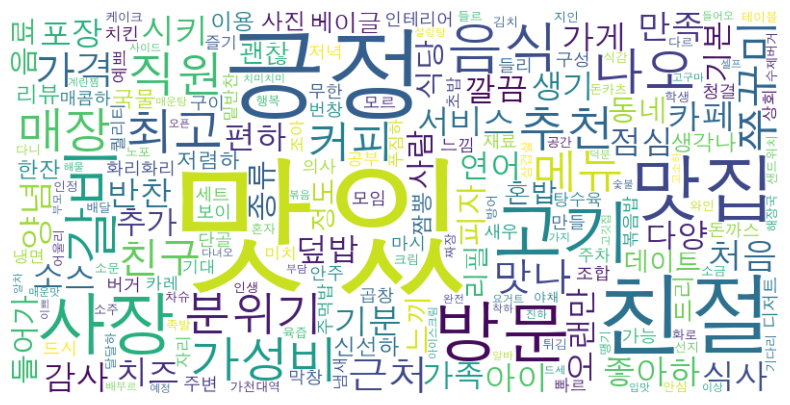

In [32]:
# CODE CELL (Îã§Ïùå Îã®Í≥Ñ ÏòàÏãú)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 'Review_final' Ïª¨ÎüºÏóê ÏûàÎäî Î™®Îì† Îã®Ïñ¥ Î¶¨Ïä§Ìä∏Îì§ÏùÑ ÌïòÎÇòÏùò ÌÅ∞ Î¶¨Ïä§Ìä∏Î°ú Ìï©Ïπ©ÎãàÎã§.
all_words = []
for words in df['Review_final']:
    all_words.extend(words)

# 2. ÌååÏù¥Ïç¨Ïùò CounterÎ•º Ïù¥Ïö©Ìï¥ Í∞Å Îã®Ïñ¥Ïùò ÎπàÎèÑÎ•º ÏÖâÎãàÎã§.
from collections import Counter
word_counts = Counter(all_words)

# 3. Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•Ìïú Îã®Ïñ¥ 50Í∞úÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.
print("--------- Í∞ÄÏû• ÎßéÏù¥ Ïñ∏Í∏âÎêú Îã®Ïñ¥ TOP 50 ---------")
print(word_counts.most_common(50))

# 4. ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§. (ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌï¥Ïïº Ìï©ÎãàÎã§)
# MacÏùò Í≤ΩÏö∞: font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf' 
wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_counts)

# 5. ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎ•º ÌôîÎ©¥Ïóê Î≥¥Ïó¨Ï§çÎãàÎã§.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Ï∂ïÏùÄ Î≥¥Ïù¥ÏßÄ ÏïäÍ≤å
plt.show()

In [50]:
word_counts.most_common(200)

[('ÎßõÏûà', 11638),
 ('Í∏çÏ†ï', 4028),
 ('ÏπúÏ†à', 3045),
 ('ÎßõÏßë', 1919),
 ('Í≥†Í∏∞', 1714),
 ('ÏÇ¨Ïû•', 1701),
 ('Î∞©Î¨∏', 1635),
 ('Í∞àÎπÑ', 1190),
 ('ÏùåÏãù', 1063),
 ('ÎÇòÏò§', 898),
 ('Í∞ÄÏÑ±ÎπÑ', 833),
 ('ÏµúÍ≥†', 824),
 ('ÏßÅÏõê', 793),
 ('Ï∂îÏ≤ú', 781),
 ('Îß§Ïû•', 773),
 ('Î©îÎâ¥', 720),
 ('Î∂ÑÏúÑÍ∏∞', 710),
 ('Ï≠àÍæ∏ÎØ∏', 652),
 ('Ïª§Ìîº', 624),
 ('ÏπúÍµ¨', 558),
 ('Í∑ºÏ≤ò', 541),
 ('Í∞ÄÍ≤©', 519),
 ('ÎßõÎÇò', 507),
 ('ÏñëÎÖê', 416),
 ('Ï≤òÏùå', 396),
 ('Ïπ¥Ìéò', 374),
 ('ÏãúÌÇ§', 369),
 ('ÎßåÏ°±', 366),
 ('ÏãùÏÇ¨', 362),
 ('Í∏∞Î∂Ñ', 357),
 ('Ï¢ãÏïÑÌïò', 346),
 ('Í∞êÏÇ¨', 345),
 ('Î∞òÏ∞¨', 341),
 ('ÏÑúÎπÑÏä§', 333),
 ('Ïó∞Ïñ¥', 322),
 ('ÎçÆÎ∞•', 321),
 ('Îã§Ïñë', 316),
 ('ÏÜåÏä§', 307),
 ('ÏïÑÏù¥', 299),
 ('ÌîºÏûê', 298),
 ('Ìè¨Ïû•', 293),
 ('ÍπîÎÅî', 287),
 ('Í∞ÄÍ≤å', 285),
 ('Ï†êÏã¨', 279),
 ('Ìé∏Ìïò', 277),
 ('ÏπòÏ¶à', 269),
 ('Ïò§ÎûúÎßå', 264),
 ('ÏÉùÍ∏∞', 258),
 ('Í∞ÄÏ°±', 249),
 ('Ï∂îÍ∞Ä', 243),
 ('ÏãùÎãπ', 239),
 ('Í∏∞Î≥∏', 238),
 ('Ï¢ÖÎ•ò', 237),
 ('ÎèôÎÑ§', 233),


### ÏßÅÏ†ë Îã®Ïñ¥ ÏÇ¨Ï†Ñ ÎßåÎì§Í∏∞ 

In [11]:
df = pd.read_csv('gachon_reviews_preprocessed.csv')

In [13]:
df

Restaurant     Nickname  \
0              ÌöåÏä§Ïãú        JREVE   
1              ÌöåÏä§Ïãú  xmdnlxl2666   
2              ÌöåÏä§Ïãú  asdfasdfa72   
3              ÌöåÏä§Ïãú      jsm****   
4              ÌöåÏä§Ïãú         ÏûâÎî©11   
...            ...          ...   
18865  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê        ÌÉ±Í∏ÄÏù¥83   
18866  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê    jms317897   
18867  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê           ÏÖòÏû•   
18868  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê      h10****   
18869  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê       hh****   

                                                  Review       Date  \
0      ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà...     8.19.Ìôî   
1       Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã     8.25.Ïõî   
2      Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ...      7.9.Ïàò   
3      ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑ...      8.9.ÌÜ†   
4                    ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî     8.21.Î™©   
...                                                  ...        ...   
18865  Ï∞®ÎèåÎ∞•Ïù¥Îûë Ï§ëÍµ≠ÎÉâÎ©¥ ÏãúÏº∞ÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥Ïöî!\nÎã§ÏùåÏóêÎèÑ ÏßÄÏù∏Îì§Ïù¥Îûë Î∞©Î¨∏ÌïòÍ≤åÎêòÎäî ÎßõÏù¥ÎÑ§Ïöî~  24.8.16.Í∏à   
18866                                               ÎßõÏûàÎã§!  24.8.17.ÌÜ†   
18867                                            ÎßõÏûàÏñ¥Ïöî~~~  24.8.17.ÌÜ†   
18868                                             Ïó¨Í∏∞ ÎßõÏßëÏûÑ  24.7.27.ÌÜ†   
18869                                           ÎßõÏûàÍ≥† ÏπúÏ†àÌï¥Ïöî  24.10.3.Î™©   

       Revisit_Count  Reviewer_Review_Count  Reviewer_Photo_Count  \
0                  1                    221                    11   
1                  1                     16                     8   
2                  1                     76                    21   
3                  1                     12                     4   
4                  1                     78                    16   
...              ...                    ...                   ...   
18865              2                    131                     2   
18866              1                     15                    12   
18867              1                     15                    17   
18868              1                      7                     5   
18869              1                    957                    19   

                                          Review_cleaned  \
0      ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî ÏÉàÏö∞ÌäÄÍπÄ...   
1          Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§ÏöîÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§Í∏çÏ†ï   
2      Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ÏÜåÎ¨∏...   
3      ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑÏ≤≠ ...   
4                    ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî   
...                                                  ...   
18865      Ï∞®ÎèåÎ∞•Ïù¥Îûë Ï§ëÍµ≠ÎÉâÎ©¥ ÏãúÏº∞ÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥ÏöîÎã§ÏùåÏóêÎèÑ ÏßÄÏù∏Îì§Ïù¥Îûë Î∞©Î¨∏ÌïòÍ≤åÎêòÎäî ÎßõÏù¥ÎÑ§Ïöî   
18866                                                ÎßõÏûàÎã§   
18867                                               ÎßõÏûàÏñ¥Ïöî   
18868                                             Ïó¨Í∏∞ ÎßõÏßëÏûÑ   
18869                                           ÎßõÏûàÍ≥† ÏπúÏ†àÌï¥Ïöî   

                                              POS_tagged  \
0      [('ÏπúÍµ¨', 'NNG'), ('Îûë', 'JKB'), ('

In [18]:
# CODE CELL (ÏàòÏ†ïÎêú ÏµúÏ¢Ö Î≤ÑÏ†Ñ)
import pandas as pd
import ast # Î¨∏ÏûêÏó¥ÏùÑ ÌååÏù¥Ïç¨ Í∞ùÏ≤¥(Î¶¨Ïä§Ìä∏, ÎîïÏÖîÎÑàÎ¶¨ Îì±)Î°ú Î≥ÄÌôòÌïòÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨

# (Ï§ëÏöî!) Ï†ÑÏ≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêú 'preprocessed' ÌååÏùºÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
df = pd.read_csv("gachon_reviews_preprocessed.csv")


# --- ‚ú®‚ú®‚ú® Ïó¨Í∏∞Í∞Ä Ïù¥Î≤à Î¨∏Ï†úÏùò ÌïµÏã¨ Ìï¥Í≤∞Ï±Ö! ‚ú®‚ú®‚ú® ---
# 1. 'Review_final' Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ ÏßÑÏßú 'Î¶¨Ïä§Ìä∏'Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
#    df['Review_final']Ïùò Í∞Å ÏÖÄÏóê ast.literal_eval Ìï®ÏàòÎ•º Ï†ÅÏö©(apply)Ìï©ÎãàÎã§.
print("Î¨∏ÏûêÏó¥ ÌÉÄÏûÖÏùÑ Î¶¨Ïä§Ìä∏ ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§...")
df['Review_final'] = df['Review_final'].apply(ast.literal_eval)
print("Î≥ÄÌôò ÏôÑÎ£å!")
# --------------------------------------------------


# 2. Í∞êÏÑ± ÏÇ¨Ï†ÑÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
positive_words = [
    'ÎßõÏßë', 'Ï¢ãÏïÑÌïò', 'Í∞ÄÏÑ±ÎπÑ', 'ÏπúÏ†à', 'Í∞êÏÇ¨', 'ÎßåÏ°±', 'Ï∂îÏ≤ú', 'ÍπîÎÅî', 
    'Ìé∏Ìïò', 'Ïã†ÏÑ†Ìïò', 'Ìë∏ÏßêÌïò', 'ÎßõÎÇò', 'ÌñâÎ≥µ', 'ÏµúÍ≥†', 'Ïù∏ÏÉù', 'Í∏∞Î∂Ñ', 'Î∞©Î¨∏', 'Í∏çÏ†ï',
    'ÏÑúÎπÑÏä§', 'Îã§Ïñë', 'Ï†ÄÎ†¥Ìïò','Î≤àÏ∞Ω','Îã®Í≥®', 'Ï≤≠Í≤∞', 'ÏòàÏÅò', 'Ï∞©Ìïò', 'ÎßõÏûà', 'Ï¢ãÏïò'
]
negative_words = [
    'ÏïÑÏâΩ', 'ÏïÑÏâ¨ÏõÄ', 'ÎäêÎÅºÌïò', 'Î≥ÑÎ°ú', 'Ïã§Îßù', 'ÎÉÑÏÉà', 'Í∏∞Îã§Î¶¨', 'ÏãúÎÅÑÎüΩ',
    'Î∂àÏπúÏ†à', 'ÎπÑÏã∏', 'Î∂ÄÏ†ï','Î∂ÄÎã¥', 'Ïù¥ÏÉÅ', 'ÎßõÏóÜ'
]

# 3. Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
def calculate_sentiment_score(word_list):
    score = 0
    # Ïù¥Ï†ú word_listÎäî ÏßÑÏßú Î¶¨Ïä§Ìä∏Ïù¥ÎØÄÎ°ú, wordÏóêÎäî 'ÏπúÍµ¨', 'ÎßõÏßë' Îì±Ïù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Îì§Ïñ¥Í∞ëÎãàÎã§.
    for word in word_list:
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1
    return score

# 4. 'Review_final' Ïª¨ÎüºÏóê Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨ 'Sentiment_Score' Ïª¨ÎüºÏùÑ ÏÉàÎ°ú ÎßåÎì≠ÎãàÎã§.
df['Sentiment_Score'] = df['Review_final'].apply(calculate_sentiment_score)

# 5. Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.
print("\n--------- Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Í≤∞Í≥º ---------")
# Ï†êÏàòÍ∞Ä 0Ïù¥ ÏïÑÎãå Í∞íÎì§Î°ú Ï±ÑÏõåÏ°åÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
print(df[['Review', 'Review_final', 'Sentiment_Score']].head(10))

Î¨∏ÏûêÏó¥ ÌÉÄÏûÖÏùÑ Î¶¨Ïä§Ìä∏ ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§...
Î≥ÄÌôò ÏôÑÎ£å!

--------- Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Í≤∞Í≥º ---------
                                              Review  \
0  ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà...   
1   Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã   
2  Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ...   
3  ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑ...   
4                ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî   
5  Ìöå Îï°Í≤®ÏÑú Î®πÏúºÎü¨ Í∞îÎäîÎç∞ ÌöåÍ∞Ä ÏóÑÏ≤≠ Ïã†ÏÑ†ÌïòÍ≥† Îã§Î•∏ Î©îÎâ¥ÎèÑ ÌïòÎÇòÍ∞ôÏù¥ Îã§ ÎßõÏûàÏóàÏñ¥Ïö© !...   
6  ÏôÄ Ïó¨Í∏∞ Ìöå ÏôúÏù¥Î†áÍ≤å ÎßõÏûàÏñ¥Ïö©?!üëçüèªü§£ Í∑∏ÎèôÏïà ÎÇ®ÏûêÏ

In [98]:
# CODE CELL (Îã§Ïùå Îã®Í≥Ñ ÏòàÏãú)

# 1. ÏãùÎãπÎ≥ÑÎ°ú Í∑∏Î£πÏùÑ Î¨∂Í≥†, Í∞Å ÏãùÎãπÏùò 'Sentiment_Score'Ïùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
average_scores = df.groupby('Restaurant')['Sentiment_Score'].mean()

# 2. ÌèâÍ∑† Ï†êÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨Ìï©ÎãàÎã§.
top_restaurants = average_scores.sort_values(ascending=False)

print("--------- ÏãùÎãπÎ≥Ñ ÌèâÍ∑† Í∞êÏÑ± Ï†êÏàò TOP 10 ---------")
print(top_restaurants.head(10))

print("\n--------- ÏãùÎãπÎ≥Ñ ÌèâÍ∑† Í∞êÏÑ± Ï†êÏàò BOTTOM 10 ---------")
print(top_restaurants.tail(10))

--------- ÏãùÎãπÎ≥Ñ ÌèâÍ∑† Í∞êÏÑ± Ï†êÏàò TOP 10 ---------
Restaurant
ÌïÑÍ∑∏Î¶ºÎ°úÏä§ÌÑ∞Ïä§ Ïª§ÌîºÎû©        5.000000
Í∏àÎ£°ÎßàÎùºÌÉï              3.272727
ÏΩîÏΩîÎ†àÎ™®ÎÑõÎ≤†Ïù¥ÌÅ¨ÏÉµ          3.222222
ÏòÅÏö∏Ïû•Ïù∏               3.130435
Í∑∏ÎÇ†Ïùò Î∂ÑÏúÑÍ∏∞            3.031447
ÌîåÎ°úÏö∞Ìã¥ Îñ°ÏºÄÏù¥ÌÅ¨          3.029412
Î∞îÎã§ÏôïÍµ≠ÏïÑÍµ¨Ï∞ú&Ìï¥Î¨ºÏ∞ú ÏÑ±ÎÇ®Ï†ê    3.028369
Î¨¥ÌôîÍ≥ºÎÇòÎ¨¥ÏïÑÎûò            3.021277
ÎèôÎåÄÎ¨∏ÏóΩÍ∏∞Îñ°Î≥∂Ïù¥ ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê     2.708333
Íæ∏Îçï                 2.702381
Name: Sentiment_Score, dtype: float64

--------- ÏãùÎãπÎ≥Ñ ÌèâÍ∑† Í∞êÏÑ± Ï†êÏàò BOTTOM 10 ---------
Restaurant
Ïã†ÏùòÌïúÏªµ Í∞ÄÏ≤úÎåÄÏ†ê            0.463542
Ïù¥ÎîîÏïºÏª§Ìîº Í∞ÄÏ≤úÎåÄÏ†ê           0.461538
ÌååÏä§Ïø†Ï∞å Í∞ÄÏ≤úÎåÄÏ†ê            0.452381
ÎÖ∏ÎßàÏßÑÏïÑÏù¥Ïä§ÌÅ¨Î¶ºÌï†Ïù∏Ï†ê ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê    0.449438
Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§ Í∞ÄÏ≤úÎåÄÏ†ê          0.443299
ÎçòÌÇ® Í∞ÄÏ≤úÎåÄÏ†ê              0.422680
ÎçîÎßò                   0.388889
ÌîºÏûêÏä§Ïø® ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê           0.285714
Í∞ÄÏ≤úÎåÄÌ

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


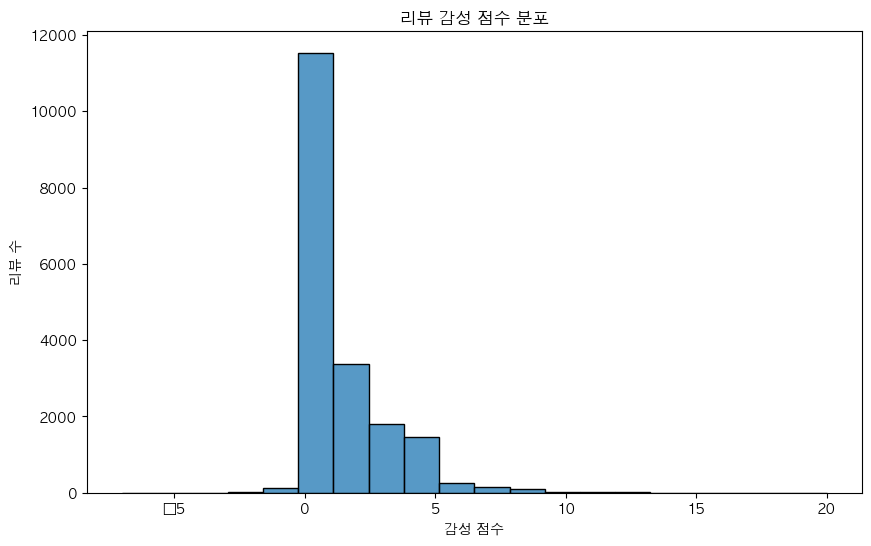

In [17]:
# CODE CELL (Îã§Ïùå Îã®Í≥Ñ ÏòàÏãú)
import matplotlib.pyplot as plt
import seaborn as sns

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ïÏùÑ Ìï¥Ï§òÏïº Í∑∏ÎûòÌîÑÏóêÏÑú ÌïúÍ∏ÄÏù¥ Íπ®ÏßÄÏßÄ ÏïäÏäµÎãàÎã§.
plt.rcParams['font.family'] = 'AppleGothic' # Mac ÏÇ¨Ïö©Ïûê
# plt.rcParams['font.family'] = 'Malgun Gothic' # Windows ÏÇ¨Ïö©Ïûê

plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Score'], bins=20, kde=False)
plt.title('Î¶¨Î∑∞ Í∞êÏÑ± Ï†êÏàò Î∂ÑÌè¨')
plt.xlabel('Í∞êÏÑ± Ï†êÏàò')
plt.ylabel('Î¶¨Î∑∞ Ïàò')
plt.show()

Ï†ÑÏ≤¥ Î¶¨Î∑∞ Ïàò: 18870
Í∞êÏÑ± Ï†êÏàò 0Ï†ê Ïù¥ÌïòÏù∏ Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¶¨Î∑∞ Ïàò: 128

--------- Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¶¨Î∑∞ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ Ïñ∏Í∏âÎêú Îã®Ïñ¥ TOP 50 ---------
[('Í∏∞Îã§Î¶¨', 37), ('ÎÉÑÏÉà', 27), ('ÎπÑÏã∏', 26), ('ÎÇòÏò§', 23), ('Í∞ÄÍ≤©', 20), ('Ïù¥ÏÉÅ', 19), ('ÏãúÌÇ§', 16), ('Î∂ÄÎã¥', 15), ('Í≥†Í∏∞', 15), ('ÌîºÏûê', 12), ('ÏÇ¨Ïû•', 10), ('Î∂ÄÏ†ï', 10), ('Ïã§Îßù', 10), ('ÎßõÏóÜ', 9), ('Ïª§Ìîº', 9), ('Í∏∞ÎåÄ', 8), ('Ï≠àÍæ∏ÎØ∏', 8), ('ÏÇ¨Îûå', 8), ('Î©îÎâ¥', 8), ('ÏùåÏãù', 7), ('ÎßõÏûà', 7), ('ÏùåÎ£å', 7), ('ÏßÅÏõê', 7), ('Î™®Î•¥', 6), ('Îì§Ïñ¥Í∞Ä', 6), ('Ïã¨Ìïò', 6), ('ÏπòÏ¶à', 6), ('ÏÉùÍ∏∞', 6), ('Ïπ¥Ìéò', 6), ('Î∞òÏ∞¨', 6), ('ÏπúÍµ¨', 5), ('Ï¶êÍ∏∞', 5), ('Î∂ÑÏúÑÍ∏∞', 5), ('ÎÑ§Ïù¥Î≤Ñ', 5), ('ÎåÄÍ∏∞', 5), ('Î¶¨Î∑∞', 5), ('Í∞ÄÎä•', 5), ('Îï°Í∏∞', 5), ('ÎøåÎ¶¨', 5), ('ÎÇòÏÅò', 5), ('Ìè¨Ïû•', 5), ('Ï≤òÏùå', 5), ('ÌòºÏûê', 4), ('ÏàØÎ∂à', 4), ('Í∞àÎπÑ', 4), ('ÏãùÏÇ¨', 4), ('ÎßåÎì§', 4), ('ÎùºÎ©¥', 4), ('ÎπÑÌïò', 4), ('ÌôîÎ¶¨ÌôîÎ¶¨', 4)]

--------- Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¶¨Î∑∞ ÏõåÎìú ÌÅ¥Îùº

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(

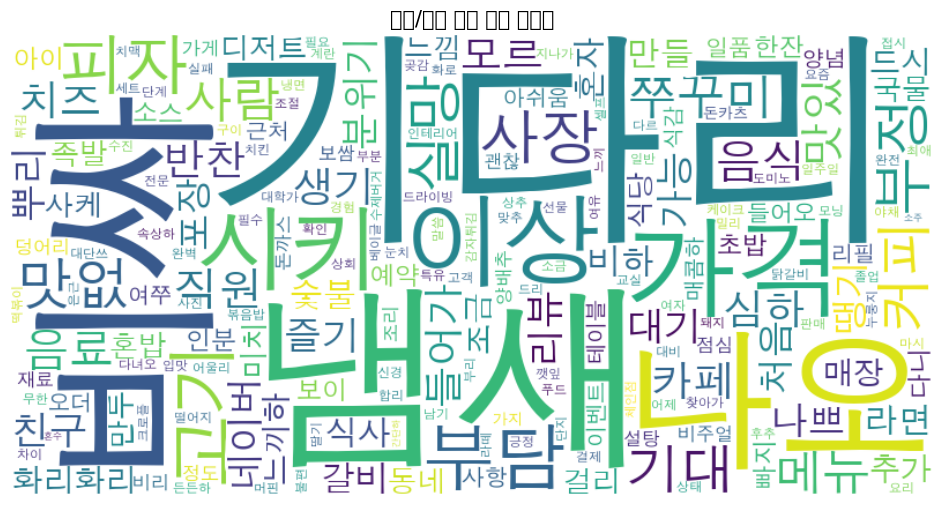

In [7]:
# -----------------------------------------------------------------
# PART 0: ÌïÑÏöîÌïú ÎèÑÍµ¨Îì§ÏùÑ ÎØ∏Î¶¨ Î∂àÎü¨ÏòµÎãàÎã§.
# -----------------------------------------------------------------
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast # Î¨∏ÏûêÏó¥Î°ú Ï†ÄÏû•Îêú Î¶¨Ïä§Ìä∏Î•º ÏßÑÏßú Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöî

# -----------------------------------------------------------------
# PART 1: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# -----------------------------------------------------------------
# Ï†ÑÏ≤òÎ¶¨ÏôÄ Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞Ïù¥ Î™®Îëê ÏôÑÎ£åÎêú CSV ÌååÏùºÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
# (Ïù¥Ï†ÑÏóê Ï†ÄÏû•Ìïú ÌååÏùº Ïù¥Î¶ÑÏùÑ Ï†ïÌôïÌïòÍ≤å ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî)
try:
    # 'Review_final' Ïª¨ÎüºÏù¥ Î¨∏ÏûêÏó¥ ÌòïÌÉúÏùº Í≤ΩÏö∞, ÏßÑÏßú Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    if isinstance(df['Review_final'].iloc[0], str):
        df['Review_final'] = df['Review_final'].apply(ast.literal_eval)
except FileNotFoundError:
    print("Ïò§Î•ò: Í∞êÏÑ± Ï†êÏàòÍ∞Ä Ìè¨Ìï®Îêú Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÌååÏùº Ïù¥Î¶ÑÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    # ÎòêÎäî, Ïù¥Ï†Ñ Îã®Í≥Ñ ÏΩîÎìúÎ•º Ïó¨Í∏∞Ïóê Î∂ôÏó¨ÎÑ£Ïñ¥ dfÎ•º Î∞îÎ°ú ÏÉùÏÑ±Ìï¥ÎèÑ Îê©ÎãàÎã§.
    exit()

# -----------------------------------------------------------------
# PART 2: Î∂ÄÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞Îßå Í≥®ÎùºÎÇ¥Í∏∞
# -----------------------------------------------------------------
print("Ï†ÑÏ≤¥ Î¶¨Î∑∞ Ïàò:", len(df))

# Í∞êÏÑ± Ï†êÏàòÍ∞Ä 0Ï†ê Ïù¥ÌïòÏù∏ Î¶¨Î∑∞Îì§Îßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ 'negative_df'ÎùºÎäî ÏÉàÎ°úÏö¥ DataFrameÏùÑ ÎßåÎì≠ÎãàÎã§.
negative_df = df[df['Sentiment_Score'] < 0].copy() # .copy()Î•º Î∂ôÏó¨Ï£ºÎ©¥ ÍπîÎÅîÌï©ÎãàÎã§.

print("Í∞êÏÑ± Ï†êÏàò 0Ï†ê Ïù¥ÌïòÏù∏ Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¶¨Î∑∞ Ïàò:", len(negative_df))

# -----------------------------------------------------------------
# PART 3: Î∂ÄÏ†ï Î¶¨Î∑∞Ïóê Ìè¨Ìï®Îêú Îã®Ïñ¥Îì§Ïùò ÎπàÎèÑÏàò Í≥ÑÏÇ∞
# -----------------------------------------------------------------
# 1. Î∂ÄÏ†ï Î¶¨Î∑∞Ïùò 'Review_final' Ïª¨ÎüºÏóê ÏûàÎäî Î™®Îì† Îã®Ïñ¥ Î¶¨Ïä§Ìä∏Îì§ÏùÑ ÌïòÎÇòÏùò ÌÅ∞ Î¶¨Ïä§Ìä∏Î°ú Ìï©Ïπ©ÎãàÎã§.
all_negative_words = []
for words in negative_df['Review_final']:
    all_negative_words.extend(words)

# 2. CounterÎ•º Ïù¥Ïö©Ìï¥ Í∞Å Îã®Ïñ¥Ïùò ÎπàÎèÑÎ•º ÏÖâÎãàÎã§.
negative_word_counts = Counter(all_negative_words)

# 3. Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•Ìïú Î∂ÄÏ†ï Í¥ÄÎ†® Îã®Ïñ¥ 50Í∞úÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.
print("\n--------- Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¶¨Î∑∞ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ Ïñ∏Í∏âÎêú Îã®Ïñ¥ TOP 50 ---------")
print(negative_word_counts.most_common(50))


# -----------------------------------------------------------------
# PART 4: Î∂ÄÏ†ï Î¶¨Î∑∞ ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± Î∞è ÏãúÍ∞ÅÌôî
# -----------------------------------------------------------------
# 4. ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°úÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§. (ÏÇ¨Ïö©Ïûê ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ï)
# MacÏùò Í≤ΩÏö∞: font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf'
# WindowsÏùò Í≤ΩÏö∞: font_path='c:/Windows/Fonts/malgun.ttf'
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf' 

# 5. ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
negative_wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(negative_word_counts)

# 6. ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎ•º ÌôîÎ©¥Ïóê ÏòàÏÅòÍ≤å Î≥¥Ïó¨Ï§çÎãàÎã§.
print("\n--------- Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¶¨Î∑∞ ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ---------")
plt.figure(figsize=(12, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¶¨Î∑∞ ÌïµÏã¨ ÌÇ§ÏõåÎìú', size=15)
plt.axis('off') # Ï∂ïÏùÄ Î≥¥Ïù¥ÏßÄ ÏïäÍ≤å
plt.show()

### ÏàòÏûëÏóÖ : 4Í∞úÏùò Í∏∞Ï§ÄÏúºÎ°ú Î≥ÑÏ†ê Îß§Í∏∞Í∏∞

In [394]:
# CODE CELL 1: Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÏÇ¨Ï†Ñ Ï†ïÏùò
import pandas as pd
import ast

# 1. Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§.
df = pd.read_csv("gachon_reviews_preprocessed.csv") 

# 2. (Í∞ÄÏû• Ï§ëÏöî!) 'Review_final' Ïª¨ÎüºÏùÑ Î¨∏ÏûêÏó¥ÏóêÏÑú ÏßÑÏßú Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
if isinstance(df['Review_final'].iloc[0], str):
    df['Review_final'] = df['Review_final'].apply(ast.literal_eval)

# 3. Í∏çÏ†ï/Î∂ÄÏ†ï Î∞è ÏÜçÏÑ± ÌÇ§ÏõåÎìú ÏÇ¨Ï†ÑÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
positive_words = [
    'ÎßõÏßë', 'Ï¢ãÏïÑÌïò', 'Í∞ÄÏÑ±ÎπÑ', 'ÏπúÏ†à', 'Í∞êÏÇ¨', 'ÎßåÏ°±', 'Ï∂îÏ≤ú', 'ÍπîÎÅî', 
    'Ìé∏Ìïò', 'Ïã†ÏÑ†Ìïò', 'Ìë∏ÏßêÌïò', 'ÎßõÎÇò', 'ÌñâÎ≥µ', 'ÏµúÍ≥†', 'Ïù∏ÏÉù', 'Í∏∞Î∂Ñ', 'Î∞©Î¨∏', 'Í∏çÏ†ï',
    'ÏÑúÎπÑÏä§', 'Îã§Ïñë', 'Ï†ÄÎ†¥Ìïò','Î≤àÏ∞Ω','Îã®Í≥®', 'Ï≤≠Í≤∞', 'ÏòàÏÅò', 'Ï∞©Ìïò', 'ÎßõÏûà', 'Ï¢ãÏïò'
]
negative_words = [
    'ÏïÑÏâΩ', 'ÏïÑÏâ¨ÏõÄ', 'ÎäêÎÅºÌïò', 'Î≥ÑÎ°ú', 'Ïã§Îßù', 'ÎÉÑÏÉà', 'Í∏∞Îã§Î¶¨', 'ÏãúÎÅÑÎüΩ',
    'Î∂àÏπúÏ†à', 'ÎπÑÏã∏', 'Î∂ÄÏ†ï','Î∂ÄÎã¥', 'Ïù¥ÏÉÅ', 'ÎßõÏóÜ', 'Î∞çÎ∞ç', 'Ïã±Í≤ÅÎã§', 'ÎçîÎüΩ'
]
aspect_keywords = {
    'Îßõ': ['Îßõ', 'ÎßõÏßë', 'ÎßõÏûà', 'Ïã†ÏÑ†Ìïò', 'ÏùåÏãù', 'Î©îÎâ¥', 'Ïª§Ìîº', 'ÌîºÏûê', 'ÏπòÌÇ®', 'Î∞òÏ∞¨', 
           'ÏÜåÏä§', 'Íµ≠Î¨º', 'ÎçÆÎ∞•', 'Í∞àÎπÑ', 'ÎÉâÎ©¥', 'ÎèàÍπåÏä§', 'ÏÉàÏö∞', 'Ïó∞Ïñ¥', 'ÏñëÎÖê', 
           'ÌäÄÍπÄ', 'ÌÄÑÎ¶¨Ìã∞', 'Ïû¨Î£å', 'ÏßúÎã§', 'ÎäêÎÅºÌïò', 'ÎßõÏóÜ'],
    'Í∞ÄÍ≤©': ['Í∞ÄÏÑ±ÎπÑ', 'Í∞ÄÍ≤©', 'Ï†ÄÎ†¥Ìïò', 'ÎπÑÏã∏', 'Î∂ÄÎã¥', 'Ìï†Ïù∏', 'Ïø†Ìè∞'],
    'ÏÑúÎπÑÏä§': ['ÏßÅÏõê', 'ÏÇ¨Ïû•Îãò', 'ÏπúÏ†à', 'ÏÑúÎπÑÏä§', 'ÏùëÎåÄ', 'Í∞êÏÇ¨', 'Î∂àÏπúÏ†à', 'ÏÑ§Î™Ö', 'ÏòàÏïΩ'],
    'Î∂ÑÏúÑÍ∏∞': ['Î∂ÑÏúÑÍ∏∞', 'Îß§Ïû•', 'Ïù∏ÌÖåÎ¶¨Ïñ¥', 'ÍπîÎÅî', 'Ìé∏Ìïò', 'Ï≤≠Í≤∞', 'Í≥µÍ∞Ñ', 'ÏûêÎ¶¨', 'ÎåÄÍ∏∞',
             'Ïõ®Ïù¥ÌåÖ', 'ÏãúÎÅÑÎüΩ', 'Î™®ÏûÑ', 'Îç∞Ïù¥Ìä∏', 'ÌòºÎ∞•', 'Ï£ºÏ∞®', 'ÏÇ¨ÏßÑ']
}

print("STEP 1: Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÏÇ¨Ï†Ñ Ï†ïÏùò ÏôÑÎ£å!")


# CODE CELL 2: Ï†ÑÏ≤¥ Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞
intensifier_dict = {
    'ÎÑàÎ¨¥': 1.5,
    'ÏßÑÏßú': 1.3,
    'ÏôÑÏ†Ñ': 1.5,
    'ÏóÑÏ≤≠': 1.4,
    'ÏµúÍ≥†': 1.5, # 'ÏµúÍ≥†'Îäî Í∏çÏ†ïÎã®Ïñ¥Ïù¥Î©¥ÏÑú ÎèôÏãúÏóê Í∞ïÏ°∞Ïùò ÏùòÎØ∏ÎèÑ Í∞ÄÏßà Ïàò ÏûàÏäµÎãàÎã§.
    'Ï¢Ä': 0.8,
    'Ï°∞Í∏à': 0.8,
    'ÏÇ¥Ïßù': 0.7
}
# -----------------------------------------------------------

# # --- ‚ú®‚ú®‚ú® Ïó¨Í∏∞Í∞Ä Ïù¥Î≤à Î¨∏Ï†úÏùò ÏµúÏ¢Ö Ìï¥Í≤∞Ï±Ö! ‚ú®‚ú®‚ú® ---
# # 2. ÏÜçÏÑ±Î≥Ñ Ï†êÏàòÎ•º 'Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú' Í≥ÑÏÇ∞ÌïòÎäî ÏÉàÎ°úÏö¥ Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
# def calculate_final_aspect_scores(word_list):
#     scores = {'Îßõ_Ï†êÏàò': 0.0, 'Í∞ÄÍ≤©_Ï†êÏàò': 0.0, 'ÏÑúÎπÑÏä§_Ï†êÏàò': 0.0, 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò': 0.0}
    
#     # Îã®Ïñ¥ Î™©Î°ùÏùÑ ÏàúÌöåÌïòÎ©∞ Ï†êÏàòÎ•º Í≥ÑÏÇ∞
#     for i, word in enumerate(word_list):
#         base_score = 0
#         if word in positive_words:
#             base_score = 1
#         elif word in negative_words:
#             base_score = -1
        
#         if base_score == 0:
#             continue

#         weight = 1.0
#         if i > 0:
#             previous_word = word_list[i-1]
#             if previous_word in intensifier_dict:
#                 weight = intensifier_dict[previous_word]
        
#         final_score = base_score * weight
        
#         # (Ï§ëÏöî!) Ïù¥ Îã®Ïñ¥Í∞Ä Ïñ¥Îñ§ ÏÜçÏÑ±Ïóê Ìï¥ÎãπÌïòÎäîÏßÄ Ï∞æÏïÑÏÑú, Ìï¥Îãπ ÏÜçÏÑ±Ïùò Ï†êÏàòÎßå ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§.
#         for aspect, keywords in aspect_keywords.items():
#             if word in keywords:
#                 scores[f'{aspect}_Ï†êÏàò'] += final_score
    
#     return pd.Series(scores)

# # 3. ÏÉàÎ°úÏö¥ Ìï®ÏàòÎ•º Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©ÌïòÏó¨, 4Í∞úÏùò ÏÜçÏÑ± Ï†êÏàò Ïª¨ÎüºÏùÑ Î∞îÎ°ú ÏÉùÏÑ±Ìï©ÎãàÎã§.
# print("ÏÉàÎ°úÏö¥ Î∞©ÏãùÏúºÎ°ú ÏÜçÏÑ±Î≥Ñ Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
# aspect_scores_df = df['Review_final'].apply(calculate_final_aspect_scores)
# # Í∏∞Ï°¥ dfÏóê ÏûàÎäî ÏòõÎÇ† Ï†êÏàò Ïª¨ÎüºÏùÄ ÏßÄÏö∞Í≥†, ÏÉàÎ°úÏö¥ Ï†êÏàòÎ°ú ÏóÖÎç∞Ïù¥Ìä∏ Ìï©ÎãàÎã§.
# df = df.drop(columns=['Îßõ_Ï†êÏàò', 'Í∞ÄÍ≤©_Ï†êÏàò', 'ÏÑúÎπÑÏä§_Ï†êÏàò', 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò'], errors='ignore')
# df = pd.concat([df, aspect_scores_df], axis=1)
# print("Í≥ÑÏÇ∞ ÏôÑÎ£å!")


# # 4. Ïù¥Ï†ú 'Sentiment_Score'Îäî Í∞Å ÏÜçÏÑ± Ï†êÏàòÏùò 'Ìï©Í≥Ñ'Î°ú ÏÉàÎ°≠Í≤å Ï†ïÏùòÌï©ÎãàÎã§.
# df['Sentiment_Score'] = df[['Îßõ_Ï†êÏàò', 'Í∞ÄÍ≤©_Ï†êÏàò', 'ÏÑúÎπÑÏä§_Ï†êÏàò', 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò']].sum(axis=1)


# # 5. ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.
# print("\n--------- ÏµúÏ¢Ö Í≤∞Í≥º (ÏÉÅÏúÑ 5Í∞ú) ---------")
# print(df[['Review_final', 'Sentiment_Score', 'Îßõ_Ï†êÏàò', 'Í∞ÄÍ≤©_Ï†êÏàò', 'ÏÑúÎπÑÏä§_Ï†êÏàò', 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò']].head())

# # 6. ÏãùÎãπÎ≥Ñ ÌèâÍ∑† Ï†êÏàòÎèÑ Îã§Ïãú Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
# score_cols = ['Îßõ_Ï†êÏàò', 'Í∞ÄÍ≤©_Ï†êÏàò', 'ÏÑúÎπÑÏä§_Ï†êÏàò', 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò']
# restaurant_aspect_scores = df.groupby('Restaurant')[score_cols].mean()
# print("\n--------- (ÏàòÏ†ï ÌõÑ) ÏãùÎãπÎ≥Ñ ÌèâÍ∑† ÏÜçÏÑ± Ï†êÏàò (ÏÉÅÏúÑ 10Í∞ú) ---------")
# pd.options.display.float_format = '{:.2f}'.format
# print(restaurant_aspect_scores.head(10))


# ---------------


# CODE CELL 2 (FINAL & ROBUST v2): Ï£ºÎ≥Ä Îã®Ïñ¥ ÌÉêÏÉâ Í∏∞Î∞ò Ï†êÏàò ÏãúÏä§ÌÖú
# CODE CELL 2 (FINAL & INDUSTRY-STANDARD): Ïã†Î¢∞ÎèÑ Î≥¥Ï†ï Ï†êÏàò ÏãúÏä§ÌÖú

# 1. Í≥ÑÏÇ∞Ïóê ÌïÑÏöîÌïú ÏÇ¨Ï†ÑÍ≥º Í∞ÄÏ§ëÏπò Ï†ïÏùò (Í∏∞Ï°¥Í≥º ÎèôÏùº)
intensifier_dict = {
    'ÎÑàÎ¨¥': 1.5, 'ÏßÑÏßú': 1.3, 'ÏôÑÏ†Ñ': 1.5, 'ÏóÑÏ≤≠': 1.4, 'ÏµúÍ≥†': 1.5,
    'Ï¢Ä': 0.8, 'Ï°∞Í∏à': 0.8, 'ÏÇ¥Ïßù': 0.7
}
# (positive_words, negative_words, aspect_keywords ÏÇ¨Ï†ÑÏùÄ CODE CELL 1ÏóêÏÑú Ïù¥ÎØ∏ Ï†ïÏùòÎê®)

# --- ‚ú®‚ú®‚ú® Ïó¨Í∏∞Í∞Ä ÏôÑÏ†ÑÌûà ÏÉàÎ°úÏõåÏßÑ ÏµúÏ¢Ö ÌïµÏã¨ Î°úÏßÅ! ‚ú®‚ú®‚ú® ---
# 2. ÏãùÎãπ ÌïòÎÇò(Ïùò Î¶¨Î∑∞ Í∑∏Î£π)Î•º ÌÜµÏß∏Î°ú Î∞õÏïÑ, Ïã†Î¢∞ÎèÑÎ•º Î≥¥Ï†ïÌïú Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò
def calculate_bayesian_average_scores(group, C=5, m=0.5):
    # C: Ïã†Î¢∞ÎèÑ Î≥¥Ï†ï Í∞ïÎèÑ. Í∞ÄÏÉÅÏùò Î¶¨Î∑∞ Í∞úÏàòÎùºÍ≥† ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏäµÎãàÎã§. ÌÅ¥ÏàòÎ°ù Ï†êÏàòÍ∞Ä Ï§ëÍ∞ÑÍ∞íÏóê Í∞ÄÍπåÏõåÏßëÎãàÎã§.
    # m: ÏÇ¨Ï†Ñ ÌôïÎ•†. Í∏çÏ†ï Î¶¨Î∑∞Ïùò Í∏∞Î≥∏ ÎπÑÏú®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. (0.5Îäî Í∏çÏ†ï:Î∂ÄÏ†ï=50:50ÏùÑ ÏùòÎØ∏)
    
    aspect_sentiment_totals = {
        'Îßõ': {'pos': 0.0, 'neg': 0.0}, 'Í∞ÄÍ≤©': {'pos': 0.0, 'neg': 0.0},
        'ÏÑúÎπÑÏä§': {'pos': 0.0, 'neg': 0.0}, 'Î∂ÑÏúÑÍ∏∞': {'pos': 0.0, 'neg': 0.0}
    }
    
    # Part 1: Í∞Å ÏÜçÏÑ±Ïóê ÎåÄÌïú Í∏çÏ†ï/Î∂ÄÏ†ï Ïñ∏Í∏â ÌöüÏàò(Í∞ÄÏ§ëÏπò Ìè¨Ìï®) ÏßëÍ≥Ñ
    for word_list in group['Review_final']:
        for i, word in enumerate(word_list):
            base_score, assigned_aspect = 0, None
            if word in positive_words: base_score = 1
            elif word in negative_words: base_score = -1
            if base_score == 0: continue

            weight = 1.0
            if i > 0 and word_list[i-1] in intensifier_dict:
                weight = intensifier_dict[word_list[i-1]]
            final_score = base_score * weight

            for aspect, keywords in aspect_keywords.items():
                if word in keywords:
                    assigned_aspect = aspect
                    break
            
            if not assigned_aspect:
                window_size = 2
                start, end = max(0, i - window_size), min(len(word_list), i + window_size + 1)
                for j in range(start, end):
                    if i == j: continue
                    for aspect, keywords in aspect_keywords.items():
                        if word_list[j] in keywords:
                            assigned_aspect = aspect
                            break
                    if assigned_aspect: break
            
            if assigned_aspect:
                if final_score > 0:
                    aspect_sentiment_totals[assigned_aspect]['pos'] += final_score
                else:
                    aspect_sentiment_totals[assigned_aspect]['neg'] += abs(final_score)

    # Part 2: Î≤†Ïù¥ÏßÄÏïà ÌèâÍ∑† Í≥µÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ¢Ö 5Ï†ê ÎßåÏ†ê Ï†êÏàò Í≥ÑÏÇ∞
    final_scores = {}
    for aspect, totals in aspect_sentiment_totals.items():
        pos_total, neg_total = totals['pos'], totals['neg']
        
        # Î≤†Ïù¥ÏßÄÏïà ÌèâÍ∑† Í≥µÏãù: (Ïã§Ï†ú Í∏çÏ†ï Ïàò + Í∞ÄÏÉÅ Í∏çÏ†ï Ïàò) / (Ï†ÑÏ≤¥ Ïã§Ï†ú Ïàò + Ï†ÑÏ≤¥ Í∞ÄÏÉÅ Ïàò)
        # Í∞ÄÏÉÅ Í∏çÏ†ï Ïàò = C * m, Ï†ÑÏ≤¥ Í∞ÄÏÉÅ Ïàò = C
        bayesian_ratio = (pos_total + C * m) / (pos_total + neg_total + C)
        final_score = bayesian_ratio * 5.0
        
        final_scores[f'{aspect}_Ï†êÏàò'] = final_score

    # Part 3: Î¶¨Î∑∞ ÏàòÎèÑ Ìï®Íªò Í≥ÑÏÇ∞ÌïòÏó¨ Î∞òÌôò
    results = pd.Series(final_scores)
    results['Total_Reviews'] = len(group)
    return results

# 3. ÏÉàÎ°úÏö¥ ÌÜµÌï© Ìï®ÏàòÎ•º Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
print("Ïã†Î¢∞ÎèÑ Î≥¥Ï†ï Ï†êÏàò ÏãúÏä§ÌÖúÏúºÎ°ú Ïû¨Í≥ÑÏÇ∞ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
# C Í∞íÏùÑ Ï°∞Ï†àÌïòÏó¨ Î≥¥Ï†ï Í∞ïÎèÑÎ•º Î∞îÍøÄ Ïàò ÏûàÏäµÎãàÎã§. (Î¶¨Î∑∞Í∞Ä Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî 5~10 Ï†ïÎèÑÍ∞Ä Ï†ÅÎãπ)
df = df.groupby('Restaurant').apply(lambda g: calculate_bayesian_average_scores(g, C=5)).reset_index()
print("Í≥ÑÏÇ∞ ÏôÑÎ£å!")

# 4. ÏµúÏ¢Ö Ï†êÏàò(Final_Rating) Í≥ÑÏÇ∞
score_cols = ['Îßõ_Ï†êÏàò', 'Í∞ÄÍ≤©_Ï†êÏàò', 'ÏÑúÎπÑÏä§_Ï†êÏàò', 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò']
df['Final_Rating'] = df_ranking_new[score_cols].mean(axis=1)

# 5. ÏµúÏ¢Ö Îû≠ÌÇπ ÌôïÏù∏
df= df.sort_values(by='Final_Rating', ascending=False).reset_index(drop=True)
print("\n--------- (ÏµúÏ¢Ö ÏàòÏ†ï ÌõÑ) ÏãùÎãπ Îû≠ÌÇπ (ÏÉÅÏúÑ 10Í∞ú) ---------")
pd.options.display.float_format = '{:.2f}'.format
df = df[['Restaurant', 'Îßõ_Ï†êÏàò', 'Í∞ÄÍ≤©_Ï†êÏàò', 'ÏÑúÎπÑÏä§_Ï†êÏàò', 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò']]

STEP 1: Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÏÇ¨Ï†Ñ Ï†ïÏùò ÏôÑÎ£å!
Ïã†Î¢∞ÎèÑ Î≥¥Ï†ï Ï†êÏàò ÏãúÏä§ÌÖúÏúºÎ°ú Ïû¨Í≥ÑÏÇ∞ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
Í≥ÑÏÇ∞ ÏôÑÎ£å!

--------- (ÏµúÏ¢Ö ÏàòÏ†ï ÌõÑ) ÏãùÎãπ Îû≠ÌÇπ (ÏÉÅÏúÑ 10Í∞ú) ---------


/var/folders/f4/1y5qvmvd5v514kbpgr0p58440000gn/T/ipykernel_1510/3543910257.py:183: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Restaurant').apply(lambda g: calculate_bayesian_average_scores(g, C=5)).reset_index()


In [396]:
### CODE CELL (ÏµúÏ¢Ö Í≤∞Í≥ºÎ¨º Ï†ÄÏû•) #####

# ÏÇ¨Ï†Ñ (ÎÇ¥Í∞Ä ÏßÅÏ†ë Ï†ïÏùòÌïú) Í∏∞Î∞ò Ï†êÏàò Í≤∞Í≥ºÎ¨º !!


# 2. ÏãùÎãπÎ≥Ñ ÌèâÍ∑† Ï†êÏàò ÏöîÏïΩÎ≥∏ DataFrame Ï†ÄÏû•
#    - 'Restaurant'Í∞Ä Ïù∏Îç±Ïä§Î°ú ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú, reset_index()Î•º ÏÇ¨Ïö©Ìï¥ ÏùºÎ∞ò Ïª¨ÎüºÏúºÎ°ú Î∞îÍøîÏ§Ä Îí§ Ï†ÄÏû•ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.
print("\nÏãùÎãπÎ≥Ñ ÌèâÍ∑† Ï†êÏàò ÏöîÏïΩÎ≥∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§...")
df.reset_index().to_csv("gachon_restaurant_aspect_summary.csv", index=False, encoding='utf-8-sig')
print("'gachon_restaurant_aspect_summary.csv' ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å!")


ÏãùÎãπÎ≥Ñ ÌèâÍ∑† Ï†êÏàò ÏöîÏïΩÎ≥∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§...
'gachon_restaurant_aspect_summary.csv' ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å!


### kobert Î™®Îç∏ Ïù¥Ïö©ÌïòÍ∏∞

In [37]:
# CODE CELL 1
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 1. Î™®Îç∏Í≥º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Hugging Face HubÏóêÏÑú Îã§Ïö¥Î°úÎìúÌï©ÎãàÎã§.
#    Ïù¥ ÏΩîÎìúÎ•º Ï≤òÏùå Ïã§ÌñâÌïòÎ©¥ Î™®Îç∏ÏùÑ Îã§Ïö¥Î°úÎìúÌïòÎäêÎùº ÏãúÍ∞ÑÏù¥ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.
MODEL_NAME = "jaehyeong/koelectra-base-v3-generalized-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

print("KoELECTRA Í∞êÏÑ± Î∂ÑÏÑù Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!")

tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/452M [00:00<?, ?B/s]

KoELECTRA Í∞êÏÑ± Î∂ÑÏÑù Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!


In [43]:
# CODE CELL (Review_cleaned Ïª¨Îüº ÏÇ¨Ïö©)
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import ast

# 1. ÏÑúÏòÅÎãòÏù¥ Í∞ÄÏßÄÍ≥† Í≥ÑÏã†, Î™®Îì† Ï†ÑÏ≤òÎ¶¨Í∞Ä ÎÅùÎÇú Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
df = pd.read_csv("gachon_reviews_preprocessed.csv")

# 2. Î™®Îç∏Í≥º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Î°úÎî©Ìï©ÎãàÎã§. (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
MODEL_NAME = "jaehyeong/koelectra-base-v3-generalized-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

# 3. KoELECTRA Í∞êÏÑ± Î∂ÑÏÑù Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§. (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
def get_koelectra_sentiment(text):
    text = str(text)[:512]
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        outputs = model(**inputs)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
        sentiment_score = probabilities[0][1].item() - probabilities[0][0].item()
        return sentiment_score
    except Exception:
        return 0

# 4. (Ï§ëÏöî!) 'Review_cleaned' Ïª¨ÎüºÏóê Ìï®ÏàòÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§.
#    ÌÖåÏä§Ìä∏Î•º ÏúÑÌï¥ 100Í∞úÎßå Î®ºÏ†Ä Ïã§ÌñâÌï¥Î¥ÖÎãàÎã§.
df_sample = df.head(100).copy()

print("\nKoELECTRA Í∞êÏÑ± Î∂ÑÏÑùÏùÑ ÏãúÏûëÌï©ÎãàÎã§ (ÏûÖÎ†•: Review_cleaned)...")
df_sample['KoELECTRA_Score'] = df_sample['Review_cleaned'].apply(get_koelectra_sentiment)
print("KoELECTRA Í∞êÏÑ± Î∂ÑÏÑù ÏôÑÎ£å!")

# 5. Í≤∞Í≥º ÌôïÏù∏
print("\n--------- KoELECTRA Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Í≤∞Í≥º ---------")
print(df_sample[['Review_cleaned', 'KoELECTRA_Score']].head(20))

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



KoELECTRA Í∞êÏÑ± Î∂ÑÏÑùÏùÑ ÏãúÏûëÌï©ÎãàÎã§ (ÏûÖÎ†•: Review_cleaned)...
KoELECTRA Í∞êÏÑ± Î∂ÑÏÑù ÏôÑÎ£å!

--------- KoELECTRA Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Í≤∞Í≥º ---------
                                       Review_cleaned  KoELECTRA_Score
0   ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî ÏÉàÏö∞ÌäÄÍπÄ...             0.99
1       Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§ÏöîÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§Í∏çÏ†ï             0.97
2   Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ÏÜåÎ¨∏...             0.98
3   ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑÏ≤≠ ...             0.99
4                 ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî             0.99
5   Ìöå Îï°Í≤®ÏÑú Î®πÏúºÎü¨ Í∞îÎäîÎç∞ ÌöåÍ∞Ä ÏóÑÏ≤≠ Ïã†ÏÑ†ÌïòÍ≥† 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


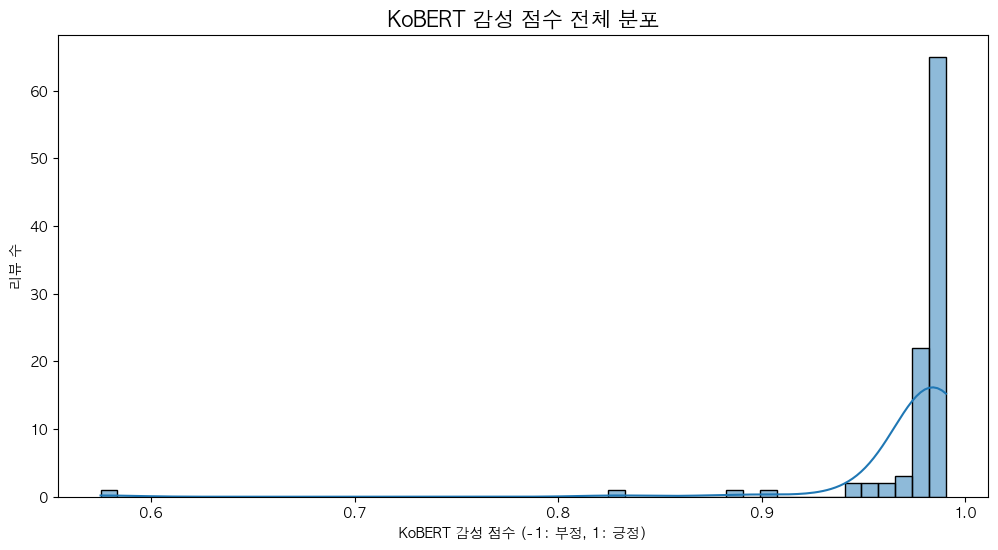

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic' # Mac ÏÇ¨Ïö©Ïûê
plt.figure(figsize=(12, 6))
sns.histplot(df_sample['KoELECTRA_Score'], bins=50, kde=True)
plt.title('KoBERT Í∞êÏÑ± Ï†êÏàò Ï†ÑÏ≤¥ Î∂ÑÌè¨', size=15)
plt.xlabel('KoBERT Í∞êÏÑ± Ï†êÏàò (-1: Î∂ÄÏ†ï, 1: Í∏çÏ†ï)')
plt.ylabel('Î¶¨Î∑∞ Ïàò')
plt.show()

In [26]:
# CODE CELL (Í∏çÏ†ï/Î∂ÄÏ†ï Ïù¥ÏßÑ ÎùºÎ≤®ÎßÅ)
import pandas as pd
import ast

# 1. Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Í≥† 'Review_final' Ïª¨ÎüºÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
df = pd.read_csv("gachon_reviews_preprocessed.csv")
if isinstance(df['Review_final'].iloc[0], str):
    df['Review_final'] = df['Review_final'].apply(ast.literal_eval)

# 2. Í∏çÏ†ï/Î∂ÄÏ†ï Îã®Ïñ¥ ÏÇ¨Ï†ÑÏùÑ Ï†ïÏùòÌï©ÎãàÎã§. (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
positive_words = [
    'ÎßõÏßë', 'Ï¢ãÏïÑÌïò', 'Í∞ÄÏÑ±ÎπÑ', 'ÏπúÏ†à', 'Í∞êÏÇ¨', 'ÎßåÏ°±', 'Ï∂îÏ≤ú', 'ÍπîÎÅî', 
    'Ìé∏Ìïò', 'Ïã†ÏÑ†Ìïò', 'Ìë∏ÏßêÌïò', 'ÎßõÎÇò', 'ÌñâÎ≥µ', 'ÏµúÍ≥†', 'Ïù∏ÏÉù', 'Í∏∞Î∂Ñ', 'Î∞©Î¨∏', 'Í∏çÏ†ï',
    'ÏÑúÎπÑÏä§', 'Îã§Ïñë', 'Ï†ÄÎ†¥Ìïò','Î≤àÏ∞Ω','Îã®Í≥®', 'Ï≤≠Í≤∞', 'ÏòàÏÅò', 'Ï∞©Ìïò', 'ÎßõÏûà', 'Ï¢ãÏïò'
]
negative_words = [
    'ÏïÑÏâΩ', 'ÏïÑÏâ¨ÏõÄ', 'ÎäêÎÅºÌïò', 'Î≥ÑÎ°ú', 'Ïã§Îßù', 'ÎÉÑÏÉà', 'Í∏∞Îã§Î¶¨', 'ÏãúÎÅÑÎüΩ',
    'Î∂àÏπúÏ†à', 'ÎπÑÏã∏', 'Î∂ÄÏ†ï','Î∂ÄÎã¥', 'Ïù¥ÏÉÅ', 'ÎßõÏóÜ'
]

# --- ‚ú®‚ú®‚ú® Ïó¨Í∏∞Í∞Ä ÏÑúÏòÅÎãòÏùò ÏöîÏ≤≠Ïù¥ Î∞òÏòÅÎêú ÌïµÏã¨ ÏàòÏ†ï Î∂ÄÎ∂Ñ! ‚ú®‚ú®‚ú® ---
# 3. Ïò§ÏßÅ 'Í∏çÏ†ï', 'Î∂ÄÏ†ï', 'Ï§ëÎ¶Ω'Îßå ÌåêÎã®ÌïòÎäî Í∞ÑÎã®Ìïú ÏûêÎèô ÎùºÎ≤®ÎßÅ Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
def simple_auto_labeler(word_list):
    # Í∏çÏ†ï/Î∂ÄÏ†ï Îã®Ïñ¥Ïùò 'Í∞úÏàò'Î•º ÏÖâÎãàÎã§.
    pos_count = sum(1 for word in word_list if word in positive_words)
    neg_count = sum(1 for word in word_list if word in negative_words)
    
    # Í∑úÏπôÏóê Îî∞Îùº 'Í∏çÏ†ï', 'Î∂ÄÏ†ï', 'Ï§ëÎ¶Ω' Ï§ë ÌïòÎÇòÎßå Î∞òÌôòÌï©ÎãàÎã§.
    if pos_count > neg_count:
        return 'Í∏çÏ†ï'
    elif neg_count > pos_count:
        return 'Î∂ÄÏ†ï'
    else: # ÎëòÏùò Í∞úÏàòÍ∞Ä Í∞ôÍ±∞ÎÇò, Îëò Îã§ 0Í∞úÏù¥Î©¥ 'Ï§ëÎ¶Ω'
        return 'Ï§ëÎ¶Ω'

# 4. 'Auto_Labels' Ïª¨ÎüºÏùÑ ÏÉàÎ°úÏö¥ Ìï®ÏàòÎ°ú Îã§Ïãú ÎßåÎì≠ÎãàÎã§.
df['Auto_Labels'] = df['Review_final'].apply(simple_auto_labeler)
# ----------------------------------------------------------------

# 5. 'Ï§ëÎ¶Ω'ÏúºÎ°ú Î∂ÑÎ•òÎêú Î¶¨Î∑∞Îäî ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï†úÏô∏ÌïòÏó¨, Í∏çÏ†ï/Î∂ÄÏ†ïÏùò ÌäπÏßïÏùÑ Îçî Î™ÖÌôïÌïòÍ≤å ÌïôÏäµÏãúÌÇµÎãàÎã§.
ft_df = df[df['Auto_Labels'] != 'Ï§ëÎ¶Ω'].copy()

print("--------- ÏÉàÎ°úÏö¥ ÎùºÎ≤®ÎßÅ Í≤∞Í≥º (ÏÉÅÏúÑ 10Í∞ú) ---------")
print(ft_df[['Review', 'Auto_Labels']].head(10))

print("\n--------- ÏµúÏ¢Ö ÎùºÎ≤® Î∂ÑÌè¨ ÌôïÏù∏ ---------")
print(ft_df['Auto_Labels'].value_counts())

--------- ÏÉàÎ°úÏö¥ ÎùºÎ≤®ÎßÅ Í≤∞Í≥º (ÏÉÅÏúÑ 10Í∞ú) ---------
                                              Review Auto_Labels
0  ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà...          Í∏çÏ†ï
1   Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã          Í∏çÏ†ï
2  Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ...          Í∏çÏ†ï
3  ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑ...          Í∏çÏ†ï
4                ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî          Í∏çÏ†ï
5  Ìöå Îï°Í≤®ÏÑú Î®πÏúºÎü¨ Í∞îÎäîÎç∞ ÌöåÍ∞Ä ÏóÑÏ≤≠ Ïã†ÏÑ†ÌïòÍ≥† Îã§Î•∏ Î©îÎâ¥ÎèÑ ÌïòÎÇòÍ∞ôÏù¥ Îã§ ÎßõÏûàÏóàÏñ¥Ïö© !...          Í∏çÏ†ï
6  ÏôÄ Ïó¨Í∏∞ Ìöå ÏôúÏù¥Î†áÍ≤å ÎßõÏûàÏñ¥Ïö©?!üëçüè

In [30]:
ft_df

Restaurant     Nickname  \
0              ÌöåÏä§Ïãú        JREVE   
1              ÌöåÏä§Ïãú  xmdnlxl2666   
2              ÌöåÏä§Ïãú  asdfasdfa72   
3              ÌöåÏä§Ïãú      jsm****   
4              ÌöåÏä§Ïãú         ÏûâÎî©11   
...            ...          ...   
18865  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê        ÌÉ±Í∏ÄÏù¥83   
18866  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê    jms317897   
18867  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê           ÏÖòÏû•   
18868  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê      h10****   
18869  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê       hh****   

                                                  Review       Date  \
0      ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà...     8.19.Ìôî   
1       Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã     8.25.Ïõî   
2      Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ...      7.9.Ïàò   
3      ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑ...      8.9.ÌÜ†   
4                    ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî     8.21.Î™©   
...                                                  ...        ...   
18865  Ï∞®ÎèåÎ∞•Ïù¥Îûë Ï§ëÍµ≠ÎÉâÎ©¥ ÏãúÏº∞ÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥Ïöî!\nÎã§ÏùåÏóêÎèÑ ÏßÄÏù∏Îì§Ïù¥Îûë Î∞©Î¨∏ÌïòÍ≤åÎêòÎäî ÎßõÏù¥ÎÑ§Ïöî~  24.8.16.Í∏à   
18866                                               ÎßõÏûàÎã§!  24.8.17.ÌÜ†   
18867                                            ÎßõÏûàÏñ¥Ïöî~~~  24.8.17.ÌÜ†   
18868                                             Ïó¨Í∏∞ ÎßõÏßëÏûÑ  24.7.27.ÌÜ†   
18869                                           ÎßõÏûàÍ≥† ÏπúÏ†àÌï¥Ïöî  24.10.3.Î™©   

       Revisit_Count  Reviewer_Review_Count  Reviewer_Photo_Count  \
0                  1                    221                    11   
1                  1                     16                     8   
2                  1                     76                    21   
3                  1                     12                     4   
4                  1                     78                    16   
...              ...                    ...                   ...   
18865              2                    131                     2   
18866              1                     15                    12   
18867              1                     15                    17   
18868              1                      7                     5   
18869              1                    957                    19   

                                          Review_cleaned  \
0      ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî ÏÉàÏö∞ÌäÄÍπÄ...   
1          Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§ÏöîÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§Í∏çÏ†ï   
2      Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ÏÜåÎ¨∏...   
3      ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑÏ≤≠ ...   
4                    ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî   
...                                                  ...   
18865      Ï∞®ÎèåÎ∞•Ïù¥Îûë Ï§ëÍµ≠ÎÉâÎ©¥ ÏãúÏº∞ÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥ÏöîÎã§ÏùåÏóêÎèÑ ÏßÄÏù∏Îì§Ïù¥Îûë Î∞©Î¨∏ÌïòÍ≤åÎêòÎäî ÎßõÏù¥ÎÑ§Ïöî   
18866                                                ÎßõÏûàÎã§   
18867                                               ÎßõÏûàÏñ¥Ïöî   
18868                                             Ïó¨Í∏∞ ÎßõÏßëÏûÑ   
18869                                           ÎßõÏûàÍ≥† ÏπúÏ†àÌï¥Ïöî   

                                              POS_tagged  \
0      [('ÏπúÍµ¨', 'NNG'), ('Îûë', 'JKB'), ('

In [32]:
df.to_csv('gachon_reviews_final.csv', index=False, encoding='utf-8-sig')

### koElectra ÌååÏù∏ÌäúÎãù ÌïòÍ∏∞

In [111]:
df=pd.read_csv('gachon_reviews_final.csv') ### koelectra
df

Restaurant     Nickname  \
0              ÌöåÏä§Ïãú        JREVE   
1              ÌöåÏä§Ïãú  xmdnlxl2666   
2              ÌöåÏä§Ïãú  asdfasdfa72   
3              ÌöåÏä§Ïãú      jsm****   
4              ÌöåÏä§Ïãú         ÏûâÎî©11   
...            ...          ...   
18865  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê        ÌÉ±Í∏ÄÏù¥83   
18866  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê    jms317897   
18867  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê           ÏÖòÏû•   
18868  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê      h10****   
18869  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê       hh****   

                                                  Review       Date  \
0      ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà...     8.19.Ìôî   
1       Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã     8.25.Ïõî   
2      Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ...      7.9.Ïàò   
3      ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑ...      8.9.ÌÜ†   
4                    ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî     8.21.Î™©   
...                                                  ...        ...   
18865  Ï∞®ÎèåÎ∞•Ïù¥Îûë Ï§ëÍµ≠ÎÉâÎ©¥ ÏãúÏº∞ÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥Ïöî!\nÎã§ÏùåÏóêÎèÑ ÏßÄÏù∏Îì§Ïù¥Îûë Î∞©Î¨∏ÌïòÍ≤åÎêòÎäî ÎßõÏù¥ÎÑ§Ïöî~  24.8.16.Í∏à   
18866                                               ÎßõÏûàÎã§!  24.8.17.ÌÜ†   
18867                                            ÎßõÏûàÏñ¥Ïöî~~~  24.8.17.ÌÜ†   
18868                                             Ïó¨Í∏∞ ÎßõÏßëÏûÑ  24.7.27.ÌÜ†   
18869                                           ÎßõÏûàÍ≥† ÏπúÏ†àÌï¥Ïöî  24.10.3.Î™©   

       Revisit_Count  Reviewer_Review_Count  Reviewer_Photo_Count  \
0                  1                    221                    11   
1                  1                     16                     8   
2                  1                     76                    21   
3                  1                     12                     4   
4                  1                     78                    16   
...              ...                    ...                   ...   
18865              2                    131                     2   
18866              1                     15                    12   
18867              1                     15                    17   
18868              1                      7                     5   
18869              1                    957                    19   

                                          Review_cleaned  \
0      ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî ÏÉàÏö∞ÌäÄÍπÄ...   
1          Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§ÏöîÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§Í∏çÏ†ï   
2      Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ÏÜåÎ¨∏...   
3      ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Îß§Ïö¥ÌÉïÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÏãúÏõêÌïòÍ≥† Î¨¥ÏóáÎ≥¥Îã§ ÌöåÍ∞Ä Ïã†ÏÑ†Ìï¥ÏÑú ÏóÑÏ≤≠ ...   
4                    ÎÇ®ÏûêÏπúÍµ¨Îûë ÌöåÎ®πÍ≥†ÏôîÎäîÎç∞ Ìë∏ÏßêÌïòÍ≥† ÏÑúÎπÑÏä§ÎèÑ Ï£ºÏãúÍ≥† Îã§ÏùåÏóê ÎòêÍ∞àÍ≤åÏöî   
...                                                  ...   
18865      Ï∞®ÎèåÎ∞•Ïù¥Îûë Ï§ëÍµ≠ÎÉâÎ©¥ ÏãúÏº∞ÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥ÏöîÎã§ÏùåÏóêÎèÑ ÏßÄÏù∏Îì§Ïù¥Îûë Î∞©Î¨∏ÌïòÍ≤åÎêòÎäî ÎßõÏù¥ÎÑ§Ïöî   
18866                                                ÎßõÏûàÎã§   
18867                                               ÎßõÏûàÏñ¥Ïöî   
18868                                             Ïó¨Í∏∞ ÎßõÏßëÏûÑ   
18869                                           ÎßõÏûàÍ≥† ÏπúÏ†àÌï¥Ïöî   

                                              POS_tagged  \
0      [('ÏπúÍµ¨', 'NNG'), ('Îûë', 'JKB'), ('

In [113]:

# CODE CELL 1: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Ï¶ùÍ∞ï
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from googletrans import Translator
import time

# ... (df ÎßåÎìúÎäî ÏΩîÎìúÎäî Ïù¥Ï†ÑÍ≥º ÎèôÏùº) ...
ft_df = df[df['Auto_Labels'] != 'Ï§ëÎ¶Ω'].copy()
ft_df.rename(columns={'Auto_Labels': 'label'}, inplace=True)




# --- ‚ú®‚ú®‚ú® Ïó¨Í∏∞Í∞Ä ÏÉàÎ°úÏö¥ Î∂ÄÎ∂Ñ! (Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï) ‚ú®‚ú®‚ú® ---
# 2. 'Î∂ÄÏ†ï' Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Îßå Îî∞Î°ú Ï∂îÏ∂úÌï©ÎãàÎã§.
df_negative = ft_df[ft_df['label'] == 'Î∂ÄÏ†ï'].copy()
print(f"ÏõêÎ≥∏ Î∂ÄÏ†ï Î¶¨Î∑∞ Ïàò: {len(df_negative)}")

# 3. Ïó≠Î≤àÏó≠ÏùÑ ÏúÑÌïú Î≤àÏó≠Í∏∞ Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
translator = Translator()

# 4. Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏Î•º ÎßåÎì≠ÎãàÎã§.
augmented_texts = []
for text in df_negative['Review']:
    try:
        # ÌïúÍµ≠Ïñ¥ -> ÏòÅÏñ¥ -> ÌïúÍµ≠Ïñ¥
        translated_en = translator.translate(text, src='ko', dest='en').text
        time.sleep(1) # API Í≥ºÎ∂ÄÌïò Î∞©ÏßÄÎ•º ÏúÑÌïú ÏßßÏùÄ ÎåÄÍ∏∞
        back_translated_ko = translator.translate(translated_en, src='en', dest='ko').text
        
        # ÏõêÎ≥∏Í≥º ÏïΩÍ∞ÑÏù¥ÎùºÎèÑ Îã§Î•∏ Í≤ΩÏö∞ÏóêÎßå Ï∂îÍ∞Ä (ÏôÑÏ†ÑÌûà ÎòëÍ∞ôÏù¥ Î≤àÏó≠ÎêòÎäî Í≤ΩÏö∞ Ï†úÏô∏)
        if text != back_translated_ko:
            augmented_texts.append({
                'sentence': back_translated_ko, 
                'label': 'Î∂ÄÏ†ï' # ÎùºÎ≤®ÏùÄ ÎãπÏó∞Ìûà 'Î∂ÄÏ†ï'
            })
    except Exception as e:
        print(f"Î≤àÏó≠ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
        continue

# 5. Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏÉàÎ°úÏö¥ DataFrameÏúºÎ°ú ÎßåÎì≠ÎãàÎã§.
df_augmented = pd.DataFrame(augmented_texts)
print(f"ÏÉàÎ°≠Í≤å Ï¶ùÍ∞ïÎêú Î∂ÄÏ†ï Î¶¨Î∑∞ Ïàò: {len(df_augmented)}")

# 6. ÏõêÎûòÏùò ft_dfÏóê Ï¶ùÍ∞ïÎêú Î∂ÄÏ†ï Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ïπ©ÎãàÎã§.
ft_df_augmented = pd.concat([ft_df, df_augmented], ignore_index=True)
print(f"ÏµúÏ¢Ö ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïàò: {len(ft_df_augmented)}")
print("\nÏµúÏ¢Ö ÎùºÎ≤® Î∂ÑÌè¨:")
print(ft_df_augmented['label'].value_counts())

# 7. 'ft_df'Í∞Ä ÏïÑÎãå, 'ft_df_augmented'Ïóê label_idÎ•º ÎßåÎì≠ÎãàÎã§.
label_to_id = {'Í∏çÏ†ï': 1, 'Î∂ÄÏ†ï': 0}
ft_df_augmented['label_id'] = ft_df_augmented['label'].map(label_to_id)

# 8. 'ft_df'Í∞Ä ÏïÑÎãå, 'ft_df_augmented'Î•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨Ìï©ÎãàÎã§.
train_df, val_df = train_test_split(
    ft_df_augmented, 
    test_size=0.2, 
    random_state=42,
    stratify=ft_df_augmented['label_id'] )

# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎî©
MODEL_NAME = "jaehyeong/koelectra-base-v3-generalized-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

print("Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å!")
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïàò: {len(train_df)}, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ïàò: {len(val_df)}")

ÏõêÎ≥∏ Î∂ÄÏ†ï Î¶¨Î∑∞ Ïàò: 128
Î≤àÏó≠ Ï§ë Ïò§Î•ò Î∞úÏÉù: The read operation timed out
ÏÉàÎ°≠Í≤å Ï¶ùÍ∞ïÎêú Î∂ÄÏ†ï Î¶¨Î∑∞ Ïàò: 127
ÏµúÏ¢Ö ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïàò: 13666

ÏµúÏ¢Ö ÎùºÎ≤® Î∂ÑÌè¨:
label
Í∏çÏ†ï    13411
Î∂ÄÏ†ï      255
Name: count, dtype: int64
Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å!
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ïàò: 10932, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ïàò: 2734


In [31]:
### ÎÇ¥Ïùº Ìï¥Î≥¥ (1ÏãúÍ∞Ñ Í±∏Î¶º..)

# CODE CELL (ÏµúÏ¢Ö ÌïôÏäµ Ïã§Ìñâ)
import torch
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 1. Î™®Îç∏ Î°úÎî© (ÎèôÏùº)
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME, 
    num_labels=2, 
    ignore_mismatched_sizes=True
)

# --- ‚ú®‚ú®‚ú® Ïó¨Í∏∞Í∞Ä Ïù¥Î≤à Î¨∏Ï†úÏùò ÏµúÏ¢Ö Ìï¥Í≤∞Ï±Ö! ‚ú®‚ú®‚ú® ---
# 2. Dataset ÏÉùÏÑ± Ï†Ñ, Î™®Îì† Î¶¨Î∑∞Î•º ÌôïÏã§ÌïòÍ≤å Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
train_text_list = train_df['Review'].astype(str).tolist()
val_text_list = val_df['Review'].astype(str).tolist()

train_encodings = tokenizer(train_text_list, truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(val_text_list, truncation=True, padding=True, max_length=256)



class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, train_df['label_id'].tolist())
val_dataset = ReviewDataset(val_encodings, val_df['label_id'].tolist())

# 3. ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ (ÎèôÏùº)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['label_id']),
    y=train_df['label_id'].to_numpy()
)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# 4. Ïª§Ïä§ÌÖÄ Trainer Ï†ïÏùò (ÎèôÏùº)
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights_tensor.to(model.device))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# --- ‚ú®‚ú®‚ú® Ïó¨Í∏∞Í∞Ä ÏÉùÎûµÎêòÏóàÎçò Î∂ÄÎ∂Ñ! ‚ú®‚ú®‚ú® ---
# 5. ÌïôÏäµ Í∑úÏπôÏùÑ 'Ïã§Ï†ú Í∞í'ÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
training_args = TrainingArguments(
    output_dir='./results_weighted',      # ÌïôÏäµ Í≤∞Í≥º(Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏)Í∞Ä Ï†ÄÏû•Îê† Ìè¥Îçî
    num_train_epochs=3,                  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º 3Î≤à Î∞òÎ≥µÌï¥ÏÑú ÌïôÏäµ
    per_device_train_batch_size=16,      # Ìïú Î≤àÏóê 16Í∞úÏî© Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Î©∞ ÌïôÏäµ
    per_device_eval_batch_size=64,       # Í≤ÄÏ¶ù ÏãúÏóêÎäî 64Í∞úÏî©
    warmup_steps=500,                    # Ï¥àÍ∏∞ ÌïôÏäµÎ•†ÏùÑ ÏÑúÏÑúÌûà Ïò¨Î¶¨Îäî Íµ¨Í∞Ñ
    weight_decay=0.01,                   # Í≥ºÏ†ÅÌï© Î∞©ÏßÄÎ•º ÏúÑÌïú Í∞ÄÏ§ëÏπò Í∞êÏÜå
    logging_dir='./logs_weighted',       # ÌïôÏäµ Î°úÍ∑∏Í∞Ä Ï†ÄÏû•Îê† Ìè¥Îçî
    logging_steps=50,                    # 50Î≤à ÌïôÏäµÌï† ÎïåÎßàÎã§ Î°úÍ∑∏ Ï∂úÎ†•
    evaluation_strategy="epoch",         # Ìïú epochÎßàÎã§ ÏÑ±Îä• ÌèâÍ∞Ä
    save_strategy="epoch",               # Ìïú epochÎßàÎã§ Î™®Îç∏ Ï†ÄÏû•
    load_best_model_at_end=True,         # ÌïôÏäµ Ï¢ÖÎ£å ÌõÑ Í∞ÄÏû• ÏÑ±Îä• Ï¢ãÏïòÎçò Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¥
)

# 6. Ïª§Ïä§ÌÖÄ TrainerÎ•º 'Ïã§Ï†ú Í∞í'ÏúºÎ°ú ÏÉùÏÑ±Ìï©ÎãàÎã§.
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)
# ----------------------------------------------------

print("\nÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπòÍ∞Ä Ï†ÅÏö©Îêú ÌïôÏäµ ÌôòÍ≤Ω ÏÑ§Ï†ï ÏôÑÎ£å!")

# --- STEP 3: Î™®Îç∏ ÌååÏù∏ÌäúÎãù Ïã§Ìñâ ---
print("Î™®Îç∏ ÌååÏù∏ÌäúÎãùÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
trainer.train()
print("Î™®Îç∏ ÌååÏù∏ÌäúÎãù ÏôÑÎ£å!")

# ÏµúÏ¢Ö Î™®Îç∏ Ï†ÄÏû•
final_model_path = "./my_finetuned_gachon_model_weighted"
trainer.save_model(final_model_path)
tokenizer.save_pretrained(final_model_path)

print(f"\nüéâ ÌååÏù∏ÌäúÎãùÎêú Î™®Îç∏Ïù¥ '{final_model_path}' Ìè¥ÎçîÏóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!")

/opt/anaconda3/lib/python3.12/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(



ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπòÍ∞Ä Ï†ÅÏö©Îêú ÌïôÏäµ ÌôòÍ≤Ω ÏÑ§Ï†ï ÏôÑÎ£å!
Î™®Îç∏ ÌååÏù∏ÌäúÎãùÏùÑ ÏãúÏûëÌï©ÎãàÎã§...


Î™®Îç∏ ÌååÏù∏ÌäúÎãù ÏôÑÎ£å!

üéâ ÌååÏù∏ÌäúÎãùÎêú Î™®Îç∏Ïù¥ './my_finetuned_gachon_model_weighted' Ìè¥ÎçîÏóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!


In [438]:
# CODE CELL (Î™®Îç∏ ÏÑ±Îä• Í≤ÄÏ¶ù - ÏôÑÏ†ÑÏ≤¥)
import numpy as np
import torch
from sklearn.metrics import classification_report
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments


# (Ï§ëÏöî!) Ïù¥ ÏÖÄÏùÑ Ïã§ÌñâÌïòÍ∏∞ Ï†ÑÏóê, Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Îã¥ÏùÄ 'all_df'Í∞Ä Ï§ÄÎπÑÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.

# Í∏∞Ï°¥Ïóê ÎÇòÎâòÏñ¥ ÏûàÎçò ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú Ìï©Ïπ©ÎãàÎã§.
all_df = pd.concat([train_df, val_df], ignore_index=True)


print("--- ÍµêÏ∞® Í≤ÄÏ¶ù Í∏∞Î∞ò Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏãúÏûë ---")

# --- 1. Î≤àÏó≠ ÏÇ¨Ï†Ñ Î∞è Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¥ÎûòÏä§ Ï†ïÏùò ---
label_to_id = {'Í∏çÏ†ï': 1, 'Î∂ÄÏ†ï': 0}
id_to_label = {v: k for k, v in label_to_id.items()}

class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

# --- 2. K-Fold ÏÑ§Ï†ï ---
# 5-Fold ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Í∞Å Ìè¥ÎìúÏùò Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏Î•º ÎßåÎì≠ÎãàÎã§.
all_reports = []

# --- 3. ÍµêÏ∞® Í≤ÄÏ¶ù Î£®ÌîÑ ---
# all_dfÎ•º KFoldÏóê Ï†ÅÏö©ÌïòÏó¨ Ïù∏Îç±Ïä§Î•º ÎÇòÎàïÎãàÎã§.
for fold, (train_index, val_index) in enumerate(kf.split(all_df)):
    print(f"\n--- Ìè¥Îìú {fold+1}/{n_splits} ÏãúÏûë ---")
    
    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎàïÎãàÎã§.
    train_df = all_df.iloc[train_index]
    val_df = all_df.iloc[val_index]

    # Î™®Îç∏Í≥º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Îã§Ïãú Î∂àÎü¨ÏòµÎãàÎã§. (Í∞Å Ìè¥ÎìúÎßàÎã§ Ï¥àÍ∏∞ Î™®Îç∏Î°ú ÏãúÏûë)
    # Ïã§Ï†ú ÌôòÍ≤ΩÏóêÏÑúÎäî Îß§ Ìè¥ÎìúÎßàÎã§ Î™®Îç∏ÏùÑ Ï≤òÏùåÎ∂ÄÌÑ∞ ÌïôÏäµÏãúÌÇ§Í≥† ÌèâÍ∞ÄÌï¥Ïïº Îçî Ï†ïÌôïÌï©ÎãàÎã§.
    MODEL_PATH = "./my_finetuned_gachon_model_weighted"
    model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH)
    tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
    
    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º ÌÜ†ÌÅ∞ÌôîÌïòÍ≥† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎì≠ÎãàÎã§.
    val_encodings = tokenizer(val_df['Review'].astype(str).tolist(), truncation=True, padding=True, max_length=256)
    val_dataset = ReviewDataset(val_encodings, val_df['label_id'].tolist())

    # ÌèâÍ∞ÄÎ•º ÏúÑÌïú TrainerÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    training_args = TrainingArguments(output_dir=f'./results_eval_fold_{fold}', per_device_eval_batch_size=64)
    trainer = Trainer(model=model, args=training_args)
    
    # ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
    predictions, labels, _ = trainer.predict(val_dataset)
    y_pred = np.argmax(predictions, axis=1)
    y_true = val_df['label_id'].tolist()
    
    # ÏÑ±Îä• Î¶¨Ìè¨Ìä∏Î•º ÏÉùÏÑ±ÌïòÍ≥† Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞ÄÌï©ÎãàÎã§.
    report = classification_report(y_true, y_pred, output_dict=True, target_names=[id_to_label[i] for i in sorted(id_to_label.keys())])
    all_reports.append(report)
    print(classification_report(y_true, y_pred, target_names=[id_to_label[i] for i in sorted(id_to_label.keys())]))

### 4. ÏµúÏ¢Ö ÍµêÏ∞® Í≤ÄÏ¶ù ÌèâÍ∑† ÏÑ±Îä• Í≥ÑÏÇ∞ (ÏàòÏ†ïÎêú ÏΩîÎìú)

print("\n--- Î™®Îì† Ìè¥ÎìúÏóê ÎåÄÌïú ÌèâÍ∑† ÏÑ±Îä• Î¶¨Ìè¨Ìä∏ ---")

# Í∞Å Ìè¥ÎìúÏùò Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏Î•º Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
macro_f1_scores = []
weighted_f1_scores = []
accuracies = []

# Î™®Îì† Ìè¥ÎìúÏùò Í≤∞Í≥ºÎ•º Î∞òÎ≥µÌïòÏó¨ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞ÄÌï©ÎãàÎã§.
for report in all_reports:
    macro_f1_scores.append(report['macro avg']['f1-score'])
    weighted_f1_scores.append(report['weighted avg']['f1-score'])
    accuracies.append(report['accuracy'])

# ÏµúÏ¢Ö ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† Ï∂úÎ†•Ìï©ÎãàÎã§.
print(f"ÌèâÍ∑† Accuracy: {np.mean(accuracies):.4f}")
print(f"ÌèâÍ∑† Macro F1-Score: {np.mean(macro_f1_scores):.4f}")
print(f"ÌèâÍ∑† Weighted F1-Score: {np.mean(weighted_f1_scores):.4f}")

print("\n--- ÍµêÏ∞® Í≤ÄÏ¶ù Í∏∞Î∞ò Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏôÑÎ£å ---")

--- ÍµêÏ∞® Í≤ÄÏ¶ù Í∏∞Î∞ò Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏãúÏûë ---

--- Ìè¥Îìú 1/5 ÏãúÏûë ---


              precision    recall  f1-score   support

          Î∂ÄÏ†ï       0.84      0.88      0.86        58
          Í∏çÏ†ï       1.00      1.00      1.00      2676

    accuracy                           0.99      2734
   macro avg       0.92      0.94      0.93      2734
weighted avg       0.99      0.99      0.99      2734


--- Ìè¥Îìú 2/5 ÏãúÏûë ---


              precision    recall  f1-score   support

          Î∂ÄÏ†ï       0.84      0.94      0.89        51
          Í∏çÏ†ï       1.00      1.00      1.00      2682

    accuracy                           1.00      2733
   macro avg       0.92      0.97      0.94      2733
weighted avg       1.00      1.00      1.00      2733


--- Ìè¥Îìú 3/5 ÏãúÏûë ---


              precision    recall  f1-score   support

          Î∂ÄÏ†ï       0.81      0.94      0.87        53
          Í∏çÏ†ï       1.00      1.00      1.00      2680

    accuracy                           0.99      2733
   macro avg       0.90      0.97      0.93      2733
weighted avg       1.00      0.99      0.99      2733


--- Ìè¥Îìú 4/5 ÏãúÏûë ---


              precision    recall  f1-score   support

          Î∂ÄÏ†ï       0.72      0.94      0.81        35
          Í∏çÏ†ï       1.00      1.00      1.00      2698

    accuracy                           0.99      2733
   macro avg       0.86      0.97      0.91      2733
weighted avg       1.00      0.99      0.99      2733


--- Ìè¥Îìú 5/5 ÏãúÏûë ---


              precision    recall  f1-score   support

          Î∂ÄÏ†ï       0.80      0.95      0.87        58
          Í∏çÏ†ï       1.00      0.99      1.00      2675

    accuracy                           0.99      2733
   macro avg       0.90      0.97      0.93      2733
weighted avg       0.99      0.99      0.99      2733


--- Î™®Îì† Ìè¥ÎìúÏóê ÎåÄÌïú ÌèâÍ∑† ÏÑ±Îä• Î¶¨Ìè¨Ìä∏ ---
ÌèâÍ∑† Accuracy: 0.9944
ÌèâÍ∑† Macro F1-Score: 0.9282
ÌèâÍ∑† Weighted F1-Score: 0.9946

--- ÍµêÏ∞® Í≤ÄÏ¶ù Í∏∞Î∞ò Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏôÑÎ£å ---


### ÏµúÏ¢Ö Î∂ÑÏÑù Î∞è Í≤∞Í≥º ÎèÑÏ∂ú Î°úÎìúÎßµ

In [33]:
# CODE CELL 1: ÌååÏù∏ÌäúÎãùÎêú Î™®Îç∏ Î°úÎìú
from transformers import pipeline
import pandas as pd

# (Ï§ëÏöî!) Ïù¥Ï†ÑÏóê Ï†ÄÏû•ÌñàÎçò Î™®Îç∏Ïùò Ï†ïÌôïÌïú Ìè¥Îçî Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌï©ÎãàÎã§.
MODEL_PATH = "./my_finetuned_gachon_model_weighted"

# Î™®Îç∏ÏùÑ Î°úÎìúÌïòÏó¨ Í∞êÏÑ± Î∂ÑÏÑù ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
sentiment_analyzer = pipeline("sentiment-analysis", model=MODEL_PATH)

print(f"'{MODEL_PATH}'ÏóêÏÑú ÌååÏù∏ÌäúÎãùÎêú Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


'./my_finetuned_gachon_model_weighted'ÏóêÏÑú ÌååÏù∏ÌäúÎãùÎêú Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!


In [35]:
# CODE CELL 2 (ÏàòÏ†ï Î≤ÑÏ†Ñ)

# (Ï§ëÏöî!) ÌååÏù∏ÌäúÎãù Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú ÏÉùÏÑ±Îêú id_to_labelÏùÑ Ïó¨Í∏∞ÏÑú Îã§Ïãú ÌôïÏù∏ÌïòÍ±∞ÎÇò Ï†ïÏùòÌï¥Ïïº Ìï©ÎãàÎã§.
# ÏòàÏãú: id_to_label = {0: 'Î∂ÄÏ†ï', 1: 'Í∏çÏ†ï'}
# ÎßåÏïΩ Í∏∞ÏñµÎÇòÏßÄ ÏïäÎäîÎã§Î©¥, Ïù¥Ï†Ñ ÏΩîÎìú ÏÖÄÏóêÏÑú labels, label_to_id, id_to_labelÏùÑ
# ÏÉùÏÑ±ÌïòÎäî Î∂ÄÎ∂ÑÏùÑ Îã§Ïãú Ïã§ÌñâÌï¥ÏÑú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.
# labels = ft_df['label'].unique().tolist()
# label_to_id = {'Í∏çÏ†ï': 1, 'Î∂ÄÏ†ï': 0} # Ïù¥ ÏàúÏÑúÍ∞Ä ÎßûÎäîÏßÄ ÌôïÏù∏!
id_to_label = {v: k for k, v in label_to_id.items()}


def predict_sentiment(text):
    # ÌååÏù¥ÌîÑÎùºÏù∏ÏùÄ [{'label': 'LABEL_1', 'score': 0.99}] ÏôÄ Í∞ôÏù¥ Î∞òÌôòÌï©ÎãàÎã§.
    # Ïó¨Í∏∞ÏÑú LABEL_1ÏùÄ Ïà´Ïûê 1ÏùÑ ÏùòÎØ∏ÌïòÎäî Î¨∏ÏûêÏó¥ÏûÖÎãàÎã§.
    result = sentiment_analyzer(text)[0]
    
    # Ïà´Ïûê ÌòïÌÉúÏùò Î†àÏù¥Î∏îÏùÑ Ï†ïÏàò(int)Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    label_id = int(result['label'].split('_')[-1])
    
    # 'id_to_label' Î≤àÏó≠ ÏÇ¨Ï†ÑÏùÑ Ïù¥Ïö©Ìï¥ ÏÇ¨ÎûåÏùò Ïñ∏Ïñ¥Î°ú Î∞îÍøâÎãàÎã§.
    label_text = id_to_label[label_id]
    score = result['score']
    
    return {'label': label_text, 'score': score}


test_review1 = "ÏùåÏãù ÎßõÏùÄ ÏßÑÏßú ÏµúÍ≥†Ïù∏Îç∞, Îß§Ïû•Ïù¥ ÎÑàÎ¨¥ ÏãúÎÅÑÎü¨ÏõåÏÑú Ï†ïÏã†Ïù¥ ÏóÜÏóàÏñ¥Ïöî."
test_review2 = "Í∞ÄÍ≤©Ïù¥ Ï¢Ä ÎπÑÏãº Í∞êÏù¥ ÏûàÏßÄÎßå, ÏßÅÏõêÎ∂ÑÏù¥ Ï†ïÎßê ÏπúÏ†àÌï¥ÏÑú ÎßåÏ°±Ìï©ÎãàÎã§."
test_review3 = "Ïõ®Ïù¥ÌåÖÏù¥ Í∏∏Ïñ¥ÏÑú ÌûòÎì§ÏóàÏßÄÎßå Í∏∞Îã§Î¶∞ Î≥¥ÎûåÏù¥ ÏûàÎÑ§Ïöî. ÎßõÏûàÏñ¥Ïöî!"

result1 = predict_sentiment(test_review1)
result2 = predict_sentiment(test_review2)
result3 = predict_sentiment(test_review3)

print(f"'{test_review1}' -> Í≤∞Í≥º: {result1}")
print(f"'{test_review2}' -> Í≤∞Í≥º: {result2}")
print(f"'{test_review3}' -> Í≤∞Í≥º: {result3}")

'ÏùåÏãù ÎßõÏùÄ ÏßÑÏßú ÏµúÍ≥†Ïù∏Îç∞, Îß§Ïû•Ïù¥ ÎÑàÎ¨¥ ÏãúÎÅÑÎü¨ÏõåÏÑú Ï†ïÏã†Ïù¥ ÏóÜÏóàÏñ¥Ïöî.' -> Í≤∞Í≥º: {'label': 'Î∂ÄÏ†ï', 'score': 0.9996134638786316}
'Í∞ÄÍ≤©Ïù¥ Ï¢Ä ÎπÑÏãº Í∞êÏù¥ ÏûàÏßÄÎßå, ÏßÅÏõêÎ∂ÑÏù¥ Ï†ïÎßê ÏπúÏ†àÌï¥ÏÑú ÎßåÏ°±Ìï©ÎãàÎã§.' -> Í≤∞Í≥º: {'label': 'Í∏çÏ†ï', 'score': 0.9990116357803345}
'Ïõ®Ïù¥ÌåÖÏù¥ Í∏∏Ïñ¥ÏÑú ÌûòÎì§ÏóàÏßÄÎßå Í∏∞Îã§Î¶∞ Î≥¥ÎûåÏù¥ ÏûàÎÑ§Ïöî. ÎßõÏûàÏñ¥Ïöî!' -> Í≤∞Í≥º: {'label': 'Í∏çÏ†ï', 'score': 0.9990184307098389}


"ÌååÏù∏ÌäúÎãùÎêú Î™®Îç∏ÏùÑ ÌÖåÏä§Ìä∏Ìïú Í≤∞Í≥º, 'ÎßõÏûàÎã§'ÏôÄ 'ÏπúÏ†àÌïòÎã§' Í∞ôÏùÄ Î™ÖÌôïÌïú Í∏çÏ†ï/Î∂ÄÏ†ï Î¨∏Ïû•ÏùÄ Ïûò Î∂ÑÎ•òÌñàÏßÄÎßå, 'Ïõ®Ïù¥ÌåÖÏù¥ Í∏∏Ïñ¥ÏÑú ÌûòÎì§ÏóàÏßÄÎßå Í∏∞Îã§Î¶∞ Î≥¥ÎûåÏù¥ ÏûàÎÑ§Ïöî. ÎßõÏûàÏñ¥Ïöî!' ÏôÄ Í∞ôÏù¥ Í∏çÏ†ïÍ≥º Î∂ÄÏ†ïÏù¥ ÌòºÏû¨Îêú Î¨∏Ïû•ÏóêÏÑúÎäî Î∂ÄÏ†ïÏ†ÅÏù∏ ÌÇ§ÏõåÎìú('Ïõ®Ïù¥ÌåÖ', 'ÌûòÎì§Îã§')Ïóê Í≥ºÎØºÌïòÍ≤å Î∞òÏùëÌïòÏó¨ Ï†ÑÏ≤¥ Î¨∏Îß•ÏùÑ ÏûòÎ™ª ÌåêÎã®ÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§."
"Ïù¥Îü¨Ìïú ÌòÑÏÉÅÏùò ÏõêÏù∏ÏùÄ, Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ Ï†ÅÏö©Ìïú Ïñ∏ÎçîÏÉòÌîåÎßÅÏúºÎ°ú Ïù∏Ìï¥, Î™®Îç∏Ïù¥ ÌïôÏäµÌïú Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÍ≥º Îã§ÏñëÏÑ±Ïù¥ Ï†àÎåÄÏ†ÅÏúºÎ°ú Î∂ÄÏ°±ÌñàÍ∏∞ ÎïåÎ¨∏Ïù¥ÎùºÍ≥† Î∂ÑÏÑùÌñàÏäµÎãàÎã§."


In [37]:
### ÏµúÏ¢Ö Í∞êÏ†ï Ï†êÏàò Í≥ÑÏÇ∞

In [39]:
# -----------------------------------------------------------------
# PART 0: ÌïÑÏöîÌïú Î™®Îì† ÎèÑÍµ¨(ÎùºÏù¥Î∏åÎü¨Î¶¨)Î•º Îß® ÏúÑÏóê Î∂àÎü¨ÏòµÎãàÎã§.
# -----------------------------------------------------------------
import pandas as pd
import torch
from transformers import pipeline
import time

# -----------------------------------------------------------------
# PART 1: Î™®Îç∏ Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# -----------------------------------------------------------------

# (Ï§ëÏöî!) ÌååÏù∏ÌäúÎãùÎêú Î™®Îç∏Ïù¥ Ï†ÄÏû•Îêú Ï†ïÌôïÌïú Ìè¥Îçî Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌï©ÎãàÎã§.
MODEL_PATH = "./my_finetuned_gachon_model_weighted"

# (Ï§ëÏöî!) 'Í∏çÏ†ï'/'Î∂ÄÏ†ï'Í≥º Ïà´Ïûê(0, 1)Î•º Ïó∞Í≤∞ÌïòÎäî 'Î≤àÏó≠ ÏÇ¨Ï†Ñ'ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
# ÌååÏù∏ÌäúÎãù STEP 1ÏóêÏÑú Ï†ïÏùòÌñàÎçò label_to_idÏôÄ ÏàúÏÑúÍ∞Ä Í∞ôÏïÑÏïº Ìï©ÎãàÎã§.
# label_to_id = {'Í∏çÏ†ï': 1, 'Î∂ÄÏ†ï': 0} Ïù¥ÏóàÏúºÎØÄÎ°ú, Í∑∏ Î∞òÎåÄÎäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
id_to_label = {1: 'Í∏çÏ†ï', 0: 'Î∂ÄÏ†ï'}

# 1. ÌååÏù∏ÌäúÎãùÎêú 'Ï†ÑÎ¨∏Í∞Ä Î™®Îç∏'ÏùÑ Î°úÎìúÌï©ÎãàÎã§.
print(f"'{MODEL_PATH}'ÏóêÏÑú ÌååÏù∏ÌäúÎãùÎêú Î™®Îç∏ Î°úÎî©ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
sentiment_analyzer = pipeline("sentiment-analysis", model=MODEL_PATH, device=0 if torch.cuda.is_available() else -1) # GPUÍ∞Ä ÏûàÏúºÎ©¥ ÏÇ¨Ïö©
print("Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!")

# 2. Î™®Îì† Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Í∞Ä Ìè¨Ìï®Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
# (ÌååÏùº Ïù¥Î¶ÑÏùÄ ÏÑúÏòÅÎãòÏù¥ Ï†ÄÏû•ÌïòÏã† ÌååÏùºÎ™ÖÏúºÎ°ú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî)
df = pd.read_csv("gachon_reviews_preprocessed.csv")

# -----------------------------------------------------------------
# PART 2: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞
# -----------------------------------------------------------------

# 3. Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞êÏÑ± Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
def get_finetuned_sentiment(text):
    # ÎÑàÎ¨¥ Í∏¥ Î¶¨Î∑∞Îäî Î™®Îç∏ Ï≤òÎ¶¨ ÌïúÍ≥Ñ(Î≥¥ÌÜµ 512Ïûê)Ïóê ÎßûÏ∂∞ ÏûòÎùºÏ§çÎãàÎã§.
    text = str(text)[:512]
    try:
        # Î™®Îç∏ ÏòàÏ∏° Ïã§Ìñâ
        result = sentiment_analyzer(text)[0]
        # Í≤∞Í≥º ÏòàÏãú: {'label': 'LABEL_1', 'score': 0.99}
        
        # Ïà´Ïûê ÎùºÎ≤®(e.g., '1')ÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§.
        label_id = int(result['label'].split('_')[-1])
        # Î≤àÏó≠ ÏÇ¨Ï†ÑÏùÑ Ïù¥Ïö©Ìï¥ 'Í∏çÏ†ï' ÎòêÎäî 'Î∂ÄÏ†ï'ÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
        label_text = id_to_label[label_id]
        
        score = result['score']
        
        # 'Í∏çÏ†ï'Ïù¥Î©¥ score Í∑∏ÎåÄÎ°ú, 'Î∂ÄÏ†ï'Ïù¥Î©¥ -scoreÎ•º Î∞òÌôòÌï©ÎãàÎã§.
        return score if label_text == 'Í∏çÏ†ï' else -score
    except Exception:
        return 0 # Ïò§Î•ò Î∞úÏÉù Ïãú 0Ï†ê (Ï§ëÎ¶Ω)ÏúºÎ°ú Ï≤òÎ¶¨

# (Í≤ΩÍ≥†!) Ïù¥ ÏΩîÎìúÎäî Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎØÄÎ°ú, ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§!
# ÏïΩ 18,000Í∞úÏùò Î¶¨Î∑∞ÎùºÎ©¥, CPU ÌôòÍ≤ΩÏóêÏÑú 30Î∂Ñ~2ÏãúÍ∞Ñ Ïù¥ÏÉÅ ÏÜåÏöîÎê† Ïàò ÏûàÏäµÎãàÎã§.
print(f"\nÏ¥ù {len(df)}Í∞úÏùò Î¶¨Î∑∞Ïóê ÎåÄÌïú ÏµúÏ¢Ö Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")

# 4. 'Review' ÏõêÎ≥∏ Ïª¨ÎüºÏóê Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨, 'Finetuned_Score' Ïª¨ÎüºÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
df['Finetuned_Score'] = df['Review'].apply(get_finetuned_sentiment)

print("Î™®Îì† Î¶¨Î∑∞Ïùò Ï†êÏàò Í≥ÑÏÇ∞Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")

# -----------------------------------------------------------------
# PART 3: ÏµúÏ¢Ö Í≤∞Í≥º Ï†ÄÏû•
# -----------------------------------------------------------------

# 5. Î™®Îì† Ï†êÏàòÍ∞Ä Ìè¨Ìï®Îêú ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏÉàÎ°úÏö¥ CSV ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.
now = time.strftime('%Y%m%d_%H%M%S')
filename = f"gachon_reviews_with_final_scores_{now}.csv"
df.to_csv(filename, index=False, encoding='utf-8-sig')

print(f"\nüéâ ÏµúÏ¢Ö Í≤∞Í≥ºÍ∞Ä '{filename}' ÌååÏùºÏóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!")

# 6. Í≤∞Í≥º ÏÉòÌîåÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
print("\n--------- ÏµúÏ¢Ö Ï†êÏàò Í≥ÑÏÇ∞ Í≤∞Í≥º (ÏÉÅÏúÑ 20Í∞ú) ---------")
print(df[['Review', 'Finetuned_Score']].head(20))

'./my_finetuned_gachon_model_weighted'ÏóêÏÑú ÌååÏù∏ÌäúÎãùÎêú Î™®Îç∏ Î°úÎî©ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
Î™®Îç∏ Î°úÎî© ÏôÑÎ£å!

Ï¥ù 18870Í∞úÏùò Î¶¨Î∑∞Ïóê ÎåÄÌïú ÏµúÏ¢Ö Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
Î™®Îì† Î¶¨Î∑∞Ïùò Ï†êÏàò Í≥ÑÏÇ∞Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!

üéâ ÏµúÏ¢Ö Í≤∞Í≥ºÍ∞Ä 'gachon_reviews_with_final_scores_20250911_174011.csv' ÌååÏùºÏóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!

--------- ÏµúÏ¢Ö Ï†êÏàò Í≥ÑÏÇ∞ Í≤∞Í≥º (ÏÉÅÏúÑ 20Í∞ú) ---------
                                               Review  Finetuned_Score
0   ÏπúÍµ¨Îûë Ïò§ÎûúÎßåÏóê ÌöåÎ®πÏúºÎü¨ Í∞îÎäîÎç∞ ÏòàÏïΩÏóÜÏù¥ Í∑∏ÎÉâ ÏßÄÎÇòÎã§ Îì§Ïñ¥Í∞ÑÍ±¥Îç∞ ÎßõÏßëÏù¥ÎÑ§Ïöî!„Öé„Öé ÏÉà...         0.998949
1    Î©çÍ≤åÏ¢ãÏïÑÌïòÎäîÎç∞ ÏóÑÏ≤≠Ïã†ÏÑ†ÌïòÍ≥† ÎßõÏûàÎÑ§Ïöî!!\nÏÉàÏö∞ÌäÄÍπÄÍ≥† Î∞îÏÇ≠ÌïòÍ≤å Ïûò ÌäÄÍ≤®Ï†∏ÏÑú ÏûòÎ®πÏóáÏäµÎãàÎã§üòã         0.998998
2   Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî„Öé„Öé Ïù¥ÎØ∏ Ï£ºÎ≥ÄÏóêÏÑú ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Í∞ÄÏÑ±ÎπÑÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÎã§Í≥† ...         0.999015
3   ÏÑ∏Ìä∏ Íµ¨ÏÑ±ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî ! Îß§Ïö¥ÌÉ

In [61]:
df = pd.read_csv('gachon_reviews_with_final_scores.csv')

In [105]:
df
# df.to_csv('gachon_restaurant_koelectra_summary.csv', index=False, encoding='utf-8-sig')

In [95]:

# 1. Finetuned_ScoreÎ•º Í∏∞Ï§ÄÏúºÎ°ú 'Í∏çÏ†ï' / 'Î∂ÄÏ†ï' ÎùºÎ≤®ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
#    - Ï†êÏàòÍ∞Ä 0Î≥¥Îã§ ÌÅ¨Î©¥ 'Í∏çÏ†ï', ÏûëÍ±∞ÎÇò Í∞ôÏúºÎ©¥ 'Î∂ÄÏ†ï'ÏúºÎ°ú Î∂ÑÎ•òÌï©ÎãàÎã§.
df['Sentiment_Label'] = df['Finetuned_Score'].apply(lambda score: 'Í∏çÏ†ï' if score > 0 else 'Î∂ÄÏ†ï')

print("--------- ÏµúÏ¢Ö Í∞êÏÑ± ÎùºÎ≤® Î∂ÑÌè¨ ---------")
print(df['Sentiment_Label'].value_counts())


# 2. 'Í∏çÏ†ï' Í∑∏Î£πÍ≥º 'Î∂ÄÏ†ï' Í∑∏Î£πÏùÑ Î≥ÑÎèÑÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§.
positive_df = df[df['Sentiment_Label'] == 'Í∏çÏ†ï'].copy()
negative_df = df[df['Sentiment_Label'] == 'Î∂ÄÏ†ï'].copy()

print(f"\nÏ¥ù {len(positive_df)}Í∞úÏùò Í∏çÏ†ï Î¶¨Î∑∞ÏôÄ {len(negative_df)}Í∞úÏùò Î∂ÄÏ†ï Î¶¨Î∑∞Î°ú Î∂ÑÎ¶¨ÎêòÏóàÏäµÎãàÎã§.")

# -----------------------------------------------------------------
# PART 3: Í∑∏Î£πÎ≥Ñ Ïã¨Ï∏µ Î∂ÑÏÑù
# -----------------------------------------------------------------

# 3. 'Î∂ÄÏ†ï' Î¶¨Î∑∞Í∞Ä Í∞ÄÏû• ÎßéÏù¥ ÎÇòÌÉÄÎÇú ÏãùÎãπ TOP 10ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
#    - Ïù¥Î•º ÌÜµÌï¥ Ïñ¥Îñ§ ÏãùÎãπÏù¥ Í∞úÏÑ†Ï†êÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÏßÄ ÌååÏïÖÌï† Ïàò ÏûàÏäµÎãàÎã§.
print("\n--------- 'Î∂ÄÏ†ï' Î¶¨Î∑∞Í∞Ä ÎßéÏùÄ ÏãùÎãπ TOP 10 ---------")
negative_restaurant_counts = negative_df['Restaurant'].value_counts()
print(negative_restaurant_counts.head(10))


# 4. 'Î∂ÄÏ†ï' Î¶¨Î∑∞Ïùò Ïã§Ï†ú ÎÇ¥Ïö©ÏùÑ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.
#    - Ï†êÏàòÍ∞Ä Í∞ÄÏû• ÎÇÆÏùÄ (Í∞ÄÏû• Î∂ÄÏ†ïÏ†ÅÏù∏) Î¶¨Î∑∞ 5Í∞úÎ•º Ï∂úÎ†•ÌïòÏó¨, Í≥†Í∞ùÎì§Ïù¥ Ïñ¥Îñ§ Ï†êÏóê ÎåÄÌï¥ Í∞ïÌïòÍ≤å Î∂àÎßåÏùÑ ÎäêÎÅºÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
print("\n--------- Í∞ÄÏû• Î∂ÄÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞ TOP 5 ---------")
# sort_values()Î•º Ïù¥Ïö©Ìï¥ Ï†êÏàòÍ∞Ä ÎÇÆÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÍ≥†, 'Review' Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
# .valuesÎ•º Î∂ôÏù¥Î©¥ Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú ÍπîÎÅîÌïòÍ≤å Î≥º Ïàò ÏûàÏäµÎãàÎã§.
most_negative_reviews = df.sort_values(by='Finetuned_Score').head(5)['Review'].values

for i, review in enumerate(most_negative_reviews):
    print(f"[{i+1}] {review.replace('\n', ' ')}") # Ï§ÑÎ∞îÍøàÏùÑ Í≥µÎ∞±ÏúºÎ°ú Î∞îÍøîÏÑú Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†•




--------- ÏµúÏ¢Ö Í∞êÏÑ± ÎùºÎ≤® Î∂ÑÌè¨ ---------
Sentiment_Label
Í∏çÏ†ï    18198
Î∂ÄÏ†ï      672
Name: count, dtype: int64

Ï¥ù 18198Í∞úÏùò Í∏çÏ†ï Î¶¨Î∑∞ÏôÄ 672Í∞úÏùò Î∂ÄÏ†ï Î¶¨Î∑∞Î°ú Î∂ÑÎ¶¨ÎêòÏóàÏäµÎãàÎã§.

--------- 'Î∂ÄÏ†ï' Î¶¨Î∑∞Í∞Ä ÎßéÏùÄ ÏãùÎãπ TOP 10 ---------
Restaurant
ÌååÏä§Ïø†Ï∞å Í∞ÄÏ≤úÎåÄÏ†ê        25
Ïù∏ÏÉùÍ∑πÏû•Ï™ΩÍ∞àÎπÑ ÏÑ±ÎÇ®Ï†ê      24
Í≥†Í∏∞Î°ú ÌïúÎÅº           24
Í≥µÏ∞® Í∞ÄÏ≤úÎåÄÏ†ê          23
ÎèÑÎØ∏ÎÖ∏ÌîºÏûê ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê      23
Ïª¥Ìè¨Ï¶àÏª§Ìîº Í∞ÄÏ≤úÎåÄÌïôÏ†ê      23
ÌôîÎ°úÏÉÅÌöå ÏÑ±ÎÇ®Î≥µÏ†ïÏ†ê       21
Ïù¥ÏÇ≠ÌÜ†Ïä§Ìä∏ Í∞ÄÏ≤úÎåÄÏ†ê       20
ÌååÎ¶¨Î∞îÍ≤åÎú® ÌÉúÌèâÏò§Í±∞Î¶¨Ï†ê     19
Î©îÍ∞ÄMGCÏª§Ìîº Í∞ÄÏ≤úÎåÄÏó≠Ï†ê    18
Name: count, dtype: int64

--------- Í∞ÄÏû• Î∂ÄÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞ TOP 5 ---------
[1] 0
[2] Î≥¥ÌÜµ
[3] Î≥¥ÌÜµ
[4] Í∑∏ÎÉ•Ï†ÄÎÉ•
[5] Í∑∏ÎÉ•Ï†ÄÎÉ•


Î™©Î°ùÏóê Ïò§Î•∏ ÏãùÎãπ ÎåÄÎ∂ÄÎ∂ÑÏù¥ 'Îßõ'ÏúºÎ°úÎäî Ïã§Ìå®ÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ ÎåÄÌòï ÌîÑÎûúÏ∞®Ïù¥Ï¶à Ïπ¥Ìéò, Î≤†Ïù¥Ïª§Î¶¨, ÌîºÏûê Í∞ÄÍ≤åÎì§ÏûÖÎãàÎã§. Í∞úÏù∏ ÏãùÎãπÎ≥¥Îã§ Ïò§ÌûàÎ†§ Ïù¥Îü∞ Í≥≥ÏóêÏÑú Î∂ÄÏ†ï Î¶¨Î∑∞Í∞Ä ÎßéÏù¥ ÎÇòÏôîÎã§Îäî Í≤ÉÏùÄ Î¨¥ÏóáÏùÑ ÏùòÎØ∏Ìï†ÍπåÏöî?
Í∞ÄÏÑ§:
(ÏÑúÎπÑÏä§ Î¨∏Ï†ú) ÌîÑÎûúÏ∞®Ïù¥Ï¶àÎäî ÎßõÏù¥ ÌëúÏ§ÄÌôîÎêòÏñ¥ ÏûàÎäî ÎåÄÏã†, ÏïÑÎ•¥Î∞îÏù¥Ìä∏ÏÉùÏùò ÏùëÎåÄÎÇò Îß§Ïû• Í¥ÄÎ¶¨ Í∞ôÏùÄ 'ÏÑúÎπÑÏä§'ÏôÄ 'ÌôòÍ≤Ω' ÏöîÏÜåÍ∞Ä Í≥†Í∞ù ÎßåÏ°±ÎèÑÏóê Ìõ®Ïî¨ Îçî ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏäµÎãàÎã§.
(Ïö¥ÏòÅ Î¨∏Ï†ú) Ïª¥Ìè¨Ï¶à, Î©îÍ∞ÄÏª§Ìîº Í∞ôÏùÄ Ï†ÄÍ∞Ä Ïª§Ìîº Ï†ÑÎ¨∏Ï†êÏùÄ Ï£ºÎ¨∏Ïù¥ Î™∞Î¶¨Îäî ÏãúÍ∞ÑÏóê **'ÎåÄÍ∏∞ ÏãúÍ∞Ñ'**Ïù¥ÎÇò **'Ï£ºÎ¨∏ Ïò§Î•ò'**ÏôÄ Í¥ÄÎ†®Îêú Î∂àÎßåÏù¥ ÎßéÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
(Í∏∞ÎåÄÏπò Î¨∏Ï†ú) "ÎãπÏó∞Ìûà Ïù¥ Ï†ïÎèÑÎäî ÌïòÍ≤†ÏßÄ" ÎùºÎäî Í∏∞ÎåÄÏπòÍ∞Ä ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, ÏûëÏùÄ Ïã§ÏàòÏóêÎèÑ Îçî ÌÅ∞ Ïã§ÎßùÍ∞êÏùÑ ÎäêÎÅºÍ≥† Î∂ÄÏ†ï Î¶¨Î∑∞Î•º ÎÇ®Í∏∏ ÌôïÎ•†Ïù¥ ÎÜíÏäµÎãàÎã§.

Îç∏Ïù¥ Í∞ÄÏû• Í∞ïÌïòÍ≤å 'Î∂ÄÏ†ï'Ïù¥ÎùºÍ≥† ÌåêÎã®Ìïú Î¶¨Î∑∞Îì§ÏùÄ ÏöïÏÑ§Ïù¥ÎÇò Í≤©Ìïú Î∂àÌèâÏù¥ ÏïÑÎãàÏóàÏäµÎãàÎã§. Ïò§ÌûàÎ†§ "Î≥¥ÌÜµ", "Í∑∏ÎÉ•Ï†ÄÎÉ•" Í≥º Í∞ôÏù¥, ÏïÑÎ¨¥Îü∞ Í∞êÏ†ïÎèÑ Îã¥Í≤®ÏûàÏßÄ ÏïäÏùÄ Î¨¥ÎØ∏Í±¥Ï°∞Ìïú Îã®ÎãµÌòï Î¶¨Î∑∞ÏòÄÏäµÎãàÎã§.
Ïù¥Í≤ÉÏù¥ Ïôú Ï§ëÏöîÌï†Íπå?
"Î¨¥Í¥ÄÏã¨Ïù¥ Í∞ÄÏû• ÌÅ∞ ÏïàÌã∞Îã§" ÎùºÎäî ÎßêÏùÑ Îç∞Ïù¥ÌÑ∞Î°ú Ï¶ùÎ™ÖÌïú Í≤ÉÏûÖÎãàÎã§. Ïù¥Îü∞ Î¶¨Î∑∞Î•º ÎÇ®Í∏∞Îäî Í≥†Í∞ùÏùÄ Îã§ÏãúÎäî Í∑∏ Í∞ÄÍ≤åÎ•º Ï∞æÏßÄ ÏïäÏùÑ ÌôïÎ•†Ïù¥ Îß§Ïö∞ ÎÜíÏäµÎãàÎã§.

--------- Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¶¨Î∑∞ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ Ïñ∏Í∏âÎêú Îã®Ïñ¥ TOP 50 ---------
[('Í∞ÄÍ≤©', 60), ('ÎÇòÏò§', 59), ('Í≥†Í∏∞', 53), ('Í∏∞Îã§Î¶¨', 42), ('Î©îÎâ¥', 37), ('ÏãúÌÇ§', 33), ('ÎßõÏûà', 32), ('ÎÉÑÏÉà', 32), ('ÎπÑÏã∏', 31), ('ÏπòÏ¶à', 31), ('ÏßÅÏõê', 30), ('ÏÇ¨Ïû•', 30), ('ÌîºÏûê', 28), ('Î∂ÄÎã¥', 27), ('ÏùåÎ£å', 26), ('Ïª§Ìîº', 26), ('Ìè¨Ïû•', 25), ('ÏÇ¨Îûå', 25), ('Í∏çÏ†ï', 24), ('Îß§Ïû•', 24), ('Ï≤òÏùå', 23), ('ÏñëÎÖê', 22), ('Îì§Ïñ¥Í∞Ä', 22), ('ÎäêÎÇå', 22), ('ÏùåÏãù', 20), ('Í±∏Î¶¨', 20), ('Í∞àÎπÑ', 19), ('ÏÜåÏä§', 19), ('Î™®Î•¥', 19), ('Î≥¥Ïù¥', 18), ('Ïù¥ÏÉÅ', 18), ('Í∑ºÏ≤ò', 17), ('ÏÉùÍ∏∞', 17), ('Ï†ïÎèÑ', 17), ('Ï∂îÍ∞Ä', 16), ('ÎåÄÍ∏∞', 16), ('ÎÑ§Ïù¥Î≤Ñ', 16), ('ÌûòÎì§', 15), ('Î∞òÏ∞¨', 15), ('Î¶¨Î∑∞', 15), ('Ï†êÏã¨', 15), ('Ï°±Î∞ú', 15), ('Í∞ÄÍ≤å', 14), ('Ï¶êÍ∏∞', 13), ('Îã§Î•¥', 13), ('Í∏∞ÎåÄ', 13), ('ÏãùÎãπ', 13), ('ÌÖåÏù¥Î∏î', 13), ('Ïò§Î•¥', 13), ('ÎèàÍπåÏä§', 13)]

--------- (ÏàòÏ†ï ÌõÑ) Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¶¨Î∑∞ ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ---------


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(

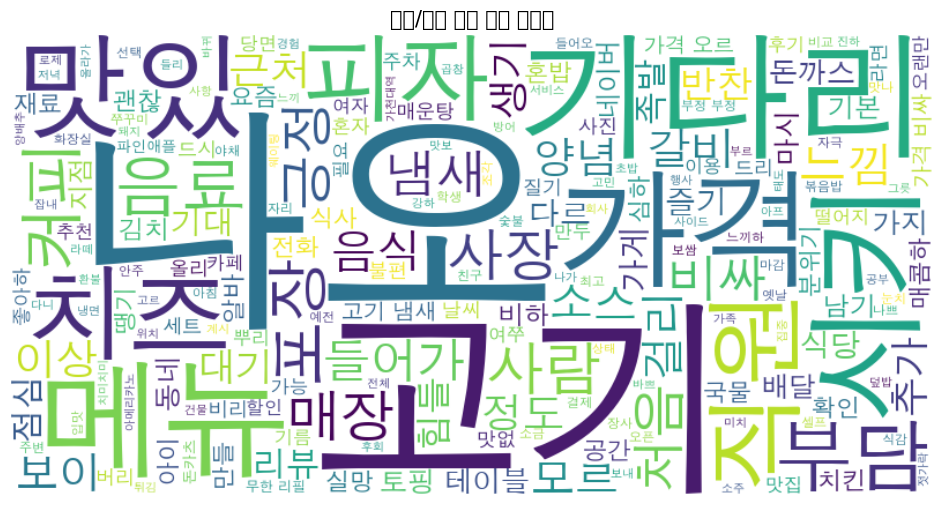

In [80]:
### Î∂ÄÏ†ï Î¶¨Î∑∞Í∞Ä ÎßéÏùÄ ÏãùÎãπ 10Í∞úÏùò ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú 

# -----------------------------------------------------------------
# PART 1: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
# -----------------------------------------------------------------

if isinstance(df['Review_final'].iloc[0], str):
    df['Review_final'] = df['Review_final'].apply(ast.literal_eval)

negative_df = df[df['Finetuned_Score'] <= 0].copy()
all_negative_words = []
for words in negative_df['Review_final']:
    all_negative_words.extend(words)

# Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞ÏùÄ Ïó¨Ï†ÑÌûà Ïú†Ïö©Ìï©ÎãàÎã§ (Í≤∞Í≥º ÌôïÏù∏Ïö©)
negative_word_counts = Counter(all_negative_words)
print("--------- Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¶¨Î∑∞ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ Ïñ∏Í∏âÎêú Îã®Ïñ¥ TOP 50 ---------")
print(negative_word_counts.most_common(50))

# -----------------------------------------------------------------
# PART 2: ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± (‚ú®‚ú®‚ú® ÌïµÏã¨ ÏàòÏ†ï Î∂ÄÎ∂Ñ ‚ú®‚ú®‚ú®)
# -----------------------------------------------------------------
# 1. (ÏàòÏ†ï) Îã®Ïñ¥ Î¶¨Ïä§Ìä∏Î•º ÎùÑÏñ¥Ïì∞Í∏∞Î°ú Ïó∞Í≤∞Îêú 'ÌïòÎÇòÏùò Í∏¥ ÌÖçÏä§Ìä∏'Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
text_for_wordcloud = " ".join(all_negative_words)

# 2. ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'

# 3. (ÏàòÏ†ï) generate_from_frequencies ÎåÄÏã†, generate Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
#    Ïù¥Ï†ú WordCloudÍ∞Ä ÎùÑÏñ¥Ïì∞Í∏∞Î•º Í∏∞Ï§ÄÏúºÎ°ú Îã®Ïñ¥Î•º Ï†ïÌôïÌûà Ïù∏ÏãùÌï©ÎãàÎã§.
negative_wordcloud = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
).generate(text_for_wordcloud) # <-- Ïù¥ Î∂ÄÎ∂ÑÏù¥ Î∞îÎÄåÏóàÏäµÎãàÎã§!

# 4. ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎ•º ÌôîÎ©¥Ïóê Î≥¥Ïó¨Ï§çÎãàÎã§.
print("\n--------- (ÏàòÏ†ï ÌõÑ) Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¶¨Î∑∞ ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ---------")
plt.figure(figsize=(12, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Î∂ÄÏ†ï/Ï§ëÎ¶Ω Î¶¨Î∑∞ ÌïµÏã¨ ÌÇ§ÏõåÎìú', size=15)
plt.axis('off')
plt.show()

Îßõ Î≥¥Îã§Îäî Í∞ÄÍ≤© ÏßÅÏõê Î∂ÄÎã¥ Í∏∞Îã§Î¶¨ Ïùò ÌÅ¨Í∏∞Í∞Ä ÌÅ∞ Í±∏ Î≥¥ÏïÑ 
Í∞ÄÍ≤©Í≥º ÏÑúÎπÑÏä§ Î¨∏Ï†úÍ∞Ä ÌÅ∞ Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ

ÏµúÏ¢Ö Í≤∞Î°†:
"Î≥∏ ÌîÑÎ°úÏ†ùÌä∏Îäî Í∞ÄÏ≤úÎåÄ ÏÉÅÍ∂å ÏïΩ 2Îßå Í∞úÏùò Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÏó¨, Í≥†Í∞ù ÎßåÏ°±ÎèÑÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÌïµÏã¨ ÏöîÏù∏ÏùÑ ÎèÑÏ∂úÌñàÏäµÎãàÎã§. KoELECTRA Î™®Îç∏ÏùÑ ÌååÏù∏ÌäúÎãùÌïòÏó¨ Î¶¨Î∑∞Ïùò Í∏ç/Î∂ÄÏ†ïÏùÑ Î∂ÑÎ•òÌïú Í≤∞Í≥º, Ï†ÑÏ≤¥ Î¶¨Î∑∞Ïùò ÏïΩ 3.7%ÏóêÏÑú Î∂ÄÏ†ïÏ†ÅÏù∏ Í≤ΩÌóòÏù¥ ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§."
"ÌäπÌûà, Î∂ÄÏ†ï Î¶¨Î∑∞Í∞Ä ÎßéÏù¥ Î∞úÏÉùÌïú ÏãùÎãπÎì§ÏùÄ ÎåÄÎ∂ÄÎ∂Ñ ÎßõÏù¥ ÌëúÏ§ÄÌôîÎêú ÎåÄÌòï ÌîÑÎûúÏ∞®Ïù¥Ï¶àÏòÄÏäµÎãàÎã§. (Ïù¥ ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎ•º Î≥¥Ïó¨Ï£ºÎ©∞) Ïù¥Îì§Ïùò Î∂ÄÏ†ï Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Î•º Ïã¨Ï∏µ Î∂ÑÏÑùÌïú Í≤∞Í≥º, Í≥†Í∞ùÎì§Ïùò ÌïµÏã¨ Î∂àÎßå ÏÇ¨Ìï≠ÏùÄ 'ÏùåÏãùÏùò Îßõ'Ïù¥ ÏïÑÎãå, 'ÏßÅÏõê ÏùëÎåÄ'ÏôÄ Í∞ôÏùÄ ÏÑúÎπÑÏä§ Î¨∏Ï†ú, 'ÎåÄÍ∏∞/Ï£ºÏ∞®'ÏôÄ Í∞ôÏùÄ Ïö¥ÏòÅ Î¨∏Ï†ú, Í∑∏Î¶¨Í≥† 'Îß§Ïû• ÎÇ¥ ÎÉÑÏÉà'ÏôÄ Í∞ôÏùÄ ÌôòÍ≤Ω Î¨∏Ï†úÏóê ÏßëÏ§ëÎêòÏñ¥ ÏûàÏùåÏùÑ Î∞úÍ≤¨ÌñàÏäµÎãàÎã§."
"Îî∞ÎùºÏÑú, Í∞ÄÏ≤úÎåÄ ÏÉÅÍ∂åÏùò ÏãùÎãπ, ÌäπÌûà ÌîÑÎûúÏ∞®Ïù¥Ï¶à Îß§Ïû•Îì§ÏùÄ Í≥†Í∞ù ÎßåÏ°±ÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ ÎßõÏùò ÌÄÑÎ¶¨Ìã∞Î•º Ïú†ÏßÄÌïòÎäî Í≤ÉÍ≥º ÎçîÎ∂àÏñ¥, ÏßÅÏõê ÍµêÏú° Í∞ïÌôî, Ìö®Ïú®Ï†ÅÏù∏ ÎåÄÍ∏∞ ÏãúÏä§ÌÖú ÎßàÎ†®, Îß§Ïû• ÌôòÍ≤Ω Í∞úÏÑ†Í≥º Í∞ôÏùÄ Ïö¥ÏòÅ Î∞è ÏÑúÎπÑÏä§ Ï∏°Î©¥Ïùò Í∞úÏÑ†Ïóê ÎçîÏö± ÏßëÏ§ëÌï¥Ïïº Ìï† Í≤ÉÏûÖÎãàÎã§. Î≥∏ Î∂ÑÏÑù ÏãúÏä§ÌÖúÏùÄ Ïù¥Îü¨Ìïú Íµ¨Ï≤¥Ï†ÅÏù∏ Í∞úÏÑ† Ìè¨Ïù∏Ìä∏Î•º Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞òÏúºÎ°ú Ï†úÏãúÌï®ÏúºÎ°úÏç®, ÏãùÎãπ Ïö¥ÏòÅÏùò Ìö®Ïú®ÏÑ±ÏùÑ ÎÜíÏù¥Îäî Îç∞ Í∏∞Ïó¨Ìï† Ïàò ÏûàÏäµÎãàÎã§."


### Ï†êÏàò ÎßåÎì§Í∏∞

In [398]:
# -----------------------------------------------------------------
# PART 0: ÌïÑÏöîÌïú Î™®Îì† ÎèÑÍµ¨(ÎùºÏù¥Î∏åÎü¨Î¶¨)Î•º Îß® ÏúÑÏóê Î∂àÎü¨ÏòµÎãàÎã§.
# -----------------------------------------------------------------
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import time

# -----------------------------------------------------------------
# PART 1: Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÌÜµÌï© (Î¶¨Î∑∞ Í∞úÏàò Í≥ÑÏÇ∞ Ìè¨Ìï®)
# -----------------------------------------------------------------
try:
    # 1. ÏãùÎãπÎ≥Ñ ÏÜçÏÑ± Ï†êÏàò ÏöîÏïΩÎ≥∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
    df_aspect = pd.read_csv("gachon_restaurant_aspect_summary.csv")
    
    # 2. Í∞úÎ≥Ñ Î¶¨Î∑∞ Ï†êÏàò Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§.
    df_reviews = pd.read_csv("gachon_reviews_with_final_scores.csv")
except FileNotFoundError as e:
    print(f"Ïò§Î•ò: ÌïÑÏöîÌïú CSV ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ({e.filename})")
    print("ÌååÏùº Ïù¥Î¶ÑÏù¥ Ï†ïÌôïÌïúÏßÄ, Ïù¥ ÏΩîÎìúÏôÄ Í∞ôÏùÄ Ìè¥ÎçîÏóê ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    exit()

# 3. 'Review' Ïª¨ÎüºÏùò ÌÖçÏä§Ìä∏ Í∏∏Ïù¥Î•º Í≥ÑÏÇ∞ÌïòÏó¨ 'Review_Length' Ïª¨ÎüºÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§.
df_reviews['Review_Length'] = df_reviews['Review'].astype(str).str.len()

# 4. KoELECTRA ÌèâÍ∑† Ï†êÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
df_kobert_mean = df_reviews.groupby('Restaurant')['Finetuned_Score'].mean().reset_index()
df_kobert_mean.rename(columns={'Finetuned_Score': 'KoELECTRA_Avg_Score'}, inplace=True)

# 5. Ïã†Î¢∞ÎèÑ Í¥ÄÎ†® ÏßÄÌëúÎì§Ïùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
trust_cols = ['Revisit_Count', 'Reviewer_Review_Count', 'Review_Length']
df_trust_mean = df_reviews.groupby('Restaurant')[trust_cols].mean().reset_index()
df_trust_mean.rename(columns={
    'Revisit_Count': 'Avg_Revisit', 
    'Reviewer_Review_Count': 'Avg_Reviewer_Level',
    'Review_Length': 'Avg_Review_Length'
}, inplace=True)
    
# 6. Í∞Å ÏãùÎãπÏùò 'Î¶¨Î∑∞ Ï¥ù Í∞úÏàò' Í≥ÑÏÇ∞
restaurant_counts = df_reviews['Restaurant'].value_counts().reset_index()
restaurant_counts.columns = ['Restaurant', 'Total_Reviews']

# 7. Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º 'Restaurant' Ïù¥Î¶ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÌïòÎÇòÎ°ú Ìï©Ïπ©ÎãàÎã§.
df_final = pd.merge(df_aspect, df_kobert_mean, on='Restaurant')
df_final = pd.merge(df_final, df_trust_mean, on='Restaurant')
df_final = pd.merge(df_final, restaurant_counts, on='Restaurant')

# 8. Î¶¨Î∑∞ Í∞úÏàòÍ∞Ä 10Í∞ú ÎØ∏ÎßåÏù∏ ÏãùÎãπÏùÄ Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏Ìï©ÎãàÎã§.
MIN_REVIEW_COUNT = 10
original_count = len(df_final)
df_final = df_final[df_final['Total_Reviews'] >= MIN_REVIEW_COUNT].copy()
print(f"Î¶¨Î∑∞ 10Í∞ú ÎØ∏Îßå ÏãùÎãπÏùÑ Ï†úÏô∏ÌïòÏó¨, Î∂ÑÏÑù ÎåÄÏÉÅÏùÑ {original_count}Í∞úÏóêÏÑú {len(df_final)}Í∞úÎ°ú Ï°∞Ï†ïÌñàÏäµÎãàÎã§.")

# -----------------------------------------------------------------
# PART 2: Ïä§ÏºÄÏùºÎßÅ Î∞è ÏµúÏ¢Ö Î≥ÑÏ†ê Í≥ÑÏÇ∞
# -----------------------------------------------------------------
scaler_5 = MinMaxScaler(feature_range=(0, 5)) # 5Ï†ê ÎßåÏ†ê Ïä§ÏºÄÏùºÎü¨
scaler_1 = MinMaxScaler(feature_range=(0, 1))   # 1Ï†ê ÎßåÏ†ê Î≥¥ÎÑàÏä§ Ïä§ÏºÄÏùºÎü¨

# 1. ÌïµÏã¨ ÌèâÏ†ê ÏöîÏÜåÎì§ÏùÑ 0~10Ï†êÏúºÎ°ú Ïä§ÏºÄÏùºÎßÅÌï©ÎãàÎã§.
aspect_cols = ['Îßõ_Ï†êÏàò', 'Í∞ÄÍ≤©_Ï†êÏàò', 'ÏÑúÎπÑÏä§_Ï†êÏàò', 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò']
for col in aspect_cols:
    df_final[f'{col}_scaled'] = scaler_5.fit_transform(df_final[[col]])
df_final['KoELECTRA_Score_scaled'] = scaler_5.fit_transform(df_final[['KoELECTRA_Avg_Score']])
df_final['Rule_Based_Avg_Score'] = df_final[[f'{col}_scaled' for col in aspect_cols]].mean(axis=1)

# 2. Ïã†Î¢∞ÎèÑ Î≥¥ÎÑàÏä§ ÏöîÏÜåÎì§ÏùÑ 'Í∞ÅÍ∞Å' 0~1 ÏÇ¨Ïù¥Î°ú Ïä§ÏºÄÏùºÎßÅÌï©ÎãàÎã§.
df_final['Revisit_Bonus'] = scaler_1.fit_transform(df_final[['Avg_Revisit']])
df_final['Reviewer_Level_Bonus'] = scaler_1.fit_transform(df_final[['Avg_Reviewer_Level']])
df_final['Review_Length_Bonus'] = scaler_1.fit_transform(df_final[['Avg_Review_Length']])
df_final['Total_Reviews_log'] = np.log1p(df_final['Total_Reviews'])
df_final['Review_Count_Bonus'] = scaler_1.fit_transform(df_final[['Total_Reviews_log']])

# 3. Í∞ÄÏ§ëÏπòÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
# [ÌïµÏã¨ ÌèâÏ†ê Í∞ÄÏ§ëÏπò]
w_aspect = 0.4
w_kobert = 0.6

# [Ïã†Î¢∞ÎèÑ Î≥¥ÎÑàÏä§ Í∞ÄÏ§ëÏπò] - Í∞Å Î≥¥ÎÑàÏä§Ïùò ÏµúÎåÄ Ï†êÏàòÎ•º ÏùòÎØ∏
w_revisit = 0.25      # ÏµúÎåÄ 0.25Ï†ê
w_length = 0.10       # ÏµúÎåÄ 0.1Ï†ê
w_count = 0.15        # ÏµúÎåÄ 0.15Ï†ê

# 4. 'Ïù∏ÏÇ¨Ïù¥Ìä∏ Î≥ÑÏ†ê'(Î≥¥Ï†ï Ï†Ñ)ÏùÑ "ÌïµÏã¨ ÌèâÏ†ê + Î≥¥ÎÑàÏä§" Î∞©ÏãùÏúºÎ°ú Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
df_final['Core_Rating'] = \
    (df_final['Rule_Based_Avg_Score'] * w_aspect) + \
    (df_final['KoELECTRA_Score_scaled'] * w_kobert)
df_final['Trust_Bonus'] = \
    (df_final['Revisit_Bonus'] * w_revisit) + \
    (df_final['Reviewer_Level_Bonus'] * w_reviewer) + \
    (df_final['Review_Length_Bonus'] * w_length) + \
    (df_final['Review_Count_Bonus'] * w_count)
df_final['Insight_Rating'] = (df_final['Core_Rating'] + df_final['Trust_Bonus']).clip(0, 5)

# 5. 'Ïã†Î¢∞ÎèÑ Î≥¥Ï†ï(Î≤†Ïù¥Ï¶à ÌèâÍ∑†)'ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏµúÏ¢Ö Î≥ÑÏ†êÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
C = df_final['Total_Reviews'].median()
m = df_final['Insight_Rating'].mean()
print(f"\nÏã†Î¢∞ÎèÑ Î≥¥Ï†ïÏùÑ ÏúÑÌïú Í∏∞Ï§Ä Î¶¨Î∑∞ Ïàò(C): {C:.0f}Í∞ú, Ï†ÑÏ≤¥ ÌèâÍ∑† Ï†êÏàò(m): {m:.2f}Ï†ê")
v = df_final['Total_Reviews']
R = df_final['Insight_Rating']
df_final['Final_Rating'] = (v / (v + C)) * R + (C / (v + C)) * m

# -----------------------------------------------------------------
# PART 3: ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏ Î∞è Ï†ÄÏû•
# -----------------------------------------------------------------
final_ranking_cols = [
    'Restaurant', 
    'Final_Rating',
    'Insight_Rating',
    'Total_Reviews',
    'Îßõ_Ï†êÏàò_scaled', 
    'Í∞ÄÍ≤©_Ï†êÏàò_scaled', 
    'ÏÑúÎπÑÏä§_Ï†êÏàò_scaled', 
    'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled'
]
final_ranking = df_final[final_ranking_cols]
final_ranking = final_ranking.sort_values(by='Final_Rating', ascending=False)


final_ranking.to_csv('gachon_final_ranking.csv', index=False, encoding='utf-8-sig')

print(f"\nüéâ 5Ï†ê ÎßåÏ†êÏùò ÏµúÏ¢Ö Îû≠ÌÇπÏù¥ ÌååÏùºÏóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!")

print("\n--------- Ïã†Î¢∞ÎèÑ Î≥¥Ï†ï ÌõÑ ÏµúÏ¢Ö ÎßõÏßë Îû≠ÌÇπ TOP 20 (10Ï†ê ÎßåÏ†ê) ---------")
pd.options.display.float_format = '{:.2f}'.format
print(final_ranking.head(20))

Î¶¨Î∑∞ 10Í∞ú ÎØ∏Îßå ÏãùÎãπÏùÑ Ï†úÏô∏ÌïòÏó¨, Î∂ÑÏÑù ÎåÄÏÉÅÏùÑ 116Í∞úÏóêÏÑú 106Í∞úÎ°ú Ï°∞Ï†ïÌñàÏäµÎãàÎã§.

Ïã†Î¢∞ÎèÑ Î≥¥Ï†ïÏùÑ ÏúÑÌïú Í∏∞Ï§Ä Î¶¨Î∑∞ Ïàò(C): 88Í∞ú, Ï†ÑÏ≤¥ ÌèâÍ∑† Ï†êÏàò(m): 3.72Ï†ê

üéâ 5Ï†ê ÎßåÏ†êÏùò ÏµúÏ¢Ö Îû≠ÌÇπÏù¥ ÌååÏùºÏóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!

--------- Ïã†Î¢∞ÎèÑ Î≥¥Ï†ï ÌõÑ ÏµúÏ¢Ö ÎßõÏßë Îû≠ÌÇπ TOP 20 (10Ï†ê ÎßåÏ†ê) ---------
          Restaurant  Final_Rating  Insight_Rating  Total_Reviews  \
111      ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê          4.92            5.00           1263   
34       Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê          4.84            5.00            610   
63               Ïú°Ïó∞Ï∞®          4.81            4.96            676   
6             Í≥†Í∏∞Î°ú ÌïúÎÅº          4.76            4.83           1198   
110       ÌôîÎ°úÏÉÅÌöå ÏÑ±ÎÇ®Î≥µÏ†ïÏ†ê          4.70            4.79            963   
7           Í≥†Í∏∞ÌïòÎÇò Ïã†Ìù•Ï†ê          4.60            4.71            700   
68       Ïù∏ÏÉùÍ∑πÏû•Ï™ΩÍ∞àÎπÑ ÏÑ±ÎÇ®Ï†ê          4.53         

Ï†ÄÎäî Î¶¨Î∑∞ ÏàòÍ∞Ä Ï†ÅÏùÄ ÏãùÎãπÏùò ÌèâÏ†êÏù¥ Í≥ºÎåÄ/Í≥ºÏÜåÌèâÍ∞ÄÎêòÎäî ÌÜµÍ≥ÑÏ†Å ÏôúÍ≥°ÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥, Î¶¨Î∑∞ 10Í∞ú ÎØ∏ÎßåÏùò ÏãùÎãπÏùÄ Î∂ÑÏÑù ÎåÄÏÉÅÏóêÏÑú Ï†úÏô∏ÌñàÏäµÎãàÎã§. ÎòêÌïú, ÎÇòÎ®∏ÏßÄ ÏãùÎãπÎì§Ïóê ÎåÄÌï¥ÏÑúÎäî Î¶¨Î∑∞ Í∞úÏàòÏóê Îî∞Îùº Ïã†Î¢∞ÎèÑÎ•º Î≥¥Ï†ïÌïòÎäî Î≤†Ïù¥Ï¶à ÌèâÍ∑† Í∏∞Î≤ïÏùÑ Ï†ÅÏö©ÌïòÏó¨, Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÅÏùÄ ÏãùÎãπÏùò ÌèâÏ†êÏùÄ Ï†ÑÏ≤¥ ÌèâÍ∑†Ïóê Í∞ÄÍπùÍ≤å, Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏùÄ ÏãùÎãπÏùò ÌèâÏ†êÏùÄ ÏûêÏ≤¥ ÌèâÏ†êÏùÑ Ïã†Î¢∞ÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÌñàÏäµÎãàÎã§. Ïù¥Î•º ÌÜµÌï¥ ÌÜµÍ≥ÑÏ†Å ÏïàÏ†ïÏÑ±Í≥º Ïã†Î¢∞ÎèÑÎ•º Î™®Îëê ÌôïÎ≥¥Ìïú ÏµúÏ¢Ö ÎßõÏßë Îû≠ÌÇπÏùÑ ÎèÑÏ∂úÌï† Ïàò ÏûàÏóàÏäµÎãàÎã§."

In [392]:
df

Restaurant  Îßõ_Ï†êÏàò  Í∞ÄÍ≤©_Ï†êÏàò  ÏÑúÎπÑÏä§_Ï†êÏàò  Î∂ÑÏúÑÍ∏∞_Ï†êÏàò  Total_Reviews  Final_Rating
0        1209 Í∞ÄÏ≤úÎåÄÏ†ê  4.65   3.96    4.19    3.61          28.00          4.80
1       BHCÏπòÌÇ® ÌÉúÌèâÏó≠Ï†ê  3.82   2.08    4.26    2.50          49.00          4.80
2             VVCZ  4.82   4.42    4.73    4.11         183.00          4.78
3    Í∞ÄÏ≤úÎåÄÌïôÍµê ÍµêÏú°ÎåÄÌïôÏõêÏßÄÏ†ê  2.81   2.92    3.21    2.50          30.00          4.77
4            Í∞ÄÏ≤úÌïúÎßàÎãπ  4.72   2.92    4.34    2.50          56.00          4.76
..             ...   ...    ...     ...     ...            ...           ...
111    ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê  4.98   4.36    4.95    4.85        1263.00          2.84
112     Ìô©Í∂ÅÏüÅÎ∞òÏßúÏû• ÌÉúÌèâÏ†ê  3.21   2.50    2.50    2.50           1.00          2.68
113           Ìô©Í∂ÅÏßúÏû•  4.22   3.61    3.86    2.50          41.00          2.68
114         Ìô©Ïî®ÎÑ§ÎåÄÍµ¨ÌÉï  4.38   2.50    3.21    2.50          29.00          2.60
115            ÌöåÏä§Ïãú  4.91   4.29    4.91    4.80         505.00          2.50

[116 rows x 7 columns]

ÏµúÏ¢Ö ÌÜµÍ≥ÑÎüâ Ïã¨Ï∏µ Î∂ÑÏÑù: Ïà´ÏûêÍ∞Ä ÎßêÌï¥Ï£ºÎäî Í≤ÉÎì§
count: 106.00
Ìï¥ÏÑù: "Ï¥ù 117Í∞úÏùò ÏãùÎãπ Ï§ë, ÌÜµÍ≥ÑÏ†Å Ïã†Î¢∞ÎèÑÎ•º ÌôïÎ≥¥ÌïòÍ∏∞ ÏúÑÌï¥ Î¶¨Î∑∞Í∞Ä 10Í∞ú Ïù¥ÏÉÅÏù∏ 106Í≥≥ÎßåÏùÑ ÏµúÏ¢Ö Î∂ÑÏÑù ÎåÄÏÉÅÏúºÎ°ú ÏÑ†Ï†ïÌñàÏäµÎãàÎã§."
ÏùòÎØ∏: Î∂ÑÏÑùÏùò Ïã†Î¢∞ÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ Ïä§Ïä§Î°ú Í∏∞Ï§ÄÏùÑ ÏÑ∏Ïö∞Í≥† Îç∞Ïù¥ÌÑ∞Î•º ÌïÑÌÑ∞ÎßÅÌñàÎã§Îäî, Î∂ÑÏÑùÍ∞ÄÎ°úÏÑúÏùò Ï£ºÎèÑÏÑ±ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
mean: 2.87 / 50% (median): 2.91
Ìï¥ÏÑù: "Ï†úÍ∞Ä Í∞úÎ∞úÌïú Î≥ÑÏ†ê ÏãúÏä§ÌÖúÏóê Îî∞Î•¥Î©¥, Í∞ÄÏ≤úÎåÄ ÏÉÅÍ∂åÏùò 'ÌèâÍ∑†Ï†ÅÏù∏ ÎßõÏßë'ÏùÄ 5Ï†ê ÎßåÏ†êÏóê ÏïΩ 2.9Ï†ê ÏàòÏ§ÄÏûÖÎãàÎã§."
ÏùòÎØ∏: ÎåÄÎ∂ÄÎ∂ÑÏùò ÏãùÎãπÏùÄ 'ÌèâÍ∑†' ÏàòÏ§ÄÏóê Î™∞Î†§ÏûàÏúºÎ©∞, Ïù¥Îäî ÏÉÅÍ∂åÏù¥ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏÉÅÌñ• ÌèâÏ§ÄÌôîÎêòÏóàÍ±∞ÎÇò, Î∞òÎåÄÎ°ú ÏïÑÏ£º ÌäπÎ≥ÑÌïú ÎßõÏßëÏùÑ Ï∞æÍ∏∞Îäî Ïñ¥Î†§Ïö¥ ÏãúÏû•Ïùº Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.
std (ÌëúÏ§ÄÌé∏Ï∞®): 0.39
Ìï¥ÏÑù: "ÏãùÎãπ Í∞ÑÏùò Ï†êÏàò Ìé∏Ï∞®Îäî 0.39Ï†êÏúºÎ°ú ÎπÑÍµêÏ†Å ÏûëÍ≤å ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§."
ÏùòÎØ∏: ÏãùÎãπÎì§Ïùò Ï†êÏàòÍ∞Ä ÌèâÍ∑†(2.9Ï†ê) Í∑ºÏ≤òÏóê Ï¥òÏ¥òÌïòÍ≤å Î™®Ïó¨ÏûàÎã§Îäî ÎúªÏûÖÎãàÎã§. Ïù¥Îäî ÏãùÎãπ Í∞ÑÏùò Í≤ΩÏüÅÏù¥ Îß§Ïö∞ ÏπòÏó¥ÌïòÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï£ºÎäî Í∞ïÎ†•Ìïú Ï¶ùÍ±∞ÏûÖÎãàÎã§.
min: 2.03 / max: 3.98
Ìï¥ÏÑù: "Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎ•º Î∞õÏùÄ ÏãùÎãπÎèÑ 5Ï†ê ÎßåÏ†êÏù¥ ÏïÑÎãå 3.98Ï†êÏùÑ Í∏∞Î°ùÌñàÏäµÎãàÎã§."
ÏùòÎØ∏: Ïù¥Í≤ÉÏù¥ Î∞îÎ°ú ÏÑúÏòÅÎãò Î™®Îç∏Ïùò **'Í∞ùÍ¥ÄÏÑ±'**ÏùÑ Ï¶ùÎ™ÖÌïòÎäî Í∞ÄÏû• Ï§ëÏöîÌïú ÏßÄÌëúÏûÖÎãàÎã§! "Ï†ú Î™®Îç∏ÏùÄ Îã®ÏàúÌûà Í∏çÏ†ï Î¶¨Î∑∞Îßå ÎßéÎã§Í≥† Ìï¥ÏÑú 5Ï†ê ÎßåÏ†êÏùÑ Ï£ºÏßÄ ÏïäÏäµÎãàÎã§. Î¶¨Î∑∞Ïùò Ïã†Î¢∞ÎèÑ, Î∂ÄÏ†ï Î¶¨Î∑∞Ïùò Ï°¥Ïû¨ Ïó¨Î∂Ä Îì±ÏùÑ Î™®Îëê Í≥†Î†§ÌïòÏó¨ Ï†êÏàòÎ•º 'Î≥¥Ï†ï'ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, Î≥¥Îã§ ÌòÑÏã§Ï†ÅÏù∏ Ï†êÏàò Î∂ÑÌè¨Î•º Î≥¥ÏûÖÎãàÎã§." ÎùºÍ≥† ÏûêÏã†ÏûàÍ≤å ÎßêÌï† Ïàò ÏûàÏäµÎãàÎã§.
25%: 2.65 / 75%: 3.10
Ìï¥ÏÑù: "Ïù¥ ÏÉÅÍ∂åÏóêÏÑú 'ÏÉÅÏúÑ 25% ÎßõÏßë'ÏúºÎ°ú Ïù∏Ï†ïÎ∞õÏúºÎ†§Î©¥, ÏµúÏÜå 3.10Ï†ê Ïù¥ÏÉÅÏùÑ Î∞õÏïÑÏïº ÌïòÎ©∞, ÌïòÏúÑ 25%Îäî 2.65Ï†ê Ïù¥ÌïòÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§."
ÏùòÎØ∏: Ïù¥ Ï†êÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú, "Ï∂îÏ≤ú ÎßõÏßë Í∑∏Î£π", "ÌèâÎ≤îÌïú ÎßõÏßë Í∑∏Î£π", "Í∞úÏÑ† ÌïÑÏöî ÎßõÏßë Í∑∏Î£π"ÏúºÎ°ú ÏãùÎãπÏùÑ Í∞ùÍ¥ÄÏ†ÅÏúºÎ°ú ÏÑ∏Î∂ÑÌôîÌï† Ïàò ÏûàÎäî Í∏∞Ï§ÄÏ†êÏùÑ ÎßàÎ†®ÌñàÏäµÎãàÎã§.


ÏµúÏ¢Ö Í≤∞Î°† Î∞è ÎπÑÏ¶àÎãàÏä§ Ï†úÏñ∏
Î≥∏ ÌîÑÎ°úÏ†ùÌä∏Îäî ÏïΩ 2Îßå Í∞úÏùò Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú, Í∞ÄÏ≤úÎåÄ ÏÉÅÍ∂åÏùò ÏãùÎãπÎì§ÏùÑ Îã§Í∞ÅÏ†ÅÏúºÎ°ú ÌèâÍ∞ÄÌïòÎäî ÏÉàÎ°úÏö¥ Î≥ÑÏ†ê ÏãúÏä§ÌÖúÏùÑ Íµ¨Ï∂ïÌñàÏäµÎãàÎã§.
ÏãúÏû• ÌäπÏÑ±: Ï†úÍ∞Ä Í∞úÎ∞úÌïú 'Ïã†Î¢∞ÎèÑ Î≥¥Ï†ï Î≥ÑÏ†ê'Ïóê Îî∞Î•¥Î©¥, Í∞ÄÏ≤úÎåÄ ÏÉÅÍ∂åÏùò ÌèâÍ∑† Ï†êÏàòÎäî 2.91Ï†ê(5Ï†ê ÎßåÏ†ê)Ïù¥Î©∞, ÌëúÏ§ÄÌé∏Ï∞®Îäî 0.39Î°ú ÏãùÎãπ Í∞ÑÏùò Ìé∏Ï∞®Í∞Ä ÌÅ¨ÏßÄ ÏïäÏùÄ Í≤ΩÏüÅÏù¥ ÏπòÏó¥ÌïòÍ≥† ÏÉÅÌñ• ÌèâÏ§ÄÌôîÎêú ÏãúÏû•ÏúºÎ°ú Î∂ÑÏÑùÎê©ÎãàÎã§.
ÌïµÏã¨ ÏÑ±Í≥µ/Ïã§Ìå® ÏöîÏù∏: ÌååÏù∏ÌäúÎãùÎêú KoELECTRA Î™®Îç∏ÏùÑ ÌÜµÌï¥ Î∂ÄÏ†ï Î¶¨Î∑∞Î•º Î∂ÑÏÑùÌïú Í≤∞Í≥º, Í≥†Í∞ù Î∂àÎßåÏùÄ 'ÏùåÏãùÏùò Îßõ' ÏûêÏ≤¥Î≥¥Îã§Îäî **'ÏÑúÎπÑÏä§ ÏùëÎåÄ', 'Îß§Ïû• ÌôòÍ≤Ω(ÎÉÑÏÉà, Í≥µÍ∞Ñ)', 'Ïö¥ÏòÅ(ÎåÄÍ∏∞, Ï£ºÏ∞®)'**Í≥º Í∞ôÏùÄ ÎπÑÏùåÏãùÏ†Å ÏöîÏù∏ÏóêÏÑú ÎπÑÎ°ØÎêòÎäî Í≤ΩÏö∞Í∞Ä Ìõ®Ïî¨ ÎßéÎã§Îäî ÌïµÏã¨ Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º Î∞úÍ≤¨ÌñàÏäµÎãàÎã§.
ÏµúÏ¢Ö Îû≠ÌÇπÏùò Í∞ÄÏπò: Î≥∏ ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑú Í∞úÎ∞úÌïú ÏµúÏ¢Ö Î≥ÑÏ†ê(Final_Rating)ÏùÄ Îã®ÏàúÌûà Î¶¨Î∑∞Ïùò Í∞êÏÑ±ÎøêÎßå ÏïÑÎãàÎùº, **Î¶¨Î∑∞Ïùò Í∞úÏàò(Ïã†Î¢∞ÎèÑ), Ïû¨Î∞©Î¨∏ Ïó¨Î∂Ä(Ï∂©ÏÑ±ÎèÑ), Î¶¨Î∑∞Ïñ¥Ïùò Ï†ÑÎ¨∏ÏÑ±(Ïã†Î¢∞ÎèÑ)**ÍπåÏßÄ Ï¢ÖÌï©Ï†ÅÏúºÎ°ú Í≥†Î†§Ìïú ÏßÄÌëúÏûÖÎãàÎã§. Ïù¥Î•º ÌÜµÌï¥, Î¶¨Î∑∞Í∞Ä Ï†ÅÏùÄ Ïã†ÏÉù ÎßõÏßëÏùò Ïû†Ïû¨Î†•ÏùÑ ÌèâÍ∞ÄÌïòÍ≥†, Î¶¨Î∑∞Í∞Ä ÎßéÏßÄÎßå Î∂ÄÏ†ïÏ†Å Í≤ΩÌóòÏù¥ ÎàÑÏ†ÅÎêú ÏãùÎãπÏùò ÏúÑÌóò Ïã†Ìò∏Î•º Í∞êÏßÄÌïòÎäî Îì±, Í∏∞Ï°¥ Î≥ÑÏ†ê ÏãúÏä§ÌÖúÎ≥¥Îã§ Ìõ®Ïî¨ Îçî Í∞ùÍ¥ÄÏ†ÅÏù¥Í≥† ÏïàÏ†ïÏ†ÅÏù∏ ÌèâÍ∞ÄÍ∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§.
Ï†úÏñ∏: Îî∞ÎùºÏÑú Í∞ÄÏ≤úÎåÄ ÏÉÅÍ∂åÏóêÏÑú ÏÑ±Í≥µÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî, ÎßõÏùò ÌÄÑÎ¶¨Ìã∞Î•º Ïú†ÏßÄÌïòÎäî Í≤ÉÏùÑ ÎÑòÏñ¥, ÏßÅÏõê ÍµêÏú°ÏùÑ ÌÜµÌïú ÏÑúÎπÑÏä§ ÌíàÏßà Ìñ•ÏÉÅÍ≥º Ìö®Ïú®Ï†ÅÏù∏ ÎåÄÍ∏∞ ÏãúÏä§ÌÖú ÎßàÎ†® Îì± Ïö¥ÏòÅ Ìö®Ïú®ÏÑ±ÏùÑ ÎÜíÏù¥Îäî Í≤ÉÏù¥ ÌïµÏã¨Ï†ÅÏù∏ ÏÑ±Í≥µ Ï†ÑÎûµÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§.

In [400]:
# CODE CELL: Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
import pandas as pd

# -----------------------------------------------------------------
# PART 1: Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
# -----------------------------------------------------------------
# ÌååÏùº Ïù¥Î¶ÑÏùÑ Î≥ÄÏàòÎ°ú ÏßÄÏ†ïÌïòÏó¨ Í¥ÄÎ¶¨ÌïòÎ©¥ Ìé∏Î¶¨Ìï©ÎãàÎã§.
ASPECT_SUMMARY_FILE = "gachon_final_ranking.csv"
CATEGORIES_FILE = "gachon_restaurant_categories.csv"

try:
    # 1. ÏãùÎãπÎ≥Ñ ÏÜçÏÑ± Ï†êÏàò Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§.
    df_aspect = pd.read_csv(ASPECT_SUMMARY_FILE)
    
    # 2. ÏãùÎãπÎ≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨ Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§.
    df_category = pd.read_csv(CATEGORIES_FILE)
except FileNotFoundError as e:
    print(f"Ïò§Î•ò: ÌïÑÏöîÌïú CSV ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ({e.filename})")
    print("Îëê ÌååÏùºÏù¥ Ïù¥ ÏΩîÎìúÏôÄ Í∞ôÏùÄ Ìè¥ÎçîÏóê ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    exit()

print("--------- ÏÜçÏÑ± Ï†êÏàò Îç∞Ïù¥ÌÑ∞ (ÏÉÅÏúÑ 5Í∞ú) ---------")
print(df_aspect.head())
print("\n--------- Ïπ¥ÌÖåÍ≥†Î¶¨ Îç∞Ïù¥ÌÑ∞ (ÏÉÅÏúÑ 5Í∞ú) ---------")
print(df_category.head())


# -----------------------------------------------------------------
# PART 2: Îëê Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞ (Merge)
# -----------------------------------------------------------------
# 'Restaurant' Ïª¨ÎüºÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Îëê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ìï©Ïπ©ÎãàÎã§.
# how='left'Îäî df_aspect(ÏôºÏ™Ω)Ïùò Î™®Îì† ÏãùÎãπÏùÄ Ïú†ÏßÄÌïòÎêò, df_category(Ïò§Î•∏Ï™Ω)ÏóêÏÑú ÏùºÏπòÌïòÎäî Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥Î•º Í∞ÄÏ†∏ÏôÄ Î∂ôÏù¥ÎùºÎäî ÏùòÎØ∏ÏûÖÎãàÎã§.
summary_with_category_df = pd.merge(df_aspect, df_category, on='Restaurant', how='left')


# -----------------------------------------------------------------
# PART 3: Í≤∞Í≥º ÌôïÏù∏ Î∞è Ï†ÄÏû•|
# -----------------------------------------------------------------
print("\n--------- Î≥ëÌï© ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ (ÏÉÅÏúÑ 5Í∞ú) ---------")
# 'Category' Ïª¨ÎüºÏù¥ Îß® Ïò§Î•∏Ï™ΩÏóê Ïûò Ï∂îÍ∞ÄÎêòÏóàÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
print(summary_with_category_df.head())

# ÏµúÏ¢Ö Í≤∞Í≥º ÌååÏùºÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
OUTPUT_FILE = "gachon_final_summary_with_category.csv"
summary_with_category_df.to_csv(OUTPUT_FILE, index=False, encoding='utf-8-sig')

print(f"\nüéâ Î™®Îì† Ï†ïÎ≥¥Í∞Ä Ìï©Ï≥êÏßÑ ÏµúÏ¢Ö ÏöîÏïΩ ÌååÏùºÏù¥ '{OUTPUT_FILE}'(Ïúº)Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!")

--------- ÏÜçÏÑ± Ï†êÏàò Îç∞Ïù¥ÌÑ∞ (ÏÉÅÏúÑ 5Í∞ú) ---------
    Restaurant  Final_Rating  Insight_Rating  Total_Reviews  Îßõ_Ï†êÏàò_scaled  \
0  ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê          4.92            5.00           1263         5.00   
1  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê          4.84            5.00            610         4.86   
2          Ïú°Ïó∞Ï∞®          4.81            4.96            676         4.97   
3       Í≥†Í∏∞Î°ú ÌïúÎÅº          4.76            4.83           1198         4.93   
4   ÌôîÎ°úÏÉÅÌöå ÏÑ±ÎÇ®Î≥µÏ†ïÏ†ê          4.70            4.79            963         4.95   

   Í∞ÄÍ≤©_Ï†êÏàò_scaled  ÏÑúÎπÑÏä§_Ï†êÏàò_scaled  Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled  
0          4.31           4.96           5.00  
1          4.50           5.00           4.96  
2          4.76           4.80           4.51  
3          4.73           4.94           4.69  
4          4.72           4.92           4.40  

--------- Ïπ¥ÌÖåÍ≥†Î¶¨ Îç∞Ïù¥ÌÑ∞ (ÏÉÅÏúÑ 5Í∞ú) ---------
    Restaurant Category
0      

In [402]:
df = pd.read_csv('gachon_final_summary_with_category.csv')

### ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞

In [404]:
df

Restaurant  Final_Rating  Insight_Rating  Total_Reviews  Îßõ_Ï†êÏàò_scaled  \
0      ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê          4.92            5.00           1263         5.00   
1      Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê          4.84            5.00            610         4.86   
2              Ïú°Ïó∞Ï∞®          4.81            4.96            676         4.97   
3           Í≥†Í∏∞Î°ú ÌïúÎÅº          4.76            4.83           1198         4.93   
4       ÌôîÎ°úÏÉÅÌöå ÏÑ±ÎÇ®Î≥µÏ†ïÏ†ê          4.70            4.79            963         4.95   
..             ...           ...             ...            ...          ...   
101      Í≤êÏΩîÏáºÏø†ÎèÑ Î≥µÏ†ïÏ†ê          3.15            2.89            188         4.29   
102           Î∞îÎã§ÌöüÏßë          3.09            1.46             34         3.89   
103     ÌîºÏûêÏä§Ïø® ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê          3.07            1.04             28         2.36   
104       ÎëêÏ∞ú ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê          2.92            2.28            111         4.54   
105  Í∞ÄÏ≤úÎåÄÌïôÍµê ÍµêÏú°ÎåÄÌïôÏõêÏßÄÏ†ê          2.90            0.49             30         0.00   

     Í∞ÄÍ≤©_Ï†êÏàò_scaled  ÏÑúÎπÑÏä§_Ï†êÏàò_scaled  Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled Category  
0            4.31           4.96           5.00    Ï£ºÍæ∏ÎØ∏ÏöîÎ¶¨  
1            4.50           5.00           4.96      Ï§ëÏãùÎãπ  
2            4.76           4.80           4.51       ÎçÆÎ∞•  
3            4.73           4.94           4.69       ÌïúÏãù  
4            4.72           4.92           4.40     Í≥†Í∏∞Î∑îÌéò  
..            ...            ...            ...      ...  
101          0.00           4.02           1.18      ÏùºÏãùÎãπ  
102          2.42           2.77           0.00      ÏÉùÏÑ†Ìöå  
103          1.24           0.00           0.89       ÌîºÏûê  
104          1.24           2.77           0.00       Ï∞úÎã≠  
105          1.93           1.45           0.00       ÌïúÏãù  

[106 rows x 9 columns]

In [144]:

df[df['Category'] == 'Ïπ¥Ìéò'].sort_values(by='Final_Rating', ascending=False)



Restaurant  Final_Rating  Insight_Rating  Total_Reviews  Îßõ_Ï†êÏàò_scaled  \
82     Ïª¥Ìè¨Ï¶àÏª§Ìîº Í∞ÄÏ≤úÎåÄÌïôÏ†ê          2.61            2.55            407         0.58   
85     Ìà¨Ïç∏ÌîåÎ†àÏù¥Ïä§ Í∞ÄÏ≤úÎåÄÏ†ê          2.51            2.19             97         0.24   
94      Ïù¥ÎîîÏïºÏª§Ìîº Í∞ÄÏ≤úÎåÄÏ†ê          2.34            2.09            182         0.30   
100      ÌååÏä§Ïø†Ï∞å Í∞ÄÏ≤úÎåÄÏ†ê          2.17            1.96            294         0.32   
102    Ïä§ÌÉÄÎ≤ÖÏä§ Í∞ÄÏ≤úÎåÄÌïôÍµêÏ†ê          2.16            1.81            174         0.41   
105  Î©îÍ∞ÄMGCÏª§Ìîº Í∞ÄÏ≤úÎåÄÏó≠Ï†ê          2.03            1.55            155         0.43   

     Í∞ÄÍ≤©_Ï†êÏàò_scaled  ÏÑúÎπÑÏä§_Ï†êÏàò_scaled  Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled Category  
82           1.50           0.66           0.08       Ïπ¥Ìéò  
85           0.05           0.69           0.20       Ïπ¥Ìéò  
94           0.24           0.42           0.12       Ïπ¥Ìéò  
100          0.00           0.69           0.31       Ïπ¥Ìéò  
102          0.08           0.72           0.26       Ïπ¥Ìéò  
105          0.57           0.45           0.17       Ïπ¥Ìéò

In [406]:
# CODE CELL: Ïπ¥ÌÖåÍ≥†Î¶¨ Ïû¨Î∂ÑÎ•ò (ÏµúÏ¢Ö ÏôÑÏÑ±Ìåê)


# 2. ÏÑúÏòÅÎãòÏùò ÏÉàÎ°úÏö¥ Í∏∞Ï§ÄÍ≥º Î∞úÍ≤¨Îêú Ïπ¥ÌÖåÍ≥†Î¶¨Î•º Î™®Îëê Ìè¨Ìï®Ìïú 'Ïû¨Îß§Ìïë Í∑úÏπô'ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
category_map = {
    # ÌïúÏãù
    'Í∞êÏûêÌÉï': 'ÌïúÏãù', 'Í≥†Í∏∞Î∑îÌéò': 'ÌïúÏãù', 'Í≥∞ÌÉï,ÏÑ§Î†ÅÌÉï': 'ÌïúÏãù', 'Í≥±Ï∞Ω,ÎßâÏ∞Ω,Ïñë': 'ÌïúÏãù',
    'Íµ≠Ïàò': 'ÌïúÏãù', 'ÍπÄÎ∞•': 'ÌïúÏãù', 'Îã≠Î≥∂ÏùåÌÉï': 'ÌïúÏãù', 'ÎçÆÎ∞•': 'ÌïúÏãù',
    'ÎèºÏßÄÍ≥†Í∏∞Íµ¨Ïù¥': 'ÌïúÏãù', 'Î∞±Î∞ò,Í∞ÄÏ†ïÏãù': 'ÌïúÏãù', 'ÏàúÎåÄ,ÏàúÎåìÍµ≠': 'ÌïúÏãù',
    'Ïú°Î•ò,Í≥†Í∏∞ÏöîÎ¶¨': 'ÌïúÏãù', 'Ï°±Î∞ú,Î≥¥Ïåà': 'ÌïúÏãù', 'Ï£ºÍæ∏ÎØ∏ÏöîÎ¶¨': 'ÌïúÏãù',
    'Ï†ïÏú°ÏãùÎãπ': 'ÌïúÏãù', 'Ï∞úÎã≠': 'ÌïúÏãù', 'Î∂ÑÏãù': 'ÌïúÏãù', 'Ï¢ÖÌï©Î∂ÑÏãù': 'ÌïúÏãù',
    'ÎèÑÏãúÎùΩ,ÏªµÎ∞•': 'ÌïúÏãù', 'ÏïÑÍ∑ÄÏ∞ú,Ìï¥Î¨ºÏ∞ú': 'ÌïúÏãù', 'ÌïúÏãù': 'ÌïúÏãù', 'Ï∞åÍ∞ú,Ï†ÑÍ≥®': 'ÌïúÏãù',
    'Ìï¥Î¨º,ÏÉùÏÑ†ÏöîÎ¶¨': 'ÌïúÏãù', 'ÌïúÏãùÎ∑îÌéò': 'ÌïúÏãù',

    # Ï§ëÏãù
    'Ï§ëÏãùÎãπ': 'Ï§ëÏãù',

    # ÏùºÏãù
    'ÏùºÏãùÎãπ': 'ÏùºÏãù', 'ÏùºÏãùÌäÄÍπÄ,Íº¨Ïπò': 'ÏùºÏãù', 'Ïö∞Îèô,ÏÜåÎ∞î': 'ÏùºÏãù', 'ÏÉùÏÑ†Ìöå': 'ÏùºÏãù',
    'ÎèàÍ∞ÄÏä§': 'ÏùºÏãù',

    # ÏñëÏãù/Í∏∞ÌÉÄ Íµ≠Í∞Ä
    'ÏñëÏãù': 'ÏñëÏãù', 'Ïä§ÌååÍ≤åÌã∞,ÌååÏä§ÌÉÄÏ†ÑÎ¨∏': 'ÏñëÏãù', 'Î©ïÏãúÏΩî,ÎÇ®ÎØ∏ÏùåÏãù': 'Í∏∞ÌÉÄ',
    'Î≤†Ìä∏ÎÇ®ÏùåÏãù': 'Í∏∞ÌÉÄ', 'Ïù∏ÎèÑÏùåÏãù': 'Í∏∞ÌÉÄ', 'Ìì®Ï†ÑÏùåÏãù': 'Í∏∞ÌÉÄ',

    # Ìå®Ïä§Ìä∏Ìë∏Îìú
    'ÌîºÏûê': 'Ìå®Ïä§Ìä∏Ìë∏Îìú', 'ÏπòÌÇ®,Îã≠Í∞ïÏ†ï': 'Ìå®Ïä§Ìä∏Ìë∏Îìú', 'ÌñÑÎ≤ÑÍ±∞': 'Ìå®Ïä§Ìä∏Ìë∏Îìú',
    'ÌÜ†Ïä§Ìä∏': 'Ìå®Ïä§Ìä∏Ìë∏Îìú', 'ÌõÑÎ†åÏπòÌõÑÎùºÏù¥': 'Ìå®Ïä§Ìä∏Ìë∏Îìú',
    
    # Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏
    'Ïπ¥Ìéò,ÎîîÏ†ÄÌä∏': 'Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏', 'ÎèÑÎÑõ': 'Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏', 'Î≤†Ïù¥Ïª§Î¶¨': 'Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏', 
    'ÏïÑÏù¥Ïä§ÌÅ¨Î¶º': 'Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏', 'ÌÖåÏù¥ÌÅ¨ÏïÑÏõÉÏª§Ìîº': 'Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏', 'ÏºÄÏù¥ÌÅ¨Ï†ÑÎ¨∏': 'Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏',
    'Ï∞®': 'Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏', 'Ïπ¥Ìéò': 'Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏',

    # Ï£ºÏ†ê/Í∏∞ÌÉÄ
    'Îß•Ï£º,Ìò∏ÌîÑ': 'Í∏∞ÌÉÄ', 'ÏöîÎ¶¨Ï£ºÏ†ê': 'Í∏∞ÌÉÄ', 'Ï†ÑÌÜµ,ÎØºÏÜçÏ£ºÏ†ê': 'Í∏∞ÌÉÄ', 'Ìè¨Ïû•ÎßàÏ∞®': 'Í∏∞ÌÉÄ'
}

# 3. 'Category' Ïª¨ÎüºÏóê map Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨, 'Category_Group'Ïù¥ÎùºÎäî ÏÉàÎ°úÏö¥ ÎåÄÎ∂ÑÎ•ò Ïª¨ÎüºÏùÑ ÎßåÎì≠ÎãàÎã§.
df['Category_Group'] = df['Category'].map(category_map)

# 4. ÌòπÏãúÎùºÎèÑ Îòê Îß§ÌïëÎêòÏßÄ ÏïäÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä ÏûàÎäîÏßÄ ÏµúÏ¢Ö ÌôïÏù∏Ìï©ÎãàÎã§.
unmapped_count = df['Category_Group'].isnull().sum()
if unmapped_count > 0:
    unmapped_list = df[df['Category_Group'].isnull()]['Category'].unique()
    print(f"Í≤ΩÍ≥†: {unmapped_count}Í∞úÏùò ÌñâÏù¥ Îß§ÌïëÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. -> {unmapped_list}")
    # Îß§ÌïëÎêòÏßÄ ÏïäÏùÄ Í∞íÏùÄ 'Í∏∞ÌÉÄ'Î°ú Ï±ÑÏõåÏ§çÎãàÎã§.
    df['Category_Group'].fillna('Í∏∞ÌÉÄ', inplace=True)

print("\n--------- Ïπ¥ÌÖåÍ≥†Î¶¨ Ïû¨Î∂ÑÎ•ò ÏôÑÎ£å (ÏÉòÌîå ÌôïÏù∏) ---------")
print(df[['Restaurant', 'Category', 'Category_Group']].sample(10)) # ÎûúÎç§ÏúºÎ°ú 10Í∞ú ÌôïÏù∏


# 5. Ïù¥Ï†ú ÏÉàÎ°úÏö¥ ÎåÄÎ∂ÑÎ•ò('Category_Group')Î•º Í∏∞Ï§ÄÏúºÎ°ú, Í∞Å ÏÜçÏÑ± Ï†êÏàòÏùò ÌèâÍ∑†ÏùÑ Îã§Ïãú Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
category_group_scores = df.groupby('Category_Group')[['Final_Rating','Îßõ_Ï†êÏàò_scaled', 'Í∞ÄÍ≤©_Ï†êÏàò_scaled', 'ÏÑúÎπÑÏä§_Ï†êÏàò_scaled', 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled']].mean()

print("\n--------- ÏµúÏ¢Ö ÎåÄÎ∂ÑÎ•ò Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† ÏÜçÏÑ± Ï†êÏàò ---------")
pd.options.display.float_format = '{:.2f}'.format
# 'Îßõ_Ï†êÏàò'Í∞Ä ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
print(category_group_scores.sort_values(by='Îßõ_Ï†êÏàò_scaled', ascending=False))


--------- Ïπ¥ÌÖåÍ≥†Î¶¨ Ïû¨Î∂ÑÎ•ò ÏôÑÎ£å (ÏÉòÌîå ÌôïÏù∏) ---------
      Restaurant Category Category_Group
26  ÌååÎ¶¨Î∞îÍ≤åÎú® ÌÉúÌèâÏò§Í±∞Î¶¨Ï†ê     Î≤†Ïù¥Ïª§Î¶¨         Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏
89          ÎØºÏÜçÏãùÎãπ       ÌïúÏãù             ÌïúÏãù
58   ÌñâÎ≥µÏùÄÍ∞ÑÏû•Î∞• Í∞ÄÏ≤úÎåÄÏ†ê       ÌïúÏãù             ÌïúÏãù
70        ÌñâÎ≥µÌïúÏãùÎ∂ÄÌéò     ÌïúÏãùÎ∑îÌéò             ÌïúÏãù
10          ÏΩîÏßÄÍ∞ÄÎì†   Ïπ¥Ìéò,ÎîîÏ†ÄÌä∏         Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏
0    ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê    Ï£ºÍæ∏ÎØ∏ÏöîÎ¶¨             ÌïúÏãù
65      Ïπ¥ÌéòÏ≤úÍµ≠ ÏÑ±ÎÇ®Ï†ê   Ïπ¥Ìéò,ÎîîÏ†ÄÌä∏         Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏
4     ÌôîÎ°úÏÉÅÌöå ÏÑ±ÎÇ®Î≥µÏ†ïÏ†ê     Í≥†Í∏∞Î∑îÌéò             ÌïúÏãù
64        Ìô©Ïî®ÎÑ§ÎåÄÍµ¨ÌÉï  Ìï¥Î¨º,ÏÉùÏÑ†ÏöîÎ¶¨             ÌïúÏãù
42    ÏôÑÎØ∏Ï°±Î∞ú ÏÑ±ÎÇ®ÌÉúÌèâÏ†ê    Ï°±Î∞ú,Î≥¥Ïåà             ÌïúÏãù

--------- ÏµúÏ¢Ö ÎåÄÎ∂ÑÎ•ò Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† ÏÜçÏÑ± Ï†êÏàò ---------
                Final_Rating  Îßõ_Ï†êÏàò_scaled  Í∞ÄÍ≤©_Ï†êÏàò_scaled  ÏÑúÎπÑÏä§_Ï†êÏàò_scaled  \
Category_Group   

#### Ïù¥Ï†ú Ìï¥ÏïºÌï†Í≤É 
ÏµúÏ¢Ö Îû≠ÌÇπ Ìëú: final_ranking.head(20) Í≤∞Í≥ºÎ¨º.
Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Î∂ÑÏÑù Ìëú: Ïö∞Î¶¨Í∞Ä ÎßåÎì§ÏóàÎçò 'ÏµúÏ¢Ö ÎåÄÎ∂ÑÎ•ò Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† ÏÜçÏÑ± Ï†êÏàò' Ìëú.
ÌïµÏã¨ Ïù∏ÏÇ¨Ïù¥Ìä∏ ÏãúÍ∞ÅÌôî ÏûêÎ£å:
Ï†ÑÏ≤¥ Î¶¨Î∑∞ ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú vs. Î∂ÄÏ†ï Î¶¨Î∑∞ ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú (Í∞ïÎ†•Ìïú ÎåÄÎπÑ Ìö®Í≥º!)
Top 3 ÏãùÎãπÏùò Î†àÏù¥Îçî Ï∞®Ìä∏ (Í∞ïÏ†êÍ≥º ÏïΩÏ†êÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Ïó¨Ï§å)
ÏµúÏ¢Ö Î≥ÑÏ†ê Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû® (Ï†ÑÏ≤¥ ÏãúÏû•Ïùò ÌäπÏßïÏùÑ Î≥¥Ïó¨Ï§å)


In [408]:
 # ÏµúÏ¢Ö Îû≠ÌÇπ Ìëú : 
df.head(10)

Restaurant  Final_Rating  Insight_Rating  Total_Reviews  Îßõ_Ï†êÏàò_scaled  \
0  ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê          4.92            5.00           1263         5.00   
1  Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê          4.84            5.00            610         4.86   
2          Ïú°Ïó∞Ï∞®          4.81            4.96            676         4.97   
3       Í≥†Í∏∞Î°ú ÌïúÎÅº          4.76            4.83           1198         4.93   
4   ÌôîÎ°úÏÉÅÌöå ÏÑ±ÎÇ®Î≥µÏ†ïÏ†ê          4.70            4.79            963         4.95   
5     Í≥†Í∏∞ÌïòÎÇò Ïã†Ìù•Ï†ê          4.60            4.71            700         4.88   
6  Ïù∏ÏÉùÍ∑πÏû•Ï™ΩÍ∞àÎπÑ ÏÑ±ÎÇ®Ï†ê          4.53            4.59           1222         4.92   
7          ÌöåÏä§Ïãú          4.52            4.66            505         4.86   
8      Í∑∏ÎÇ†Ïùò Î∂ÑÏúÑÍ∏∞          4.48            4.90            159         4.87   
9    Ï†úÏàúÏãùÎãπ Í∞ÄÏ≤úÎåÄÏ†ê          4.38            4.64            219         4.88   

   Í∞ÄÍ≤©_Ï†êÏàò_scaled  ÏÑúÎπÑÏä§_Ï†êÏàò_scaled  Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled Category Category_Group  
0          4.31           4.96           5.00    Ï£ºÍæ∏ÎØ∏ÏöîÎ¶¨             ÌïúÏãù  
1          4.50           5.00           4.96      Ï§ëÏãùÎãπ             Ï§ëÏãù  
2          4.76           4.80           4.51       ÎçÆÎ∞•             ÌïúÏãù  
3          4.73           4.94           4.69       ÌïúÏãù             ÌïúÏãù  
4          4.72           4.92           4.40     Í≥†Í∏∞Î∑îÌéò             ÌïúÏãù  
5          3.60           4.96           4.84  Ïú°Î•ò,Í≥†Í∏∞ÏöîÎ¶¨             ÌïúÏãù  
6          2.50           4.88           4.16   ÎèºÏßÄÍ≥†Í∏∞Íµ¨Ïù¥             ÌïúÏãù  
7          4.19           4.90           4.88      ÏùºÏãùÎãπ             ÏùºÏãù  
8          2.82           4.80           4.87       ÏñëÏãù             ÏñëÏãù  
9          4.86           3.97           4.25   Î∞±Î∞ò,Í∞ÄÏ†ïÏãù             ÌïúÏãù

In [410]:
# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Î∂ÑÏÑùÌëú 
category_group_scores

Final_Rating  Îßõ_Ï†êÏàò_scaled  Í∞ÄÍ≤©_Ï†êÏàò_scaled  ÏÑúÎπÑÏä§_Ï†êÏàò_scaled  \
Category_Group                                                           
Í∏∞ÌÉÄ                      3.93         4.01          2.76           3.46   
ÏñëÏãù                      4.16         4.57          2.29           4.19   
ÏùºÏãù                      3.75         4.40          2.71           3.77   
Ï§ëÏãù                      3.79         4.07          2.30           3.20   
Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏                  3.75         4.11          2.19           3.95   
Ìå®Ïä§Ìä∏Ìë∏Îìú                   3.67         3.95          2.52           3.10   
ÌïúÏãù                      3.86         4.21          2.81           3.57   

                Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled  
Category_Group                 
Í∏∞ÌÉÄ                       2.11  
ÏñëÏãù                       4.20  
ÏùºÏãù                       1.66  
Ï§ëÏãù                       2.03  
Ïπ¥Ìéò/ÎîîÏ†ÄÌä∏                   2.27  
Ìå®Ïä§Ìä∏Ìë∏Îìú                    1.36  
ÌïúÏãù                       2.18

In [412]:
# CODE CELL 1: Í∏∞Î≥∏ ÏÑ§Ï†ï Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎìú
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import ast

# --- (Ï§ëÏöî!) Matplotlib ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ---
# Mac ÏÇ¨Ïö©Ïûê
plt.rcParams['font.family'] = 'AppleGothic'
# Windows ÏÇ¨Ïö©Ïûê
# plt.rcParams['font.family'] = 'Malgun Gothic'

# ------------------------------------------------
# --- Îç∞Ïù¥ÌÑ∞ ÌååÏùº Ïù¥Î¶Ñ (Ïã§Ï†ú ÌååÏùºÎ™ÖÏúºÎ°ú ÏàòÏ†ï!) ---
PREPROCESSED_FILE = "gachon_restaurant_koelectra_summary.csv"
FINAL_RANKING_FILE = "gachon_final_summary_with_category.csv" # <--- Ïù¥ Î∂ÄÎ∂ÑÏùò ÎÇ†Ïßú/ÏãúÍ∞ÑÏùÑ Ïã§Ï†ú ÌååÏùºÎ™ÖÏúºÎ°ú Î∞îÍøîÏ£ºÏÑ∏Ïöî
# ------------------------------------------------

try:
    # 1. ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎ•º ÏúÑÌïú ÏÉÅÏÑ∏ Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§.
    df_reviews = pd.read_csv(PREPROCESSED_FILE)
    if isinstance(df_reviews['Review_final'].iloc[0], str):
        df_reviews['Review_final'] = df_reviews['Review_final'].apply(ast.literal_eval)

    # 2. Î†àÏù¥Îçî Ï∞®Ìä∏ÏôÄ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÏúÑÌïú ÏµúÏ¢Ö Îû≠ÌÇπ Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§.
    df_ranking = pd.read_csv(FINAL_RANKING_FILE)
    
except FileNotFoundError as e:
    print(f"Ïò§Î•ò: '{e.filename}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÌååÏùº Ïù¥Î¶ÑÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    # exit() # Ïò§Î•ò Î∞úÏÉù Ïãú Ï§ëÎã®
    
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å! ÏãúÍ∞ÅÌôîÎ•º ÏãúÏûëÌï©ÎãàÎã§.")

Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å! ÏãúÍ∞ÅÌôîÎ•º ÏãúÏûëÌï©ÎãàÎã§.


In [258]:
from PIL import Image
import matplotlib.cm as cm
import random
from collections import Counter

img = Image.open('star_mask.png').convert("RGBA")
data = np.array(img)

mask_data = 255 * (data[..., 3] == 0).astype(np.uint8) \
            + data[..., :3].sum(axis=2) * (data[..., 3] != 0).astype(np.uint8) / 3

star_mask = mask_data.astype(np.uint8)


print("\n[ÏãúÍ∞ÅÌôî 1] ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§...")
all_words = " ".join([" ".join(words) for words in df_reviews['Review_final']])
negative_words_only = " ".join([" ".join(words) for words in df_reviews[df_reviews['Sentiment_Label'] == 'Î∂ÄÏ†ï']['Review_final']])
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'


# ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ ÌïµÏã¨ ÏàòÏ†ï ÏÇ¨Ìï≠ 1: Îã®Ïñ¥ ÎπàÎèÑÏàò ÏßÅÏ†ë Í≥ÑÏÇ∞ ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ
# 1-1. Ï†ÑÏ≤¥ Î¶¨Î∑∞ÏôÄ Î∂ÄÏ†ï Î¶¨Î∑∞Ïùò Îã®Ïñ¥Îì§ÏùÑ Í∞ÅÍ∞Å ÌïòÎÇòÏùò Î¶¨Ïä§Ìä∏Î°ú Ìï©Ïπ©ÎãàÎã§.
all_word_list = [word for sublist in df_reviews['Review_final'] for word in sublist]
negative_word_list = [word for sublist in df_reviews[df_reviews['Sentiment_Label'] == 'Î∂ÄÏ†ï']['Review_final'] for word in sublist]

# 1-2. CounterÎ•º Ïù¥Ïö©Ìï¥ Í∞Å Îã®Ïñ¥Ïùò ÎπàÎèÑÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
# Í≤∞Í≥º: {'ÎßõÏûà': 3, 'ÏÉàÏö∞': 2, ...} ÏôÄ Í∞ôÏùÄ ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÍ∞Ä Îê©ÎãàÎã§.
all_word_counts = Counter(all_word_list)
negative_word_counts = Counter(negative_word_list)
# ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ

# ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ Ïù¥ Î∂ÄÎ∂ÑÏù¥ ÌïµÏã¨ÏûÖÎãàÎã§ ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ
# (2) ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÏóêÏÑú Ï†úÏô∏Ìï† Îã®Ïñ¥(Î∂àÏö©Ïñ¥) Î™©Î°ùÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
# Ïó¨Í∏∞Ïóê ÏõêÏπò ÏïäÎäî Îã®Ïñ¥Î•º ÏûêÏú†Î°≠Í≤å Ï∂îÍ∞ÄÌïòÍ±∞ÎÇò Ï†úÍ±∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.
custom_stopwords = ['Í≥†Í∏∞', 'ÏπòÏ¶à', 'Ï£ºÎ¨∏', 'Î∞©Î¨∏', 'Ï∂îÍ∞Ä', 'Î©îÎâ¥', 'Í∏çÏ†ï','ÎÇòÏò§','Í∞àÎπÑ','Ï≠àÍæ∏ÎØ∏','ÌîºÏûê','Ïª§Ìîº']
stopwords_set = set(custom_stopwords) # Î¶¨Ïä§Ìä∏Î≥¥Îã§ ÏÑ∏Ìä∏(set)Í∞Ä Ï≤òÎ¶¨ ÏÜçÎèÑÍ∞Ä Îçî Îπ†Î¶ÖÎãàÎã§.
# ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ


# ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ ÌïµÏã¨ ÏàòÏ†ï ÏÇ¨Ìï≠ 2: Í∞ÄÎèÖÏÑ±ÏùÑ ÏúÑÌïú ÏÉâÏÉÅ Ìï®Ïàò (Ïú†ÏßÄ) ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    cmap = cm.get_cmap('Reds')
    # 0.4Î°ú ÏÑ§Ï†ïÌïòÏó¨ ÎÑàÎ¨¥ Ïó∞Ìïú ÏÉâÏùÄ ÏÑ†ÌÉùÎêòÏßÄ ÏïäÎèÑÎ°ù Ìï®
    return "rgba" + str(cmap(random.uniform(0.4, 1.0), bytes=True))
# ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ


# ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ ÌïµÏã¨ ÏàòÏ†ï ÏÇ¨Ìï≠ 2: Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Î∞è generate_from_frequencies ÏÇ¨Ïö© ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ
# 2-1. Í≥ÑÏÇ∞Îêú ÎπàÎèÑÏàò ÎîïÏÖîÎÑàÎ¶¨ÏóêÏÑú Î∂àÏö©Ïñ¥Î•º Ï†úÍ±∞Ìï©ÎãàÎã§.
filtered_all_counts = {word: count for word, count in all_word_counts.items() if word not in stopwords_set}
filtered_negative_counts = {word: count for word, count in negative_word_counts.items() if word not in stopwords_set}

# 2-2. ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
wc_all = WordCloud(font_path=font_path, width=800, height=800, background_color='white', mask=star_mask, colormap='viridis')
wc_neg = WordCloud(font_path=font_path, width=800, height=800, background_color='white', mask=star_mask, color_func=red_color_func)

# 2-3. generate ÎåÄÏã† generate_from_frequencies Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
wc_all.generate_from_frequencies(filtered_all_counts)
wc_neg.generate_from_frequencies(filtered_negative_counts)





# 2-1. Ï†ÑÏ≤¥ Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Ï†ÄÏû•
fig_all = plt.figure(figsize=(10, 10))
plt.imshow(wc_all, interpolation='bilinear')
plt.axis('off')
# plt.show() ÎåÄÏã† savefig ÏÇ¨Ïö©
plt.savefig('wordcloud_all_reviews.png',  # ÌååÏùº Ïù¥Î¶Ñ
            transparent=True,             # Î∞∞Í≤ΩÏùÑ Ìà¨Î™ÖÌïòÍ≤å
            dpi=300,                      # Í≥†ÌôîÏßà(Ìï¥ÏÉÅÎèÑ)Î°ú Ï†ÄÏû•
            bbox_inches='tight',          # Î∂àÌïÑÏöîÌïú Ïó¨Î∞± Ï†úÍ±∞
            pad_inches=0)                 # Ïó¨Î∞± 0ÏúºÎ°ú ÏÑ§Ï†ï
print("'wordcloud_all_reviews.png' (Ï†ÑÏ≤¥ Î¶¨Î∑∞) ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
plt.close(fig_all) # Î©îÎ™®Î¶¨ Í¥ÄÎ¶¨Î•º ÏúÑÌï¥ Figure Îã´Í∏∞


# 2-2. Î∂ÄÏ†ï Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Ï†ÄÏû•
fig_neg = plt.figure(figsize=(10, 10))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_negative_reviews.png',
            transparent=True,
            dpi=300,
            bbox_inches='tight',
            pad_inches=0)
print("'wordcloud_negative_reviews.png' (Î∂ÄÏ†ï Î¶¨Î∑∞) ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
plt.close(fig_neg)
# ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ


[ÏãúÍ∞ÅÌôî 1] ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§...


/var/folders/f4/1y5qvmvd5v514kbpgr0p58440000gn/T/ipykernel_1510/630676099.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


'wordcloud_all_reviews.png' (Ï†ÑÏ≤¥ Î¶¨Î∑∞) ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
'wordcloud_negative_reviews.png' (Î∂ÄÏ†ï Î¶¨Î∑∞) ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


'final_rating_minimal.png' ÌååÏùºÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


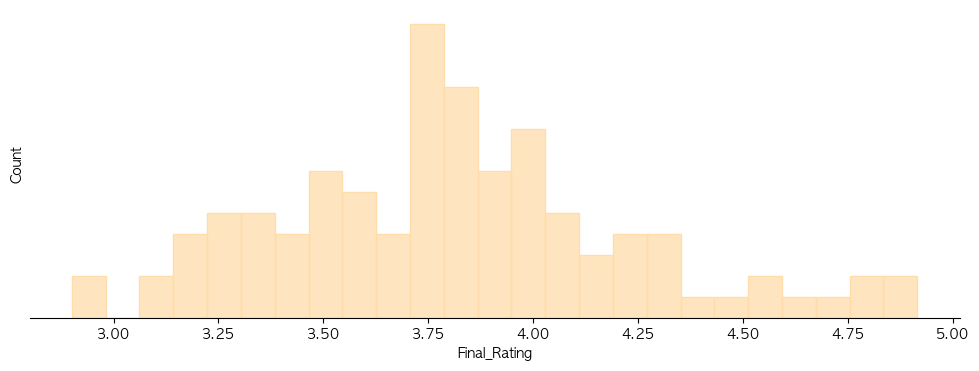


--------- Final_Rating Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ ---------
count   106.00
mean      3.81
std       0.42
min       2.90
25%       3.53
50%       3.79
75%       4.02
max       4.92
Name: Final_Rating, dtype: float64


In [416]:
plt.figure(figsize=(12, 4)) # Í∞ÄÎ°úÎ°ú Í∏∏Í≥† ÏÑ∏Î°úÎäî ÏßßÍ≤å ÎπÑÏú® Ï°∞Ï†ï

pastel_yellow = '#FFDDAA'
sns.histplot(data=df, x='Final_Rating', bins=25, kde=False,
             color=pastel_yellow, edgecolor=pastel_yellow)

# ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ ÌïµÏã¨ ÏàòÏ†ï ÏÇ¨Ìï≠ ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ
# 2-1. Ï†úÎ™©Í≥º yÏ∂ï Î†àÏù¥Î∏îÏùÑ ÏÇ≠Ï†úÌï©ÎãàÎã§. (Ìï¥Îãπ ÎùºÏù∏ÏùÑ Ï£ºÏÑù Ï≤òÎ¶¨ ÎòêÎäî ÏÇ≠Ï†ú)
# plt.title('ÏµúÏ¢Ö Ïã†Î¢∞ÎèÑ Î≥¥Ï†ï Î≥ÑÏ†ê (Final_Rating) Î∂ÑÌè¨', size=18, pad=15)
# plt.ylabel('ÏãùÎãπ Ïàò', size=12)

# 2-2. yÏ∂ïÏùò ÎààÍ∏à(Ïà´Ïûê)ÏùÑ ÏóÜÏï±ÎãàÎã§.
plt.yticks([])

# 2-3. Í∑∏ÎûòÌîÑÏùò ÌÖåÎëêÎ¶¨(spines)Î•º Ï†úÏñ¥Ìï©ÎãàÎã§.
ax = plt.gca() # gca = get current axes, ÌòÑÏû¨ Ï∂ï Ï†ïÎ≥¥Î•º Í∞ÄÏ†∏Ïò¥
ax.spines['top'].set_visible(False)    # ÏúÑÏ™Ω ÌÖåÎëêÎ¶¨ Ïà®Í∏∞Í∏∞
ax.spines['right'].set_visible(False)   # Ïò§Î•∏Ï™Ω ÌÖåÎëêÎ¶¨ Ïà®Í∏∞Í∏∞
ax.spines['left'].set_visible(False)    # ÏôºÏ™Ω ÌÖåÎëêÎ¶¨ Ïà®Í∏∞Í∏∞
# ax.spines['bottom']ÏùÄ xÏ∂ïÏù¥ÎØÄÎ°ú ÎÇ®Í≤®Îë°ÎãàÎã§.
# ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ


# plt.xlim(0, 5)

# 4. Ï†ÄÏû•ÌïòÍ≥† ÌôîÎ©¥Ïóê Î≥¥Ïó¨Ï§çÎãàÎã§. (ÏàúÏÑú Ï§ëÏöî!)
plt.savefig('final_rating_minimal.png',
            transparent=True,
            dpi=300,
            bbox_inches='tight', # Î∂àÌïÑÏöîÌïú Ïó¨Î∞± Ï†úÍ±∞
            pad_inches=0.1)    # ÏïΩÍ∞ÑÏùò Ïó¨Î∞±ÏùÄ ÎÇ®Í≤®Îë†

print("'final_rating_minimal.png' ÌååÏùºÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
plt.show()


# 5. Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ Ï∂úÎ†•
print("\n--------- Final_Rating Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ ---------")
pd.options.display.float_format = '{:.2f}'.format
print(df['Final_Rating'].describe())


--------- üëë ÏµúÏ¢Ö Îû≠ÌÇπ TOP 3 ÏãùÎãπ Í∞ïÏ†ê/ÏïΩÏ†ê Î∂ÑÏÑù üëë ---------

--- <ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê>Ïùò Ïä§ÏºÄÏùºÎßÅÎêú ÏÜçÏÑ± Ï†êÏàò ---
   Îßõ_Ï†êÏàò_scaled  Í∞ÄÍ≤©_Ï†êÏàò_scaled  ÏÑúÎπÑÏä§_Ï†êÏàò_scaled  Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled
0         5.00          4.31           4.96           5.00


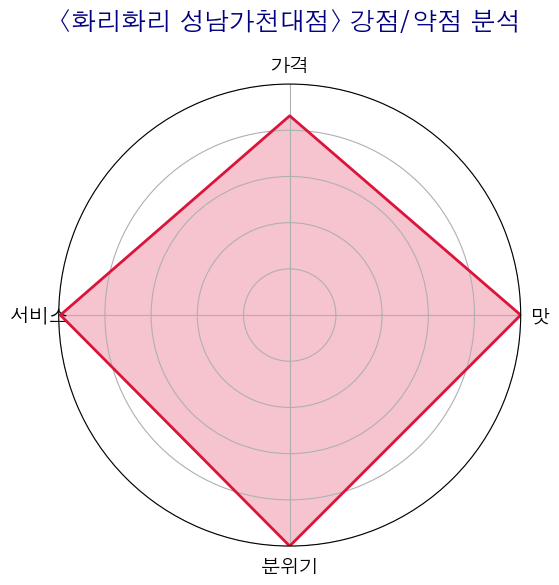


--- <Î¶¨Ïö∞Ï∞®Ïù¥ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê>Ïùò Ïä§ÏºÄÏùºÎßÅÎêú ÏÜçÏÑ± Ï†êÏàò ---
   Îßõ_Ï†êÏàò_scaled  Í∞ÄÍ≤©_Ï†êÏàò_scaled  ÏÑúÎπÑÏä§_Ï†êÏàò_scaled  Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled
1         4.86          4.50           5.00           4.96


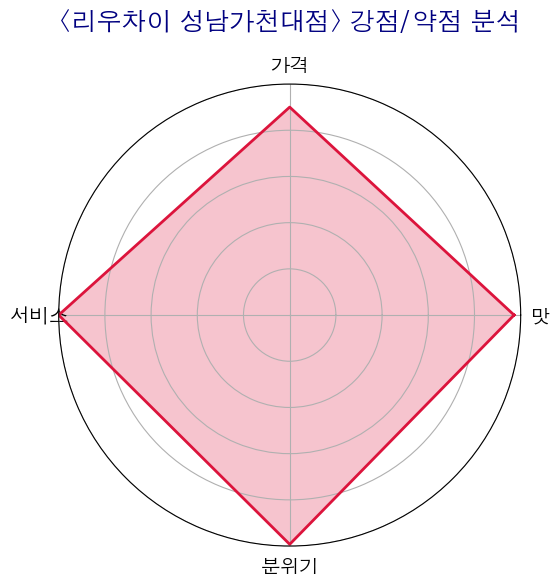


--- <Ïú°Ïó∞Ï∞®>Ïùò Ïä§ÏºÄÏùºÎßÅÎêú ÏÜçÏÑ± Ï†êÏàò ---
   Îßõ_Ï†êÏàò_scaled  Í∞ÄÍ≤©_Ï†êÏàò_scaled  ÏÑúÎπÑÏä§_Ï†êÏàò_scaled  Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled
2         4.97          4.76           4.80           4.51


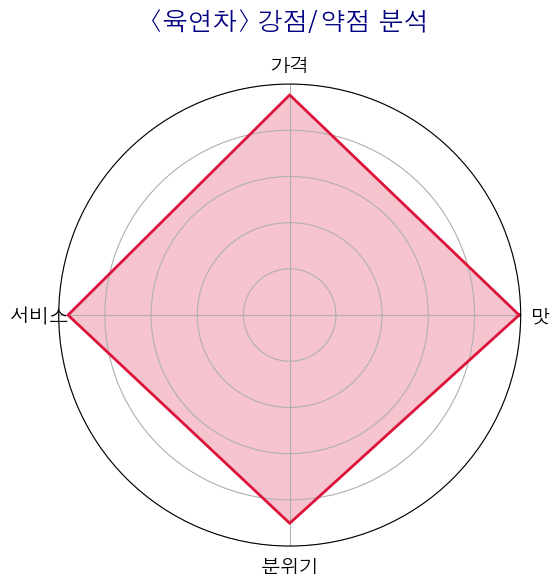

In [418]:
# CODE CELL 3: TOP 3 ÏãùÎãπ Î†àÏù¥Îçî Ï∞®Ìä∏


# 1. Î†àÏù¥Îçî Ï∞®Ìä∏Î•º Í∑∏Î¶¨Îäî Ìï®Ïàò (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
def plot_radar_chart(df, restaurant_name):
    score_cols = ['Îßõ_Ï†êÏàò_scaled', 'Í∞ÄÍ≤©_Ï†êÏàò_scaled', 'ÏÑúÎπÑÏä§_Ï†êÏàò_scaled', 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled']
    labels = [col.replace('_Ï†êÏàò_scaled', '') for col in score_cols]
    num_vars = len(labels)
    
    try:
        values = df[df['Restaurant'] == restaurant_name][score_cols].iloc[0].values.flatten().tolist()
    except IndexError:
        print(f"Ïò§Î•ò: '{restaurant_name}' ÏãùÎãπÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
        return

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color='crimson', linewidth=2)
    ax.fill(angles, values, color='crimson', alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, size=14)
    ax.set_ylim(0, 5) # 10Ï†ê ÎßåÏ†êÏúºÎ°ú Ï∂ï Î≤îÏúÑ Í≥†Ï†ï
    plt.title(f"<{restaurant_name}> Í∞ïÏ†ê/ÏïΩÏ†ê Î∂ÑÏÑù", size=18, color='navy', y=1.1)
    plt.show()

# 2. ÏµúÏ¢Ö Îû≠ÌÇπÏóêÏÑú TOP 3 ÏãùÎãπÏùò Ïù¥Î¶ÑÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.
top_3_restaurants = df_ranking['Restaurant'].head(3).tolist()


# 3. Í∞Å ÏãùÎãπÏóê ÎåÄÌï¥ Î†àÏù¥Îçî Ï∞®Ìä∏Î•º Í∑∏Î¶ΩÎãàÎã§.
print("\n--------- üëë ÏµúÏ¢Ö Îû≠ÌÇπ TOP 3 ÏãùÎãπ Í∞ïÏ†ê/ÏïΩÏ†ê Î∂ÑÏÑù üëë ---------")

# 3. Í∞Å ÏãùÎãπÏóê ÎåÄÌï¥, 'Îç∞Ïù¥ÌÑ∞Î•º Î®ºÏ†Ä Ï∂úÎ†•'ÌïòÍ≥† ÎÇòÏÑú Î†àÏù¥Îçî Ï∞®Ìä∏Î•º Í∑∏Î¶ΩÎãàÎã§.
for restaurant_name in top_3_restaurants:
    
    # --- ‚ú®‚ú®‚ú® Ïó¨Í∏∞Í∞Ä Ï∂îÍ∞ÄÎêú Î∂ÄÎ∂Ñ! (Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏) ‚ú®‚ú®‚ú® ---
    print(f"\n--- <{restaurant_name}>Ïùò Ïä§ÏºÄÏùºÎßÅÎêú ÏÜçÏÑ± Ï†êÏàò ---")
    
    # ÏãúÍ∞ÅÌôîÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅÌï¥ÏÑú Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†•Ìï©ÎãàÎã§.
    restaurant_data = df_ranking[df_ranking['Restaurant'] == restaurant_name][
        ['Îßõ_Ï†êÏàò_scaled', 'Í∞ÄÍ≤©_Ï†êÏàò_scaled', 'ÏÑúÎπÑÏä§_Ï†êÏàò_scaled', 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled']
    ]
    print(restaurant_data)
    # # -----------------------------------------------------

    # # Ïù¥Ï†ú Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Î∞îÌÉïÏúºÎ°ú Î†àÏù¥Îçî Ï∞®Ìä∏Î•º Í∑∏Î¶ΩÎãàÎã§.
    plot_radar_chart(df_ranking, restaurant_name)


--- üëë TOP 1 (ÌôîÎ¶¨ÌôîÎ¶¨ ÏÑ±ÎÇ®Í∞ÄÏ≤úÎåÄÏ†ê) vs BOTTOM 1 (Í∞ÄÏ≤úÎåÄÌïôÍµê ÍµêÏú°ÎåÄÌïôÏõêÏßÄÏ†ê) ÎπÑÍµê Î∂ÑÏÑù üëë ---


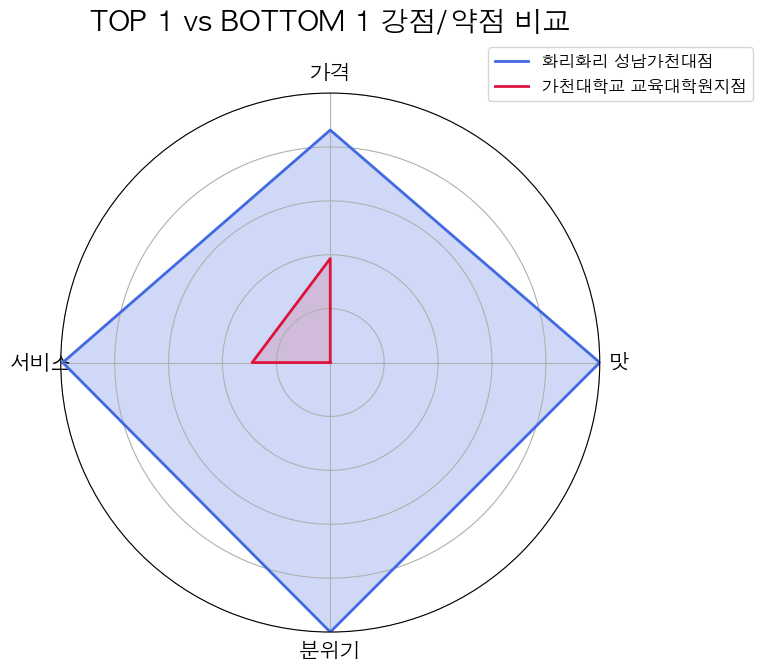

In [420]:



# ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ ÌïµÏã¨ ÏàòÏ†ï ÏÇ¨Ìï≠ 1: ÎπÑÍµê Ï∞®Ìä∏Î•º Í∑∏Î¶¨Îäî ÏÉàÎ°úÏö¥ Ìï®Ïàò ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ
def plot_comparative_radar_chart(df, top_restaurant, bottom_restaurant):
    score_cols = ['Îßõ_Ï†êÏàò_scaled', 'Í∞ÄÍ≤©_Ï†êÏàò_scaled', 'ÏÑúÎπÑÏä§_Ï†êÏàò_scaled', 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled']
    labels = [col.replace('_Ï†êÏàò_scaled', '') for col in score_cols]
    num_vars = len(labels)

    # Í∞ÅÎèÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§ (Ïù¥ Î∂ÄÎ∂ÑÏùÄ ÎèôÏùº).
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1] # Ï∞®Ìä∏Î•º Îã´Í∏∞ ÏúÑÌï¥ Ï≤´ Î≤àÏß∏ Í∞ÅÎèÑÎ•º ÎßàÏßÄÎßâÏóê Ï∂îÍ∞Ä

    # FigureÏôÄ Ï∂ïÏùÑ Ï§ÄÎπÑÌï©ÎãàÎã§.
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    # --- TOP 1 ÏãùÎãπ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Í∑∏Î¶¨Í∏∞ ---
    try:
        top_values = df[df['Restaurant'] == top_restaurant][score_cols].iloc[0].tolist()
        top_values += top_values[:1] # Ï∞®Ìä∏Î•º Îã´Í∏∞ ÏúÑÌï¥ Ï≤´ Î≤àÏß∏ Í∞íÏùÑ ÎßàÏßÄÎßâÏóê Ï∂îÍ∞Ä
        # ÌååÎûÄÏÉâ Í≥ÑÏó¥Î°ú TOP 1ÏùÑ Í∑∏Î¶ΩÎãàÎã§.
        ax.plot(angles, top_values, color='royalblue', linewidth=2, linestyle='solid', label=top_restaurant)
        ax.fill(angles, top_values, 'royalblue', alpha=0.25)
    except IndexError:
        print(f"Ïò§Î•ò: TOP 1 ÏãùÎãπ '{top_restaurant}'ÏùÑ(Î•º) Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
        return

    # --- BOTTOM 1 ÏãùÎãπ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Í∑∏Î¶¨Í∏∞ ---
    try:
        bottom_values = df[df['Restaurant'] == bottom_restaurant][score_cols].iloc[0].tolist()
        bottom_values += bottom_values[:1]
        # Î∂âÏùÄÏÉâ Í≥ÑÏó¥Î°ú BOTTOM 1ÏùÑ Í∑∏Î¶ΩÎãàÎã§.
        ax.plot(angles, bottom_values, color='crimson', linewidth=2, linestyle='solid', label=bottom_restaurant)
        ax.fill(angles, bottom_values, 'crimson', alpha=0.15)
    except IndexError:
        print(f"Ïò§Î•ò: BOTTOM 1 ÏãùÎãπ '{bottom_restaurant}'ÏùÑ(Î•º) Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
        return

    # --- Ï∞®Ìä∏ ÏµúÏ¢Ö Íæ∏ÎØ∏Í∏∞ ---
    ax.set_yticklabels([]) # yÏ∂ï Ïà´Ïûê ÎùºÎ≤®ÏùÄ Ïà®ÍπÅÎãàÎã§.
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, size=15)
    ax.set_ylim(0, 5) # 5Ï†ê ÎßåÏ†êÏúºÎ°ú Ï∂ï Î≤îÏúÑ Í≥†Ï†ï

    plt.title('TOP 1 vs BOTTOM 1 Í∞ïÏ†ê/ÏïΩÏ†ê ÎπÑÍµê', size=20, color='black', y=1.1)
    
    # Î≤îÎ°Ä(Legend)Î•º Ï∂îÍ∞ÄÌïòÏó¨ Ïñ¥Îñ§ ÏÉâÏù¥ Ïñ¥Îñ§ ÏãùÎãπÏù∏ÏßÄ ÌëúÏãúÌï©ÎãàÎã§.
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
    
    plt.show()

# ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ‚òÖ

# 2. ÏµúÏ¢Ö Îû≠ÌÇπÏóêÏÑú TOP 1Í≥º BOTTOM 1 ÏãùÎãπÏùò Ïù¥Î¶ÑÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.
# .iloc[0]Îäî Ï≤´ Î≤àÏß∏ Ìñâ, .iloc[-1]ÏùÄ ÎßàÏßÄÎßâ ÌñâÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
top_1_restaurant = df_ranking['Restaurant'].iloc[0]
bottom_1_restaurant = df_ranking['Restaurant'].iloc[-1]

# 3. ÏÉàÎ°úÏö¥ Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÏó¨ ÎπÑÍµê Î†àÏù¥Îçî Ï∞®Ìä∏Î•º Í∑∏Î¶ΩÎãàÎã§.
print(f"\n--- üëë TOP 1 ({top_1_restaurant}) vs BOTTOM 1 ({bottom_1_restaurant}) ÎπÑÍµê Î∂ÑÏÑù üëë ---")
plot_comparative_radar_chart(df_ranking, top_1_restaurant, bottom_1_restaurant)

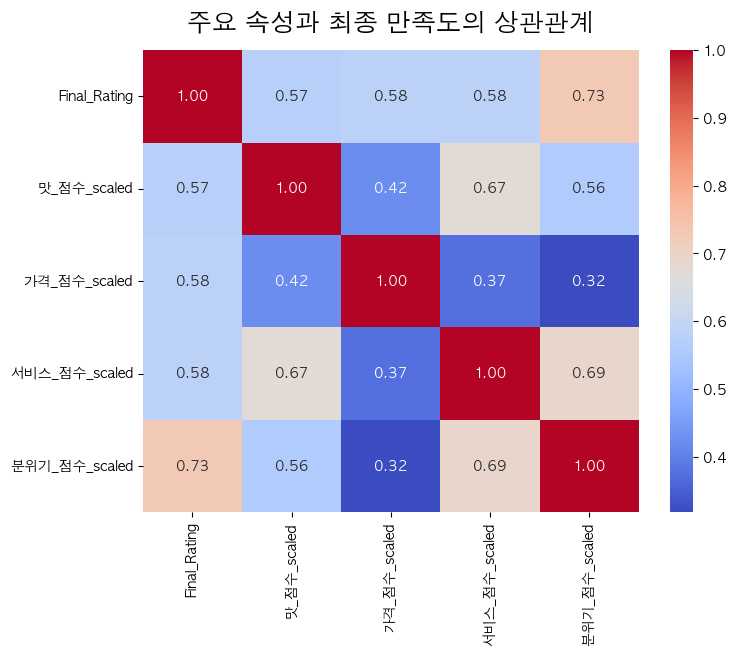

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_ranking_new ÏóêÏÑú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌï† Ïª¨ÎüºÎì§Îßå ÏÑ†ÌÉùÌï©ÎãàÎã§.
corr_df = df[['Final_Rating', 'Îßõ_Ï†êÏàò_scaled', 'Í∞ÄÍ≤©_Ï†êÏàò_scaled', 'ÏÑúÎπÑÏä§_Ï†êÏàò_scaled', 'Î∂ÑÏúÑÍ∏∞_Ï†êÏàò_scaled']]

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_df.corr(), 
    annot=True,     # Í∞Å Ïπ∏Ïóê Ïà´Ïûê ÌëúÏãú
    cmap='coolwarm',# ÏÉâÏÉÅ ÌÖåÎßà
    fmt='.2f'       # ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãú
)
plt.title('Ï£ºÏöî ÏÜçÏÑ±Í≥º ÏµúÏ¢Ö ÎßåÏ°±ÎèÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', size=18, pad=15)
plt.show()

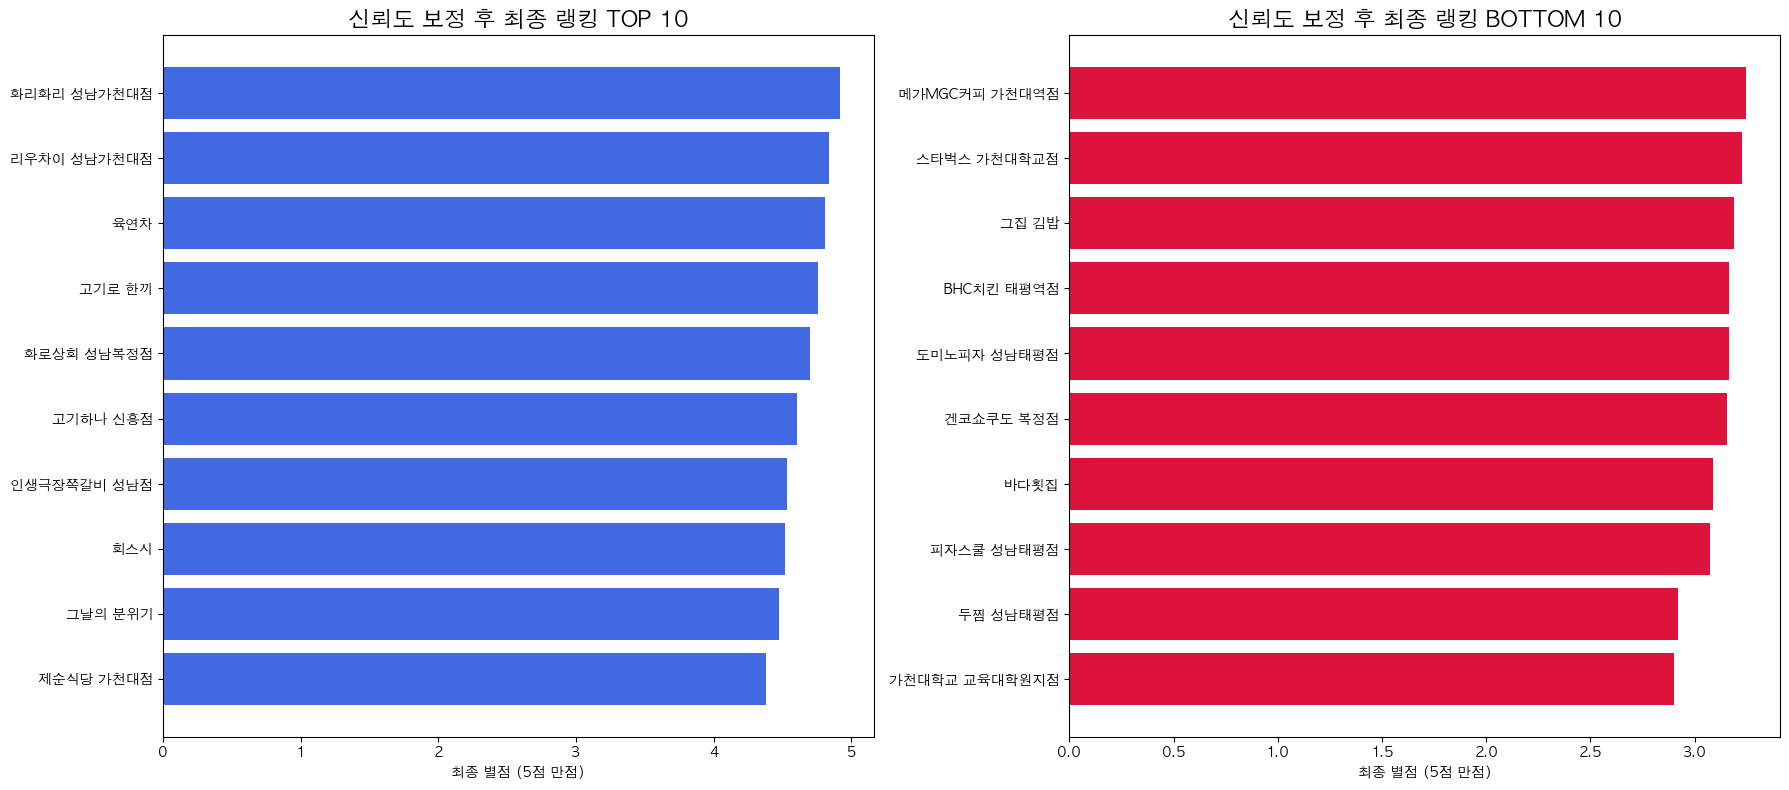

In [426]:
# ÏÉÅÏúÑ 10Í∞úÏôÄ ÌïòÏúÑ 10Í∞ú Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï©ÎãàÎã§.
top_10 = df.head(10).sort_values(by='Final_Rating', ascending=True)
bottom_10 = df.tail(10).sort_values(by='Final_Rating', ascending=True)

fig, ax = plt.subplots(1, 2, figsize=(18, 8)) # 1Ìñâ 2Ïó¥Î°ú Í∑∏ÎûòÌîÑ 2Í∞úÎ•º ÎÇòÎûÄÌûà

# ÏÉÅÏúÑ 10Í∞ú ÎßâÎåÄÍ∑∏ÎûòÌîÑ
ax[0].barh(top_10['Restaurant'], top_10['Final_Rating'], color='royalblue')
ax[0].set_title('Ïã†Î¢∞ÎèÑ Î≥¥Ï†ï ÌõÑ ÏµúÏ¢Ö Îû≠ÌÇπ TOP 10', size=16)
ax[0].set_xlabel('ÏµúÏ¢Ö Î≥ÑÏ†ê (5Ï†ê ÎßåÏ†ê)')

# ÌïòÏúÑ 10Í∞ú ÎßâÎåÄÍ∑∏ÎûòÌîÑ
ax[1].barh(bottom_10['Restaurant'], bottom_10['Final_Rating'], color='crimson')
ax[1].set_title('Ïã†Î¢∞ÎèÑ Î≥¥Ï†ï ÌõÑ ÏµúÏ¢Ö Îû≠ÌÇπ BOTTOM 10', size=16)
ax[1].set_xlabel('ÏµúÏ¢Ö Î≥ÑÏ†ê (5Ï†ê ÎßåÏ†ê)')

plt.tight_layout() # Í∑∏ÎûòÌîÑ Í∞ÑÍ≤© ÏûêÎèô Ï°∞Ï†à
plt.show()